In [1]:
import models
import cms_datasets as cms
import plotting

Using TensorFlow backend.


In [2]:
reload(cms)

data,mc = cms.load_zee("moriond_v9","abs(ScEta) < 1.5")


In [3]:
data.columns

Index(['index', 'run', 'rho', 'nvtx', 'mass', 'weight', 'SigMoM', 'Pt',
       'ScEta', 'Phi', 'R9', 'S4', 'SigmaIeIe', 'EtaWidth', 'PhiWidth',
       'CovarianceIphiIphi', 'SigmaRR', 'ScEnergy', 'CovarianceIetaIphi',
       'PhoIso03', 'ChIso03', 'ChIso03worst', 'ScPreshowerEnergy', 'PhoIDMVA',
       'SigEOverE', 'run_quantile'],
      dtype='object')

In [4]:
mc.columns

Index(['index', 'run', 'rho', 'nvtx', 'mass', 'weight', 'SigMoM', 'Pt',
       'ScEta', 'Phi', 'R9', 'S4', 'SigmaIeIe', 'EtaWidth', 'PhiWidth',
       'CovarianceIphiIphi', 'SigmaRR', 'ScEnergy', 'CovarianceIetaIphi',
       'PhoIso03', 'ChIso03', 'ChIso03worst', 'ScPreshowerEnergy', 'PhoIDMVA',
       'SigEOverE'],
      dtype='object')

In [5]:
c_names = ['Pt','ScEta','Phi','rho']
x_names = ['R9','SigmaIeIe','S4','EtaWidth','PhiWidth','CovarianceIetaIphi',
           'CovarianceIphiIphi', ]

data_c = data[c_names]
data_x = data[x_names]

mc_c = mc[c_names]
mc_x = mc[x_names]


In [6]:
data_x.columns, data_x.shape, data_c.columns, data_c.shape

(Index(['R9', 'SigmaIeIe', 'S4', 'EtaWidth', 'PhiWidth', 'CovarianceIetaIphi',
        'CovarianceIphiIphi'],
       dtype='object'),
 (17520217, 7),
 Index(['Pt', 'ScEta', 'Phi', 'rho'], dtype='object'),
 (17520217, 4))

In [7]:
data_x.columns, data_c.columns

(Index(['R9', 'SigmaIeIe', 'S4', 'EtaWidth', 'PhiWidth', 'CovarianceIetaIphi',
        'CovarianceIphiIphi'],
       dtype='object'), Index(['Pt', 'ScEta', 'Phi', 'rho'], dtype='object'))

In [8]:
mc_x.columns, mc_c.columns

(Index(['R9', 'SigmaIeIe', 'S4', 'EtaWidth', 'PhiWidth', 'CovarianceIetaIphi',
        'CovarianceIphiIphi'],
       dtype='object'), Index(['Pt', 'ScEta', 'Phi', 'rho'], dtype='object'))

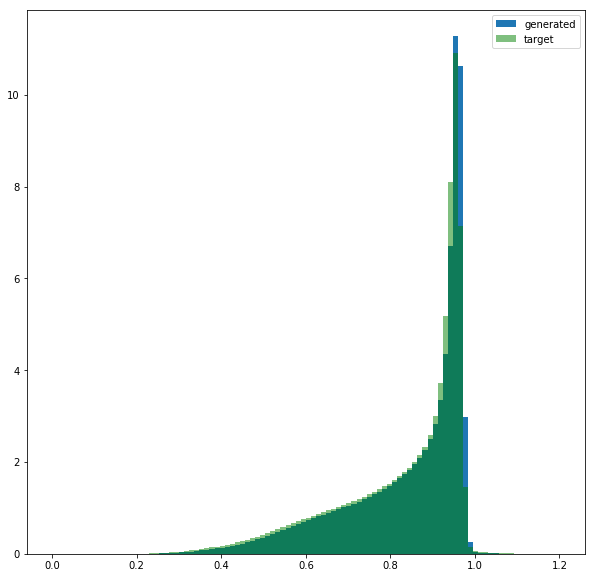

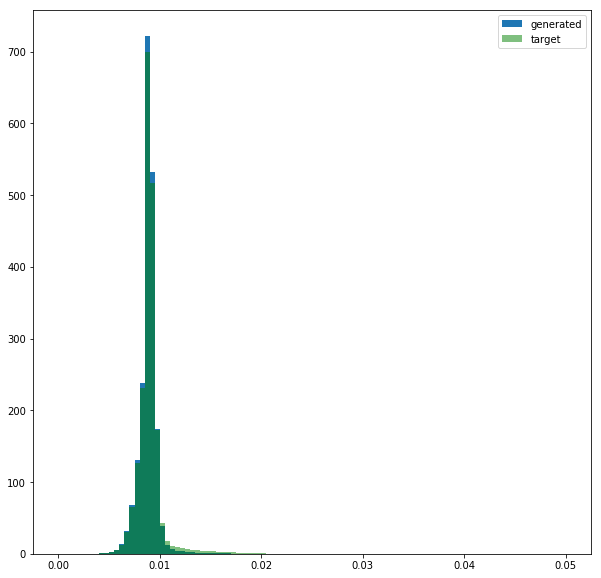

In [9]:
plotting.plot_hists(data_x.values[:,0],mc_x.values[:,0],bins=100,range=[0,1.2])
plt.show()
plotting.plot_hists(data_x.values[:,1],mc_x.values[:,1],bins=100,range=[0,5e-2])

In [10]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler, QuantileTransformer
scaler_x = QuantileTransformer(output_distribution='normal')
# scaler_mc = QuantileTransformer(output_distribution='normal')

scaler_c = QuantileTransformer(output_distribution='normal')

mc_x = scaler_x.fit_transform(mc_x).reshape(-1,1,len(x_names))
data_x = scaler_x.transform(data_x).reshape(-1,1,len(x_names))

mc_c = scaler_c.fit_transform(mc_c).reshape(-1,1,len(c_names))
data_c = scaler_c.transform(data_c).reshape(-1,1,len(c_names))


In [11]:
data_x.shape,mc_x.shape

((17520217, 1, 7), (9616192, 1, 7))

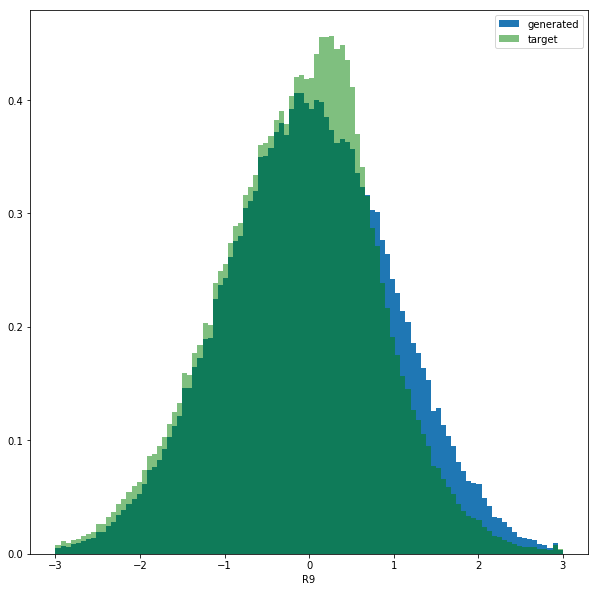

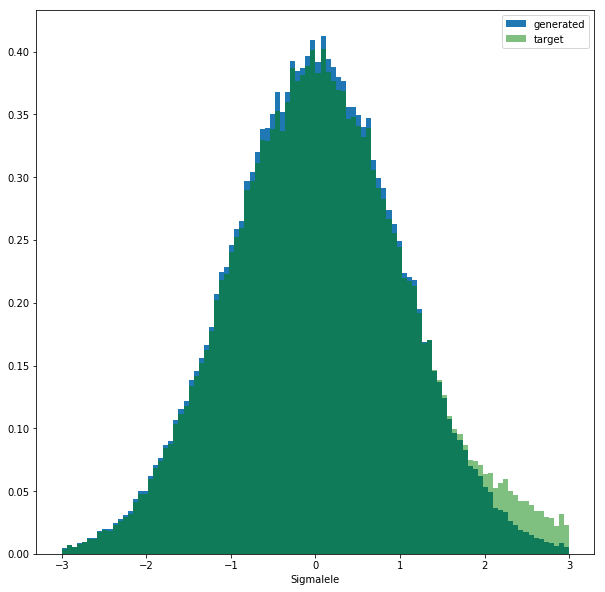

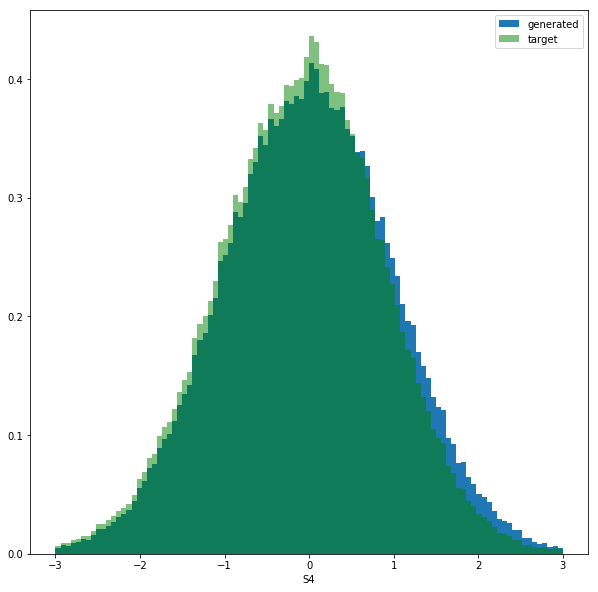

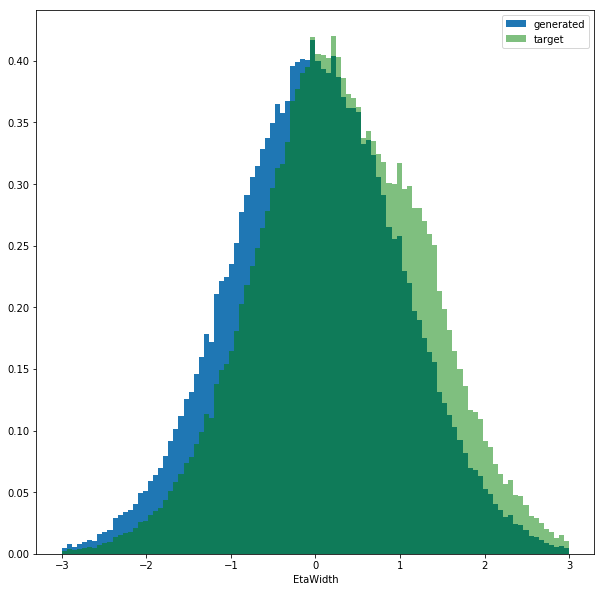

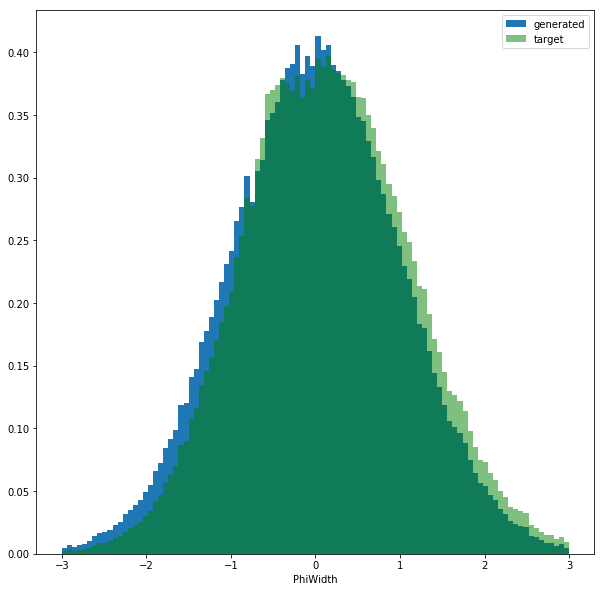

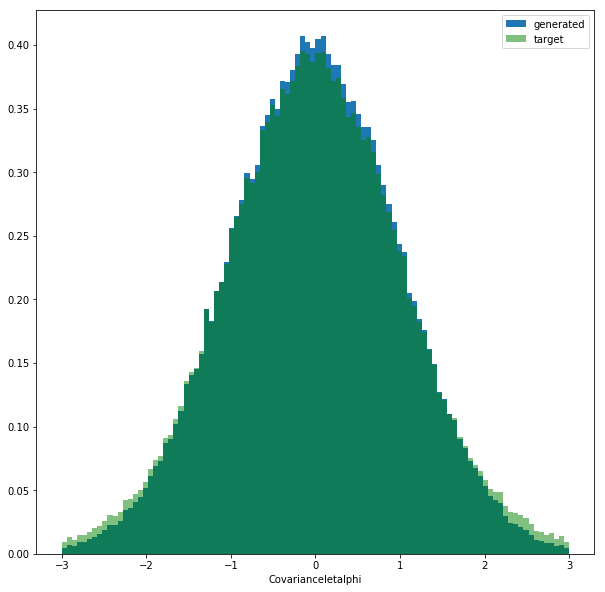

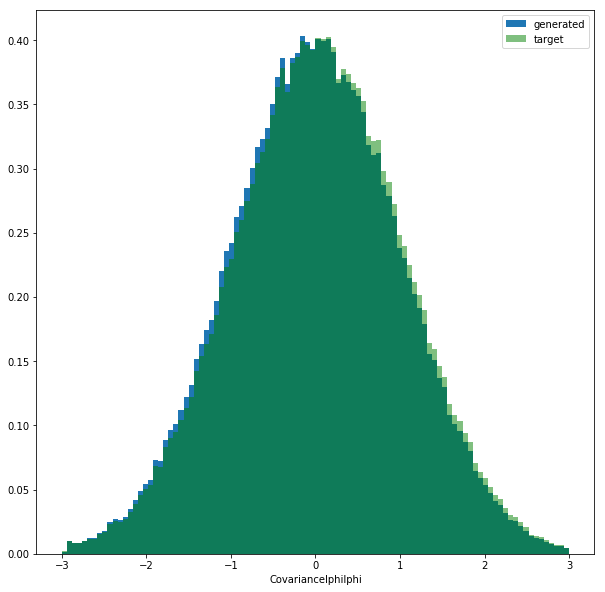

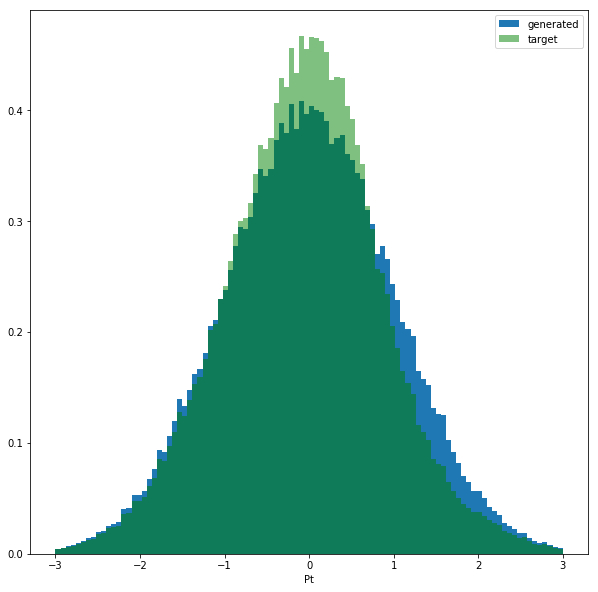

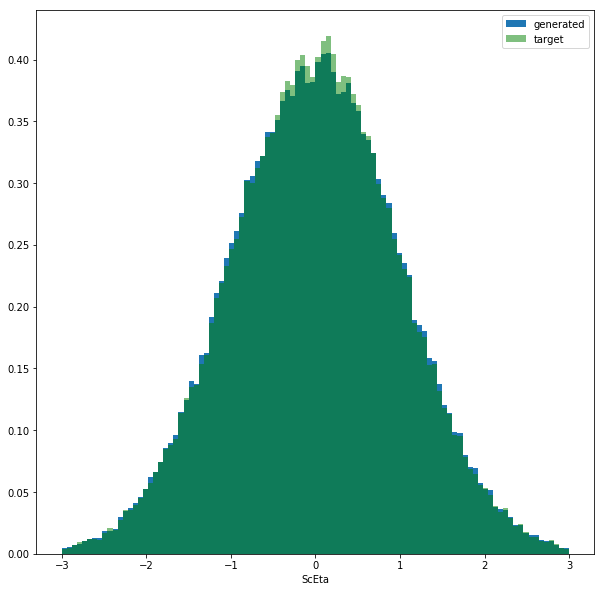

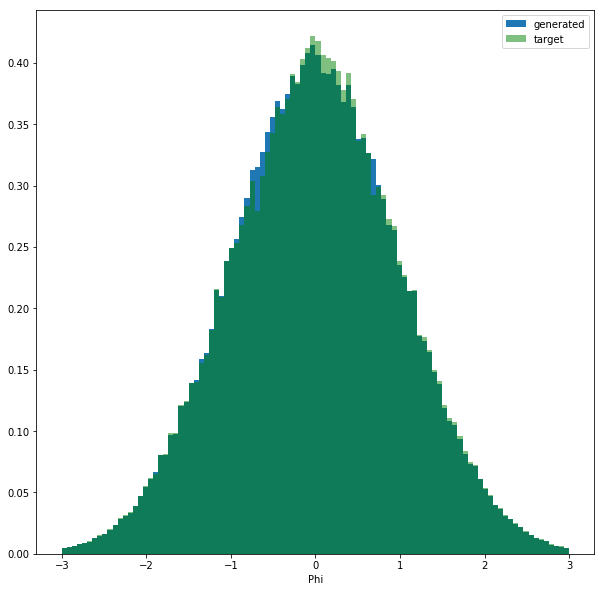

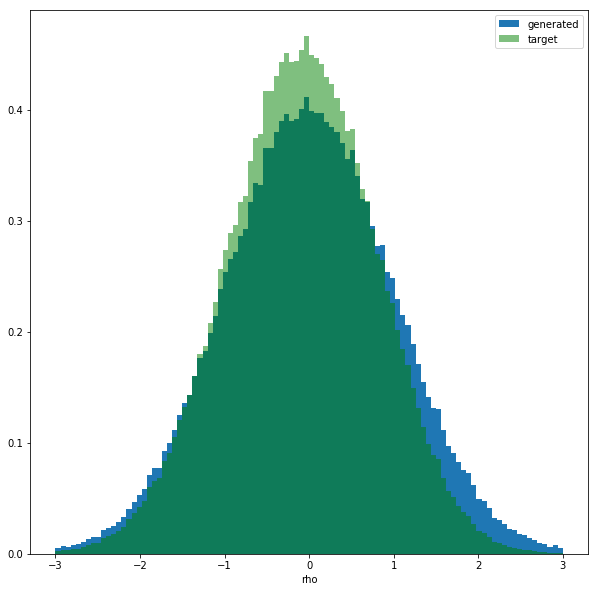

In [12]:
for ix in range(len(x_names)):
    plotting.plot_hists(data_x[:,0,ix],mc_x[:,0,ix],bins=100,range=[-3,3])
    plt.xlabel(x_names[ix])
    plt.show()

for ic in range(len(c_names)):
    plotting.plot_hists(data_c[:,0,ic],mc_c[:,0,ic],bins=100,range=[-3,3])
    plt.xlabel(c_names[ic])
    plt.show()

# plotting.plot_hists(data_x[:,0,0],mc_x[:,0,0],bins=100,range=[-3,3])
# plt.xlabel(x_names[0])
# plt.show()

# plotting.plot_hists(data_x[:,0,1],mc_x[:,0,1],bins=100,range=[-3,3])
# plt.xlabel(x_names[1])
# plt.show()

# plotting.plot_hists(data_c[:,0,0],mc_c[:,0,0],bins=100,range=[-3,3])
# plt.xlabel(c_names[0])
# plt.show()

# # plotting.plot_hists(data_c[:,0,1],mc_c[:,0,1],bins=100,range=[-3,3])
# # plt.xlabel(c_names[1])
# # plt.show()


In [13]:
reload(models)

xz_shape = (1,len(x_names))
c_shape = (1,len(c_names))
gan = models.MyFFGAN( xz_shape, xz_shape, c_shape=c_shape,
                     g_opts=dict(name="G_64x5",kernel_sizes=[64]*5,
                         # name="G_32x3_64x3_128x3",kernel_sizes=[128]*3+[64]*3+[32]*3,#kernel_sizes=[128]*11,
#                                 do_nl_activ=[False,"tanh"]*3+[False],
#                                 do_poly=True,
#                                 do_nl_activ="relu",do_skip=False, do_bn=True
                                ),
                     d_opts=dict(name="D_256x5",kernel_sizes=[256]*5),
#                     dm_opts=dict(optimizer=models.Adam,opt_kwargs=dict(lr=1e-5)),
#                     am_opts=dict(optimizer=models.Adam,opt_kwargs=dict(lr=1e-5)),
                      dm_opts=dict(optimizer=models.RMSprop,opt_kwargs=dict(lr=0.0002, decay=6e-6)),
                      am_opts=dict(optimizer=models.RMSprop,opt_kwargs=dict(lr=0.0002, decay=6e-6)),

                    )

In [14]:
gan.get_generator()

(1, 7)


In [15]:
gan.get_discriminator()

In [16]:
gan.compile()

(<keras.engine.training.Model at 0x2b2479193128>,
 <keras.engine.training.Model at 0x2b2478deada0>)

In [17]:
gan.get_generator().summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
G_64x5_c_input (InputLayer)      (None, 1, 4)          0                                            
____________________________________________________________________________________________________
G_64x5_input (InputLayer)        (None, 1, 7)          0                                            
____________________________________________________________________________________________________
G_64x5_all_inputs (Concatenate)  (None, 1, 11)         0           G_64x5_c_input[0][0]             
                                                                   G_64x5_input[0][0]               
____________________________________________________________________________________________________
G_64x5_up1_dense (Dense)         (None, 1, 64)         768         G_64x5_all_inputs[0][0] 

In [18]:
gan.get_discriminator().summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
D_256x5_c_input (InputLayer)     (None, 1, 4)          0                                            
____________________________________________________________________________________________________
D_256x5_input (InputLayer)       (None, 1, 7)          0                                            
____________________________________________________________________________________________________
D_256x5_all_inputs (Concatenate) (None, 1, 11)         0           D_256x5_c_input[0][0]            
                                                                   D_256x5_input[0][0]              
____________________________________________________________________________________________________
D_256x5_down1_dense (Dense)      (None, 1, 256)        3072        D_256x5_all_inputs[0][0]

In [19]:
gan.am.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
G_64x5_c_input (InputLayer)      (None, 1, 4)          0                                            
____________________________________________________________________________________________________
G_64x5_input (InputLayer)        (None, 1, 7)          0                                            
____________________________________________________________________________________________________
G_64x5_all_inputs (Concatenate)  (None, 1, 11)         0           G_64x5_c_input[0][0]             
                                                                   G_64x5_input[0][0]               
____________________________________________________________________________________________________
G_64x5_up1_dense (Dense)         (None, 1, 64)         768         G_64x5_all_inputs[0][0] 

In [20]:
gan.dm.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
D_256x5_c_input (InputLayer)     (None, 1, 4)          0                                            
____________________________________________________________________________________________________
D_256x5_input (InputLayer)       (None, 1, 7)          0                                            
____________________________________________________________________________________________________
D_256x5_all_inputs (Concatenate) (None, 1, 11)         0           D_256x5_c_input[0][0]            
                                                                   D_256x5_input[0][0]              
____________________________________________________________________________________________________
D_256x5_down1_dense (Dense)      (None, 1, 256)        3072        D_256x5_all_inputs[0][0]

In [21]:
# import toy_datasets as toys

In [22]:
# reload(toys)

# x_train,x_test,z_train,z_test = toys.two_peaks(100000) 

In [23]:
# plotting.plot_hists(x_train.ravel(),z_train.ravel())

In [24]:
# reload(toys)

# x,z = toys.three_peaks(100000)

# plotting.plot_hists(x.ravel(),z.ravel())

In [25]:
nmax = min(data_x.shape[0]//10,mc_x.shape[0])

data_x_train,data_x_test,data_c_train,data_c_test = cms.train_test_split(data_x[:nmax],data_c[:nmax])
mc_x_train,mc_x_test,mc_c_train,mc_c_test = cms.train_test_split(mc_x[:nmax],mc_c[:nmax])

In [26]:
print(nmax)

1752021


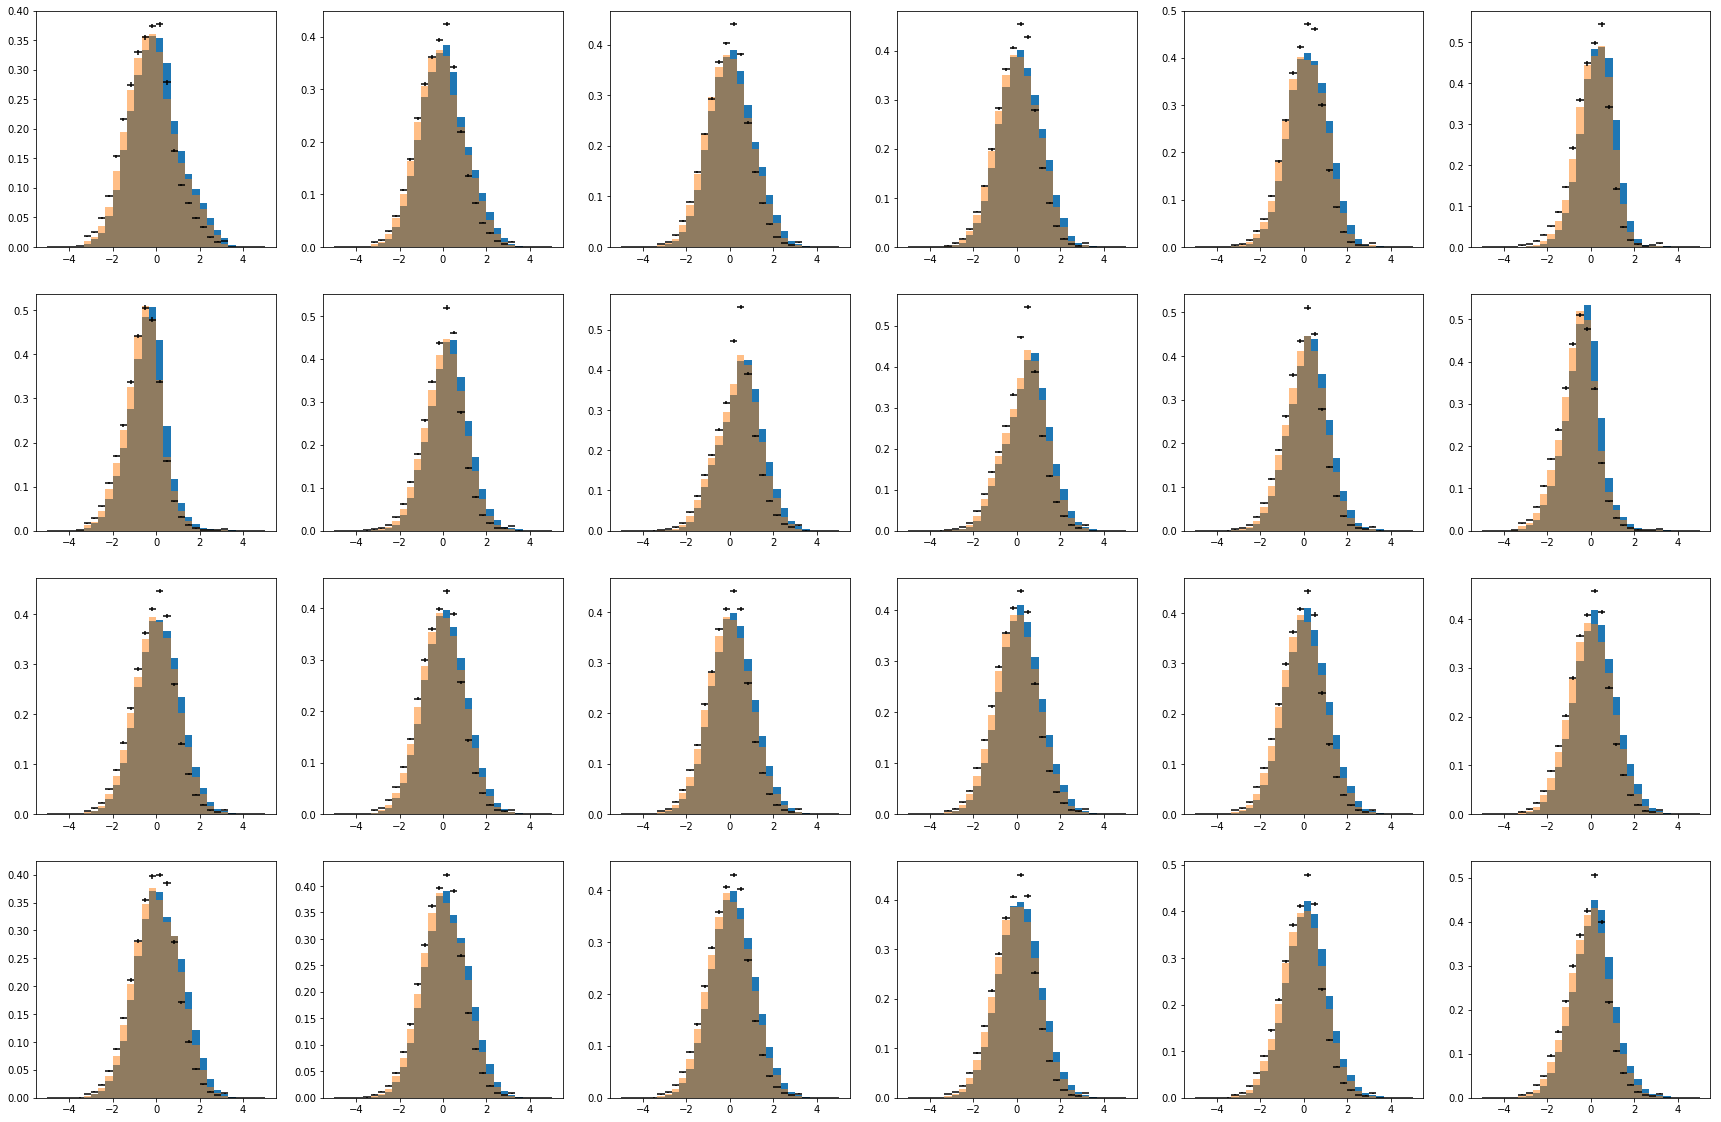

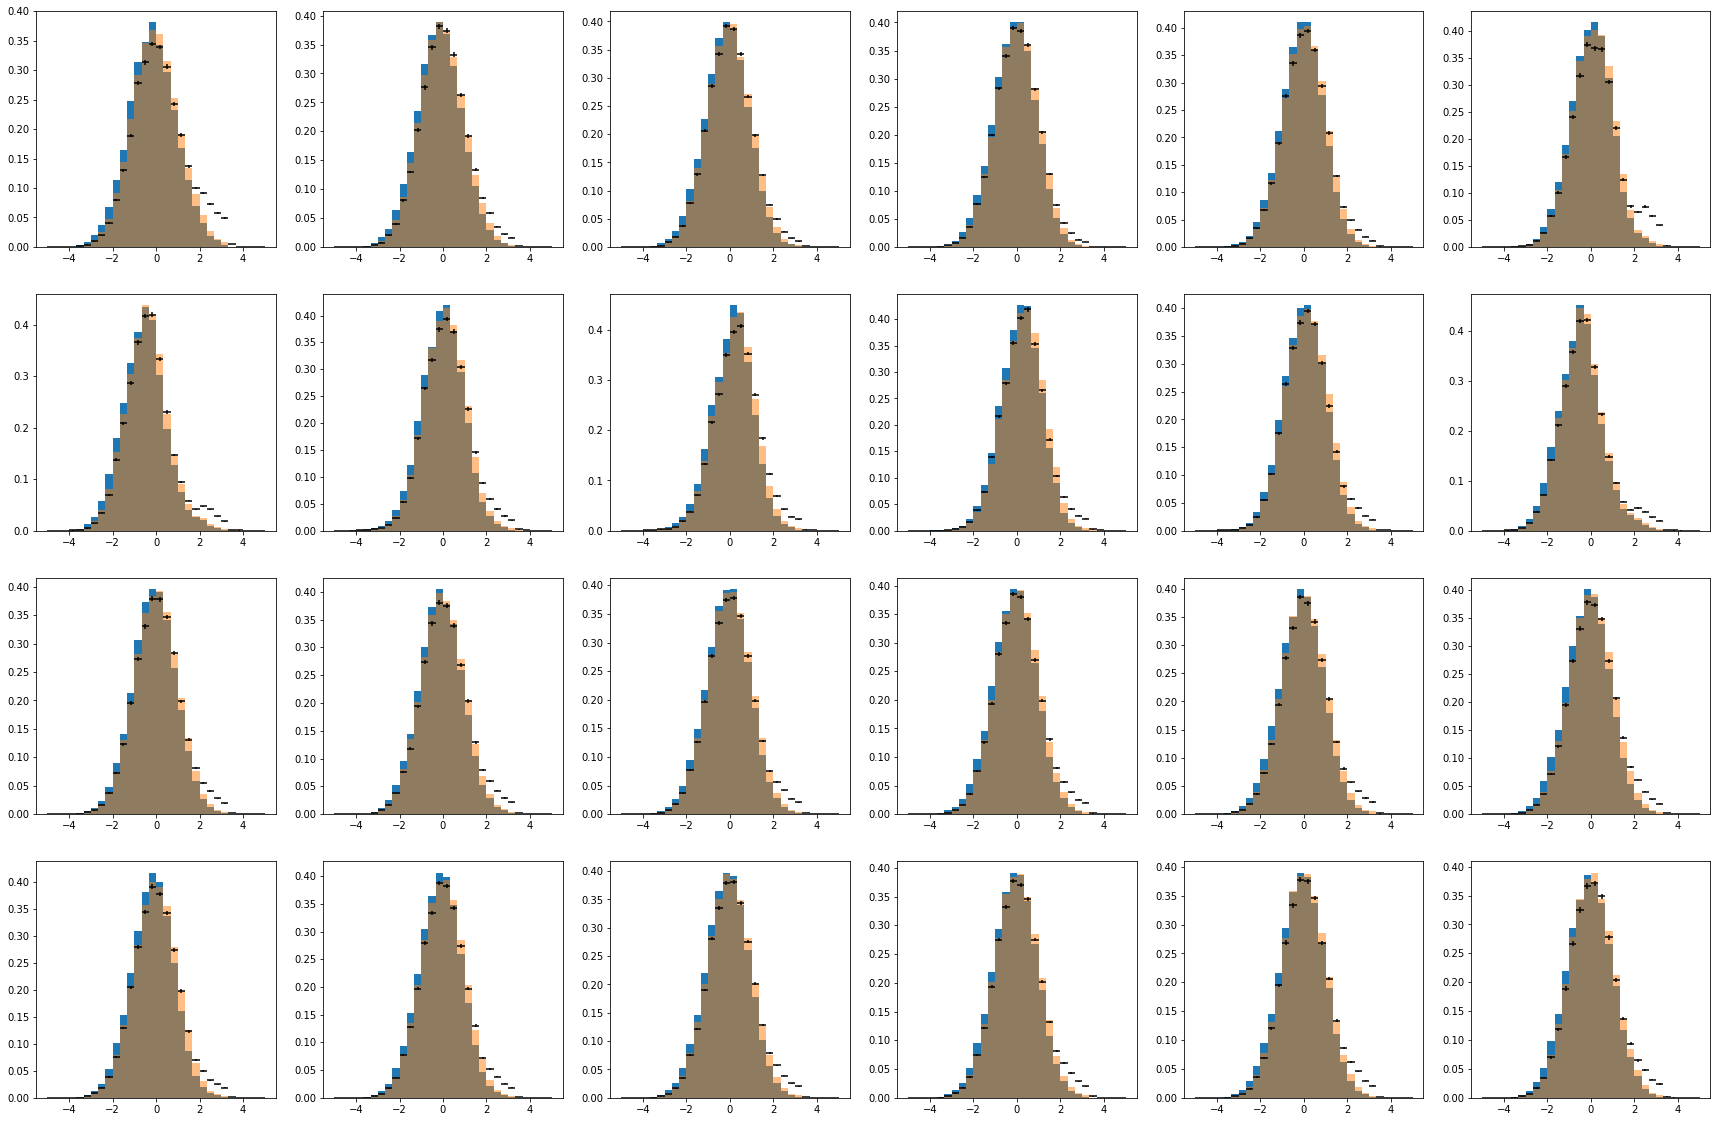

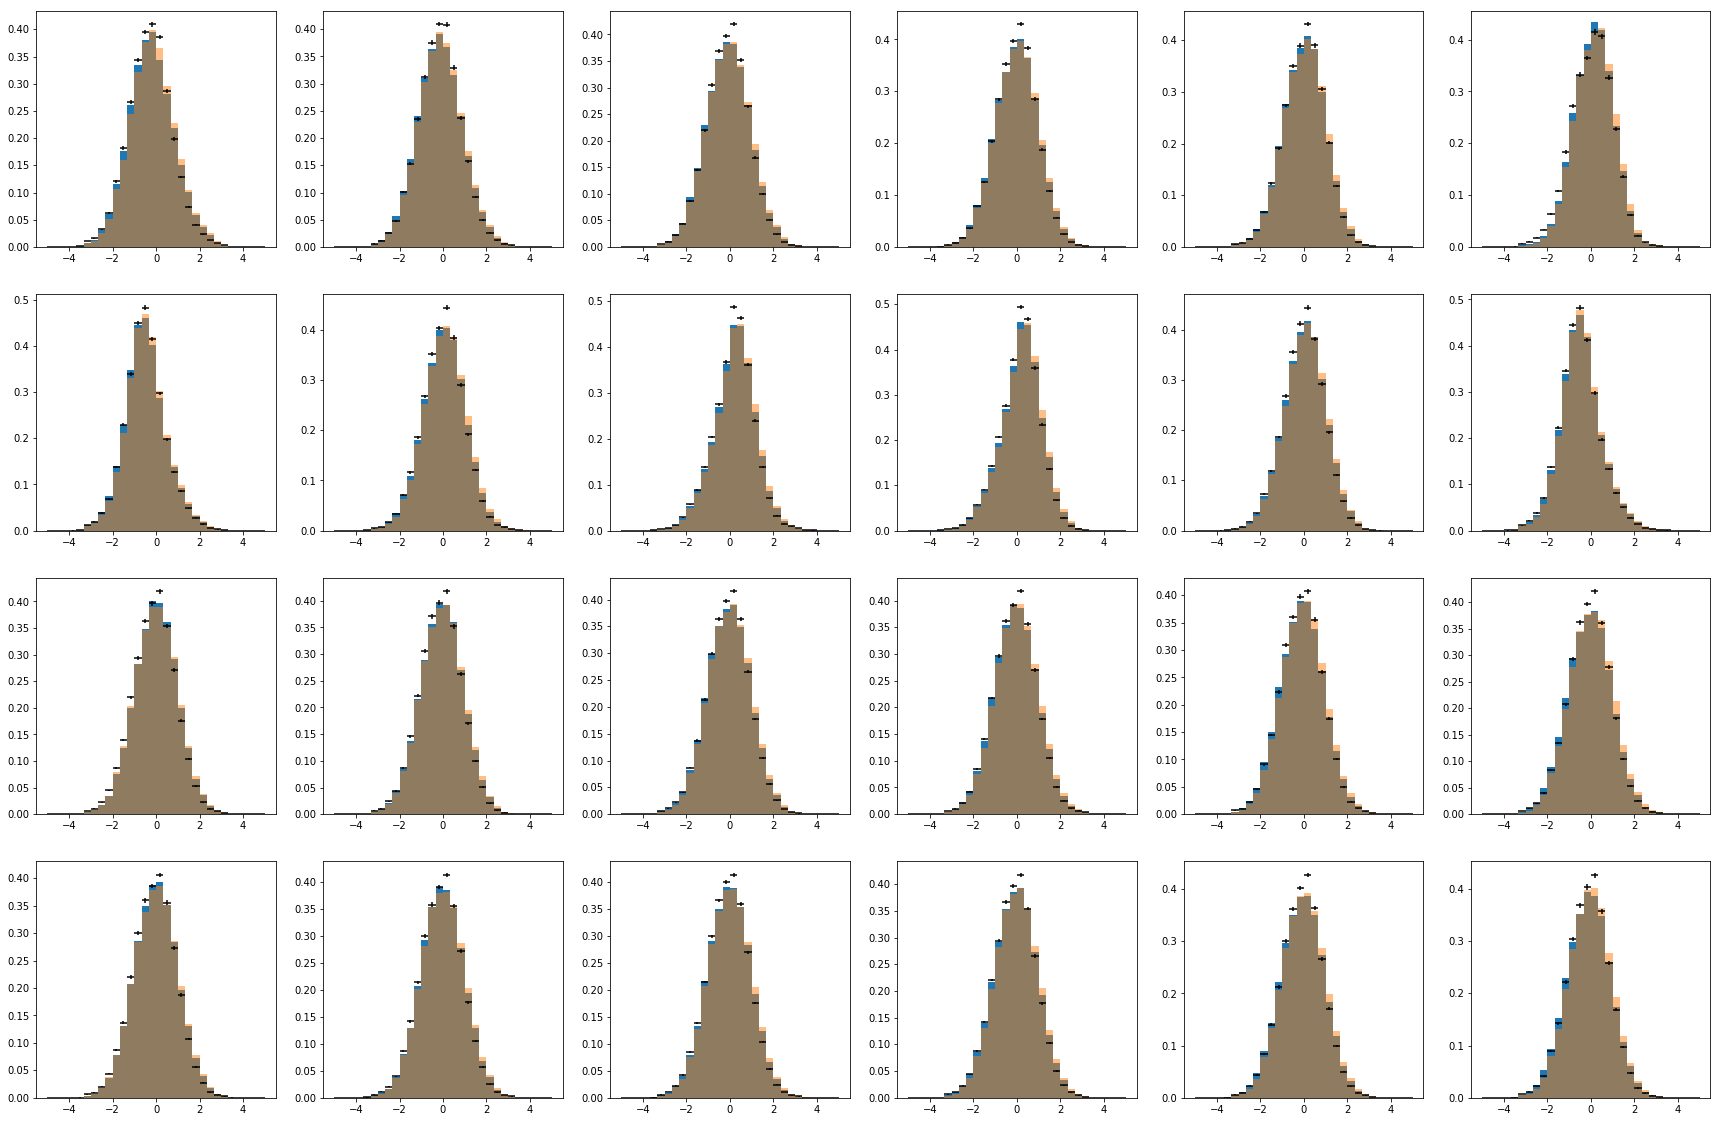

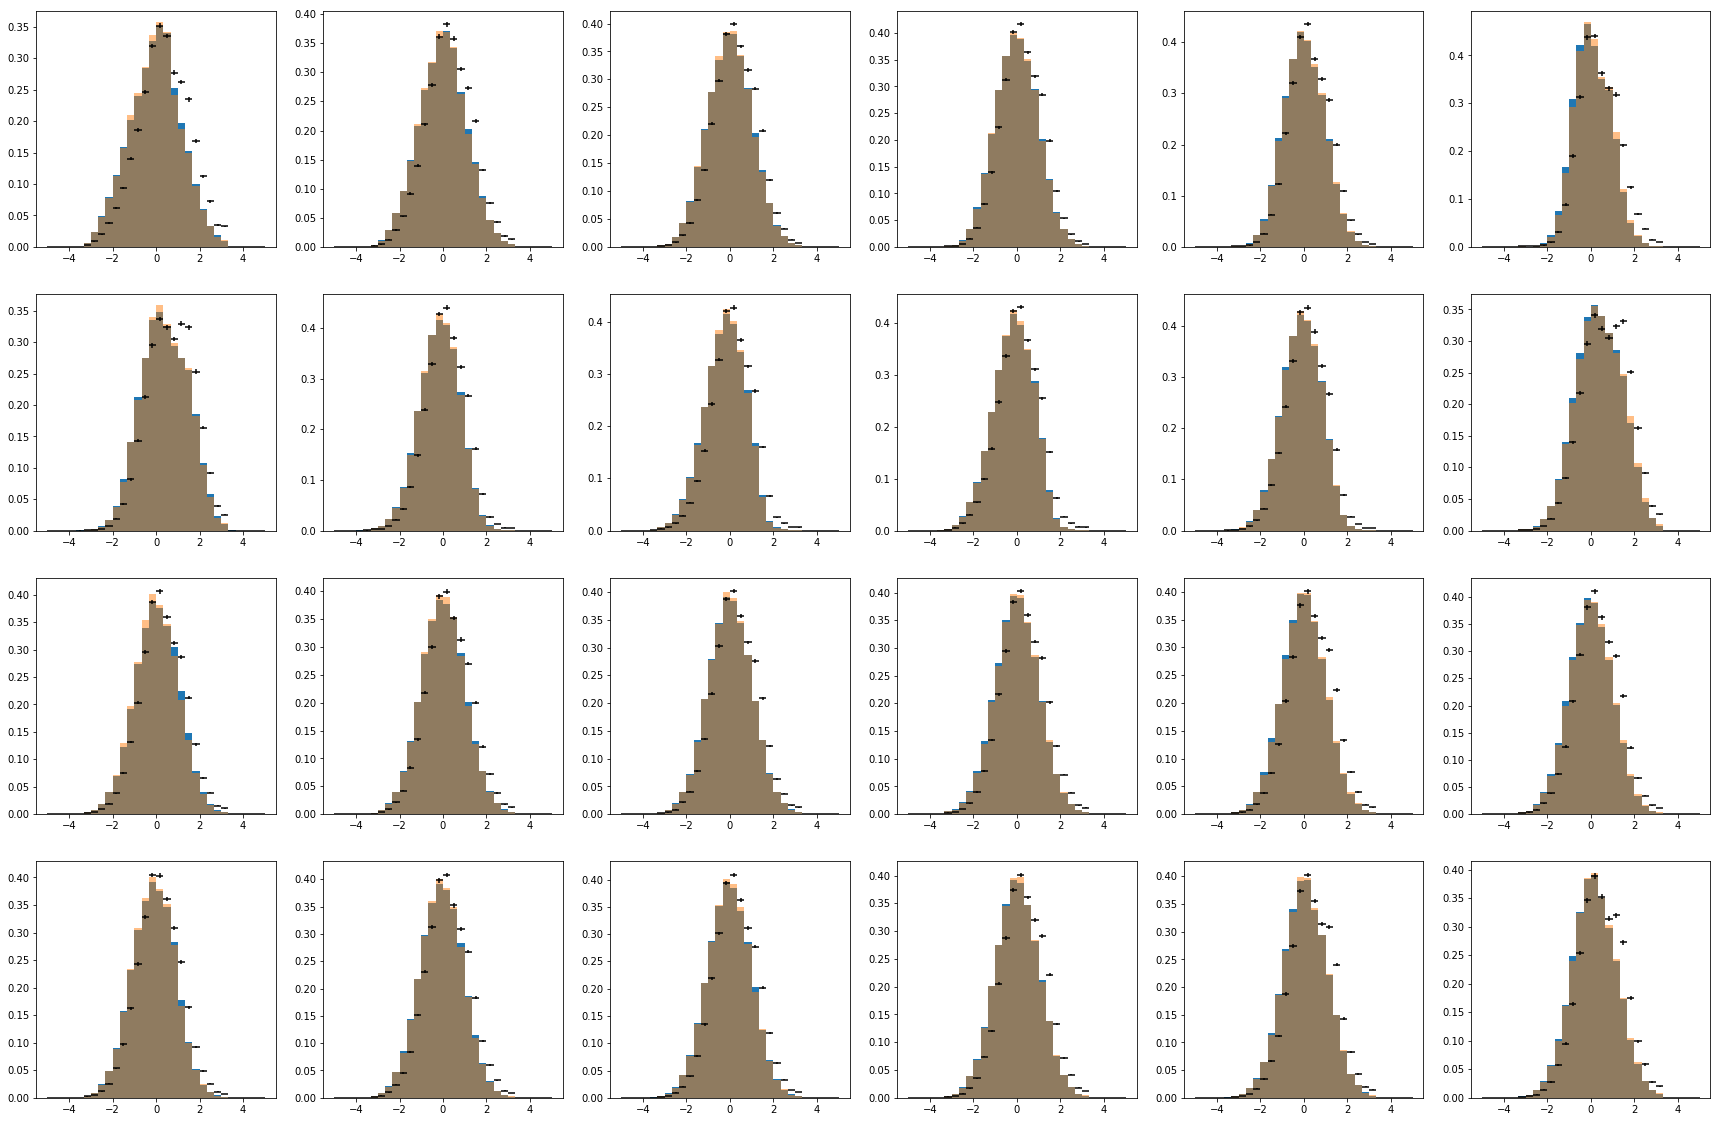

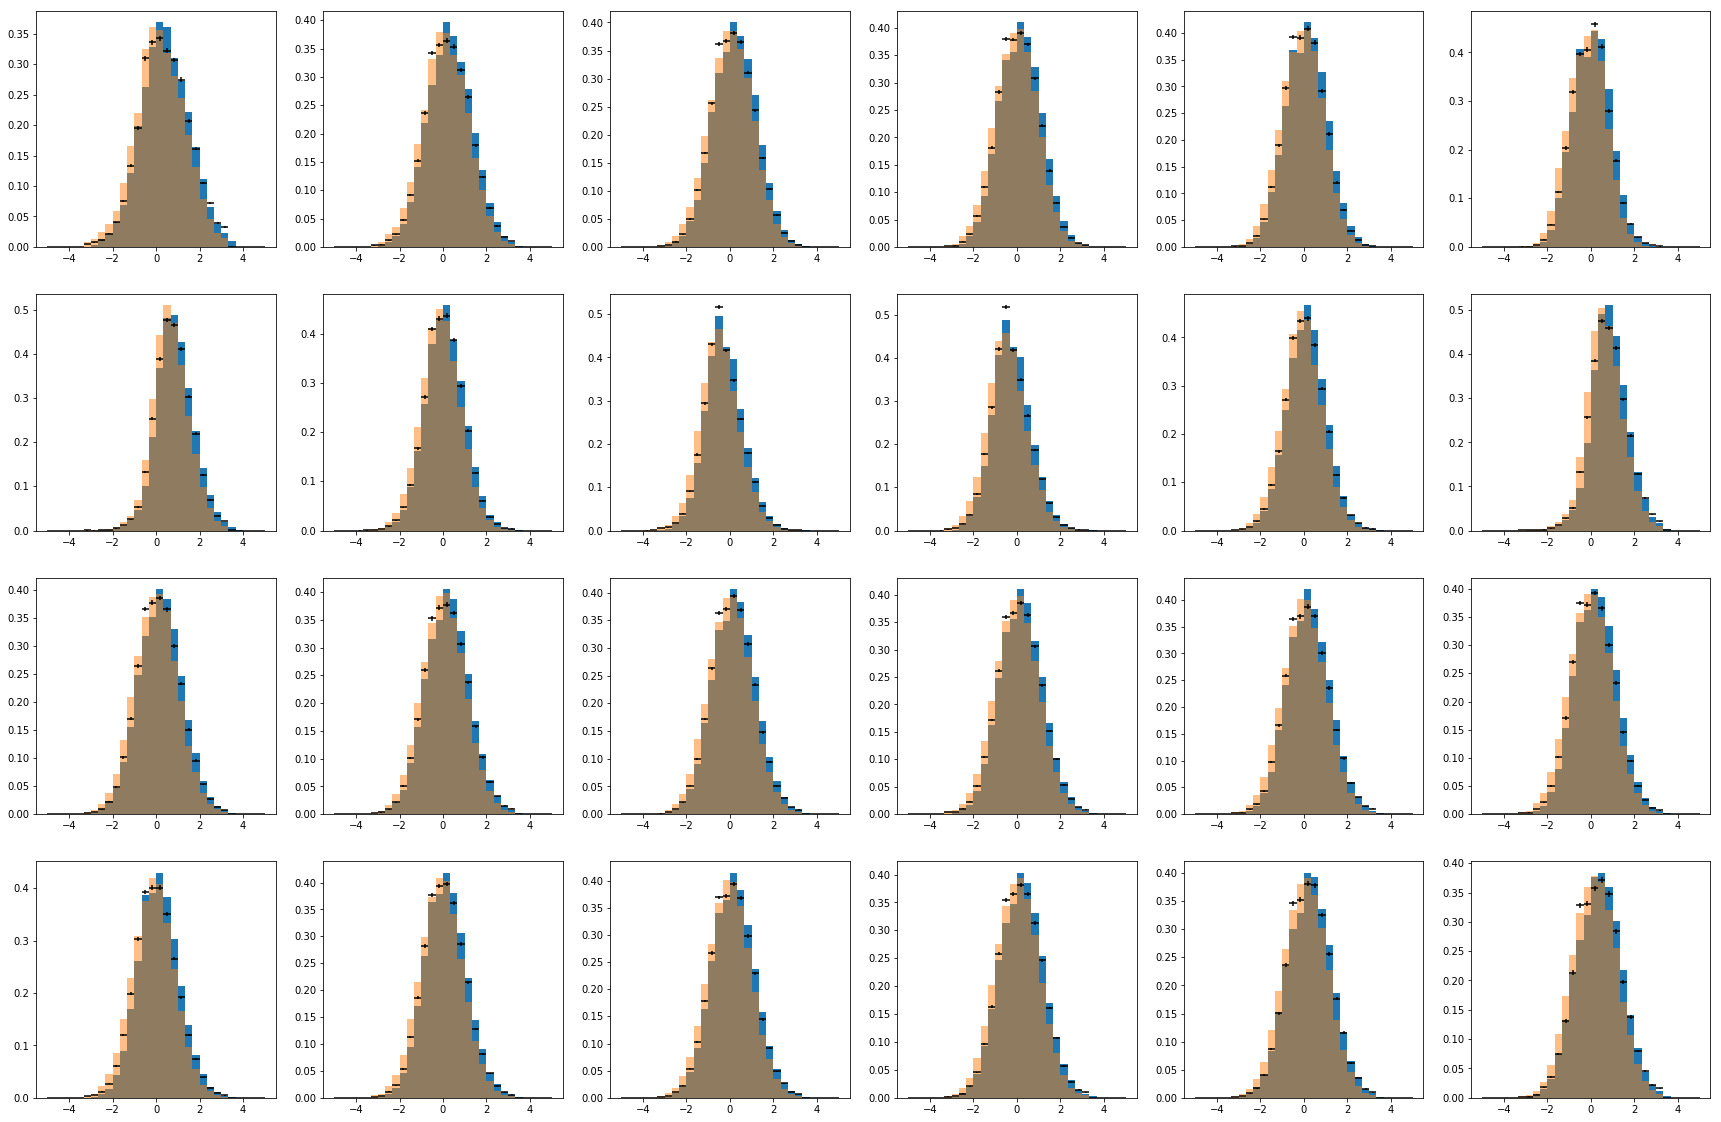

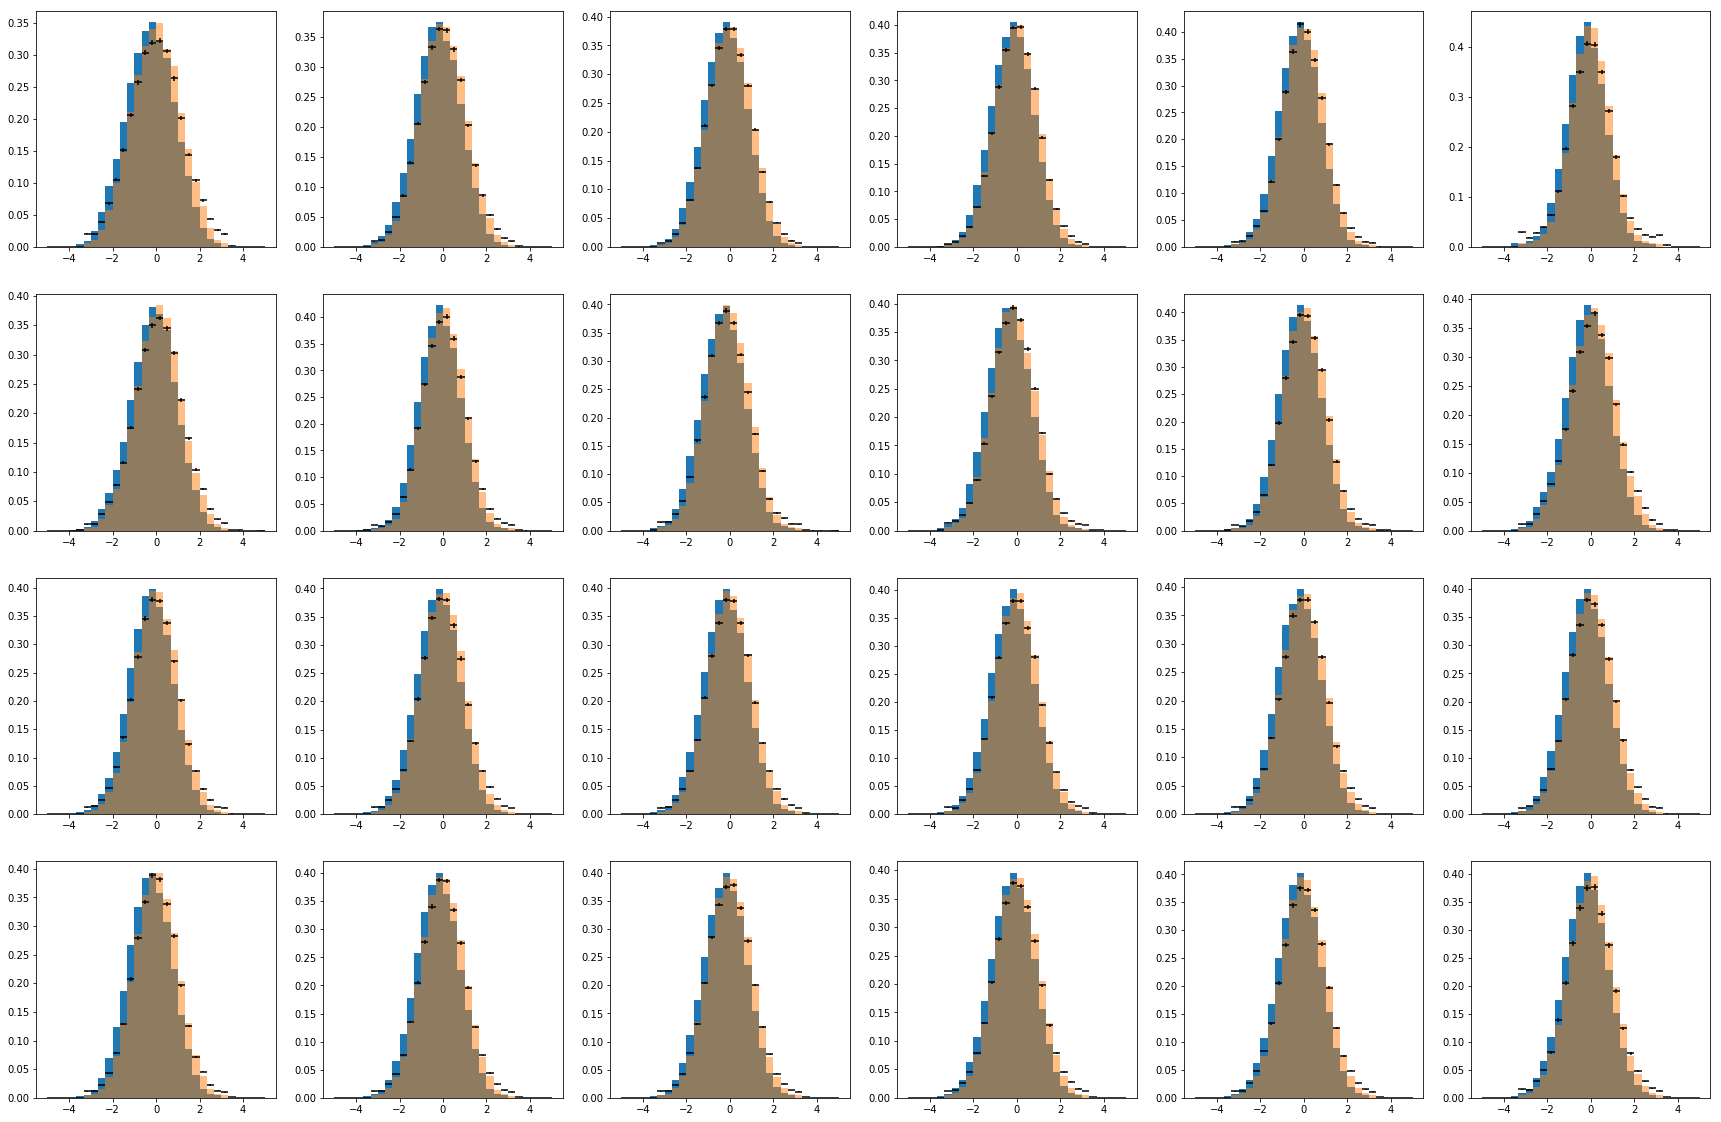

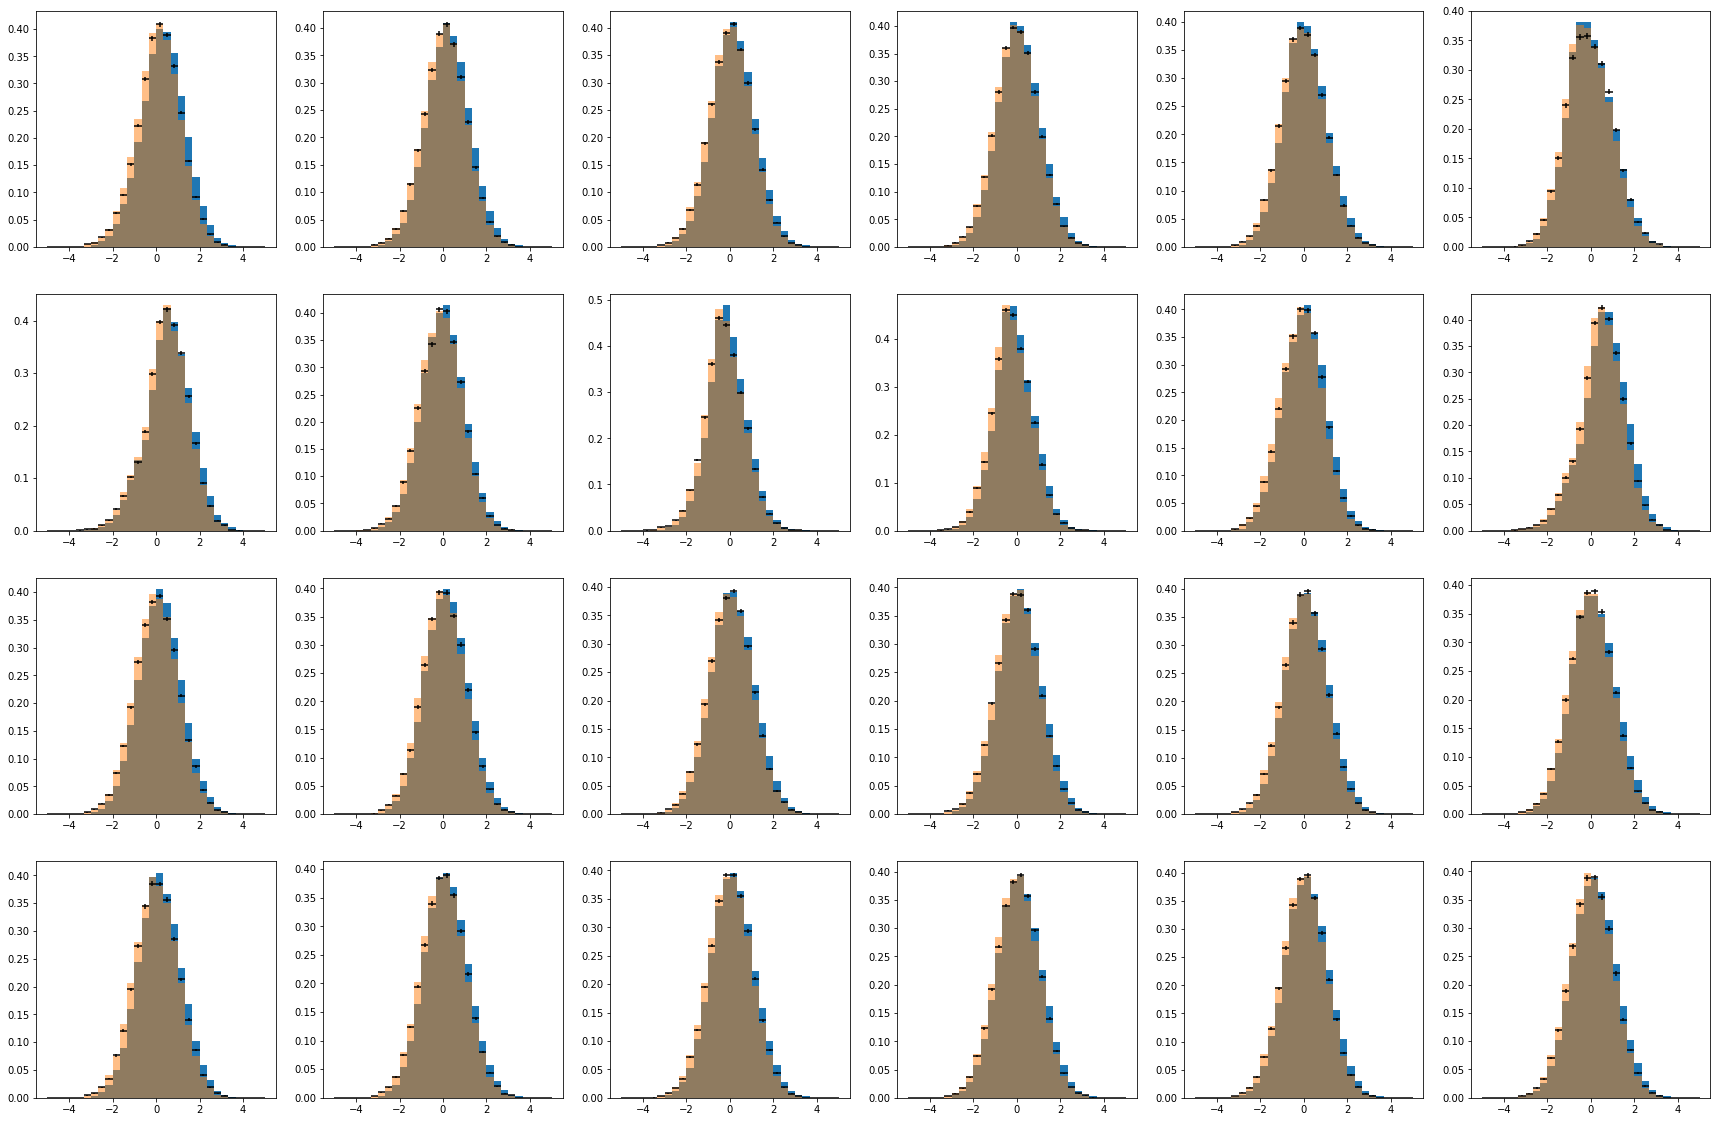

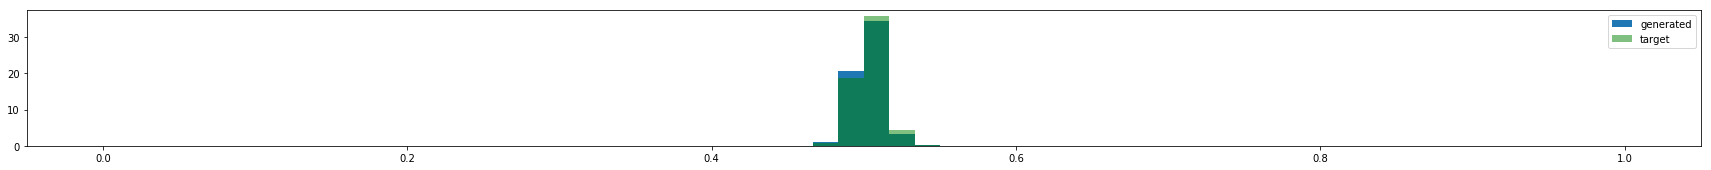

0: D: [0.694102 0.490234] A: [0.719513 0.193848]
0: D: [0.687563 0.538452] A: [0.750310 0.465576]
0: D: [0.686224 0.544189] A: [0.720751 0.554688]
0: D: [0.685601 0.545654] A: [0.716323 0.568604]
0: D: [0.685867 0.545044] A: [0.721458 0.560547]


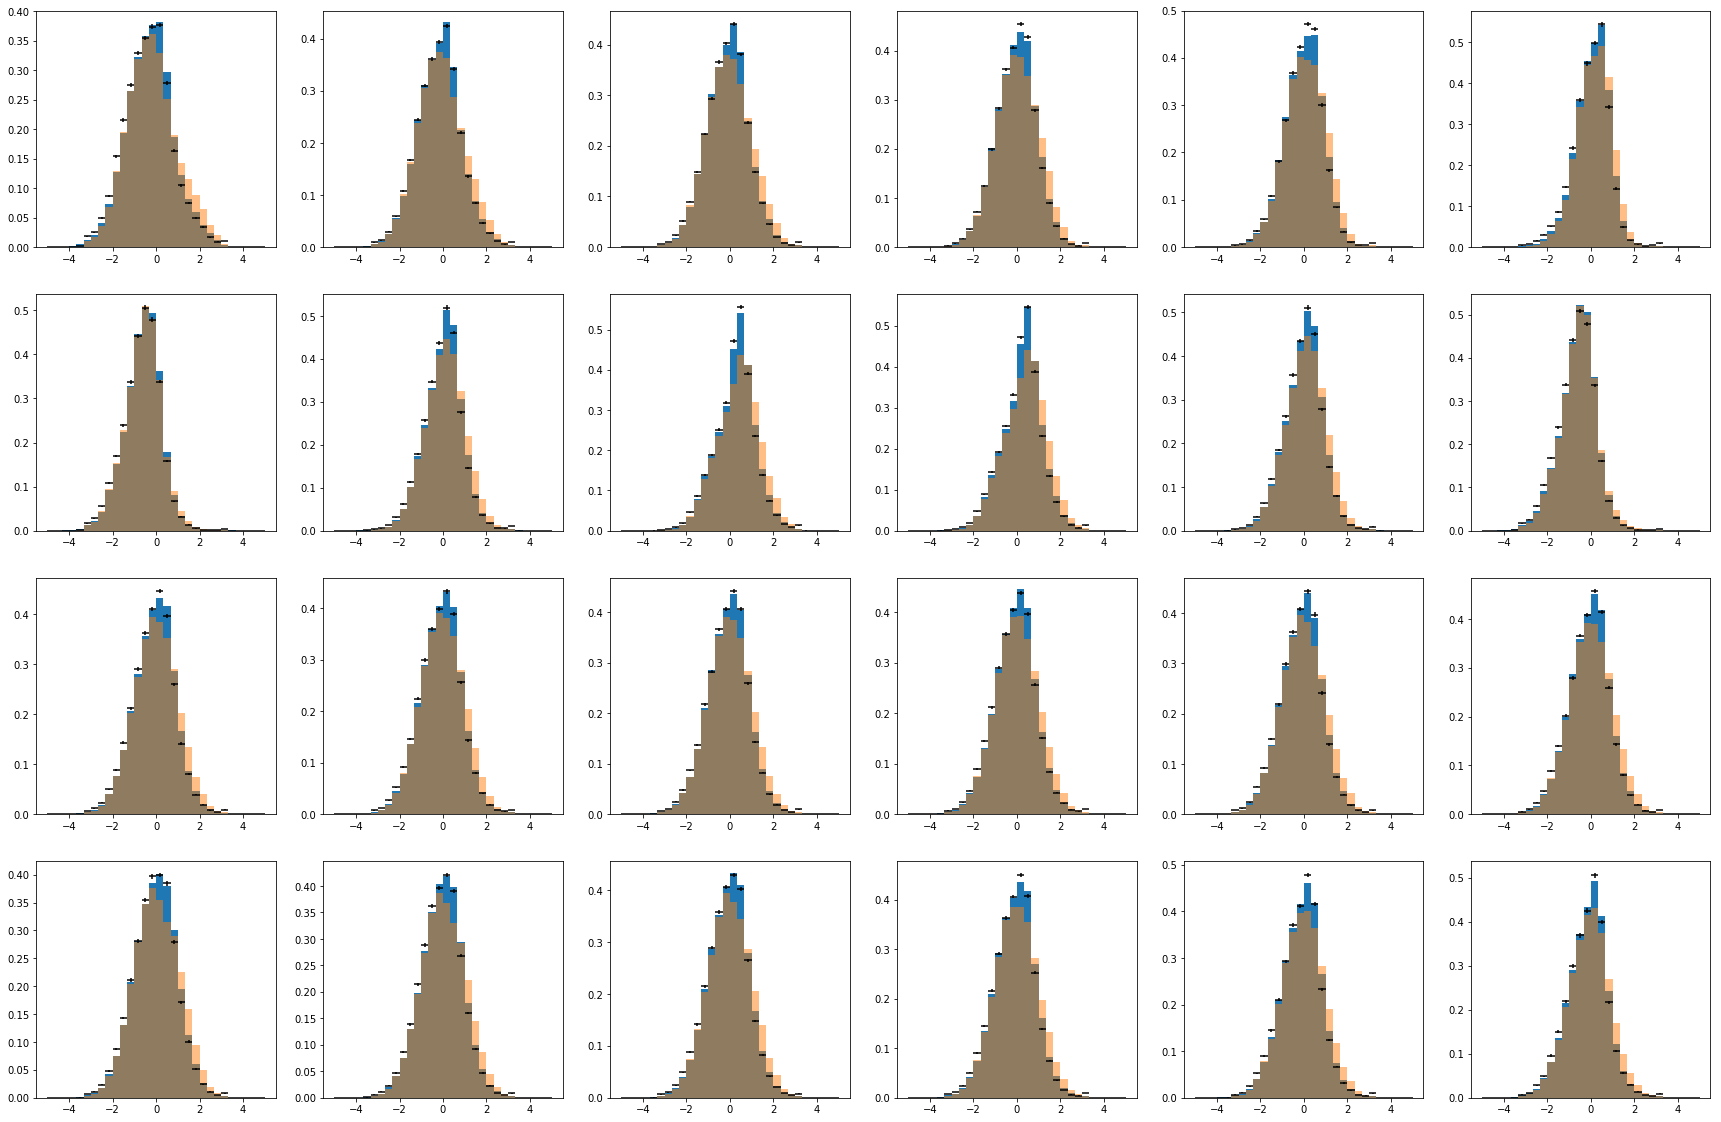

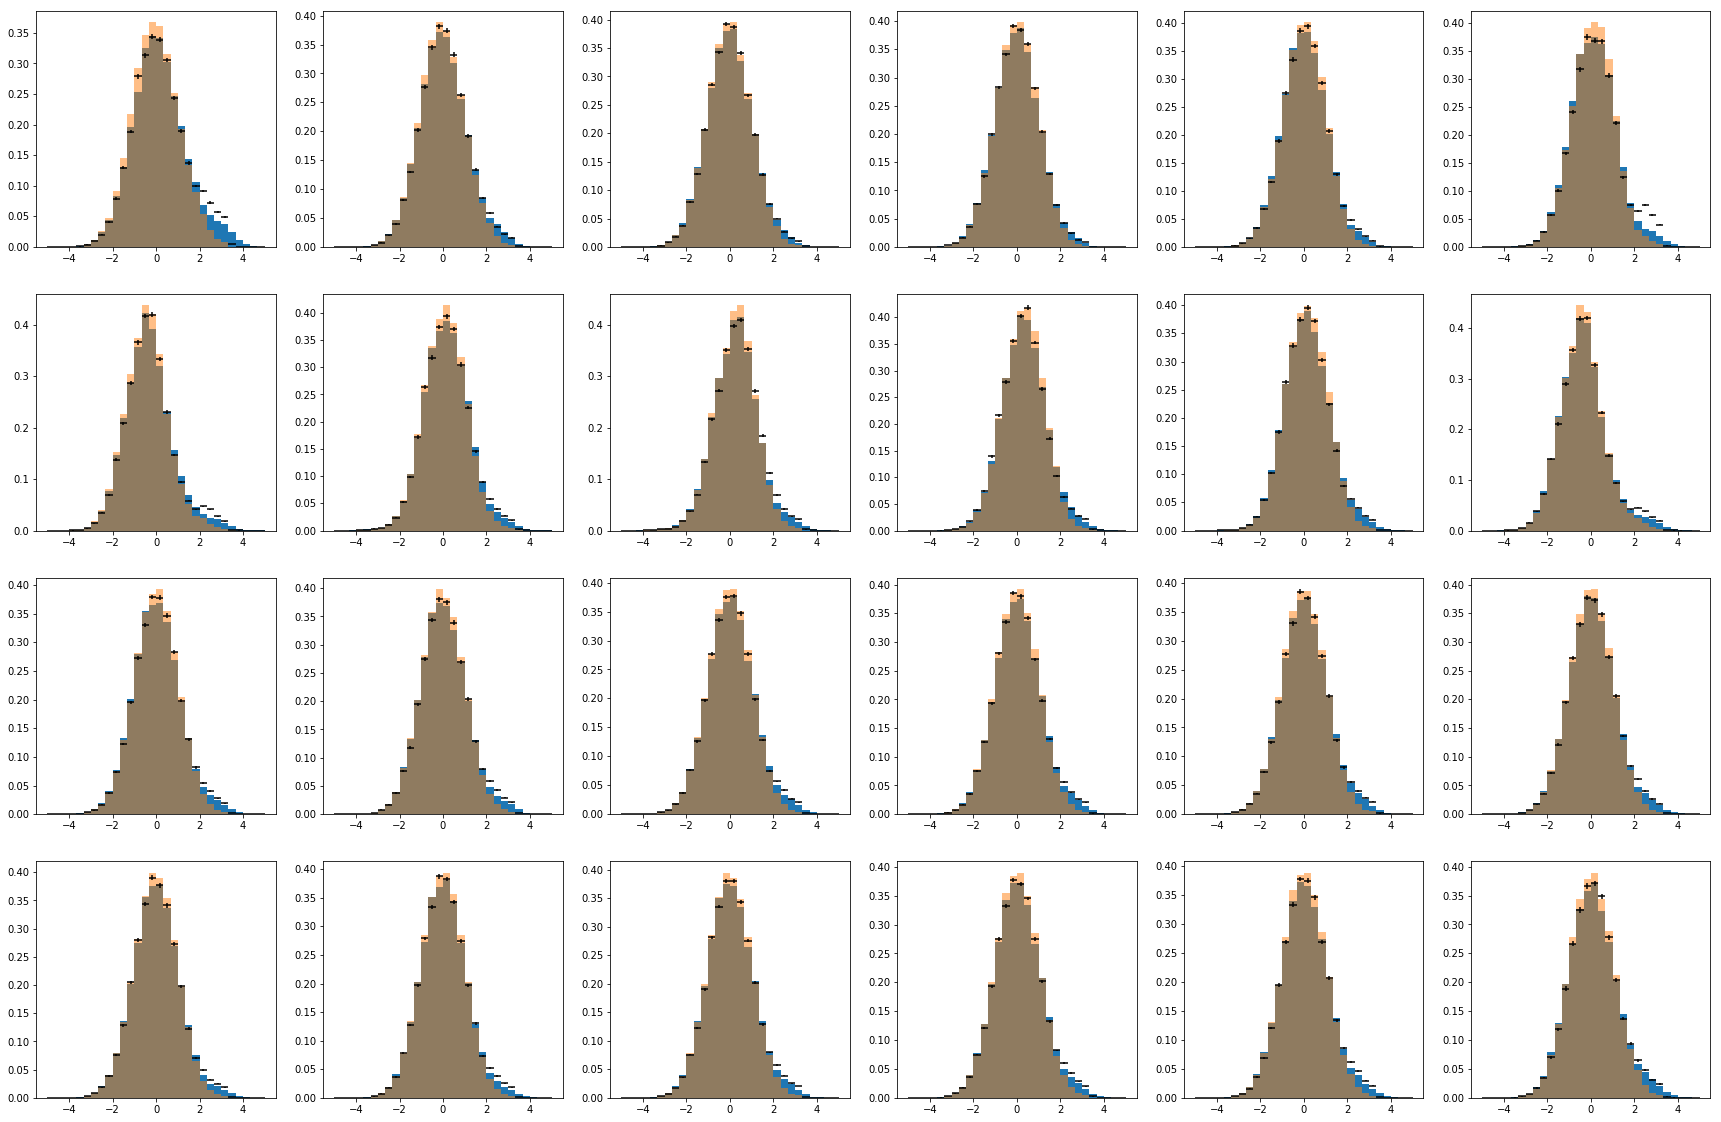

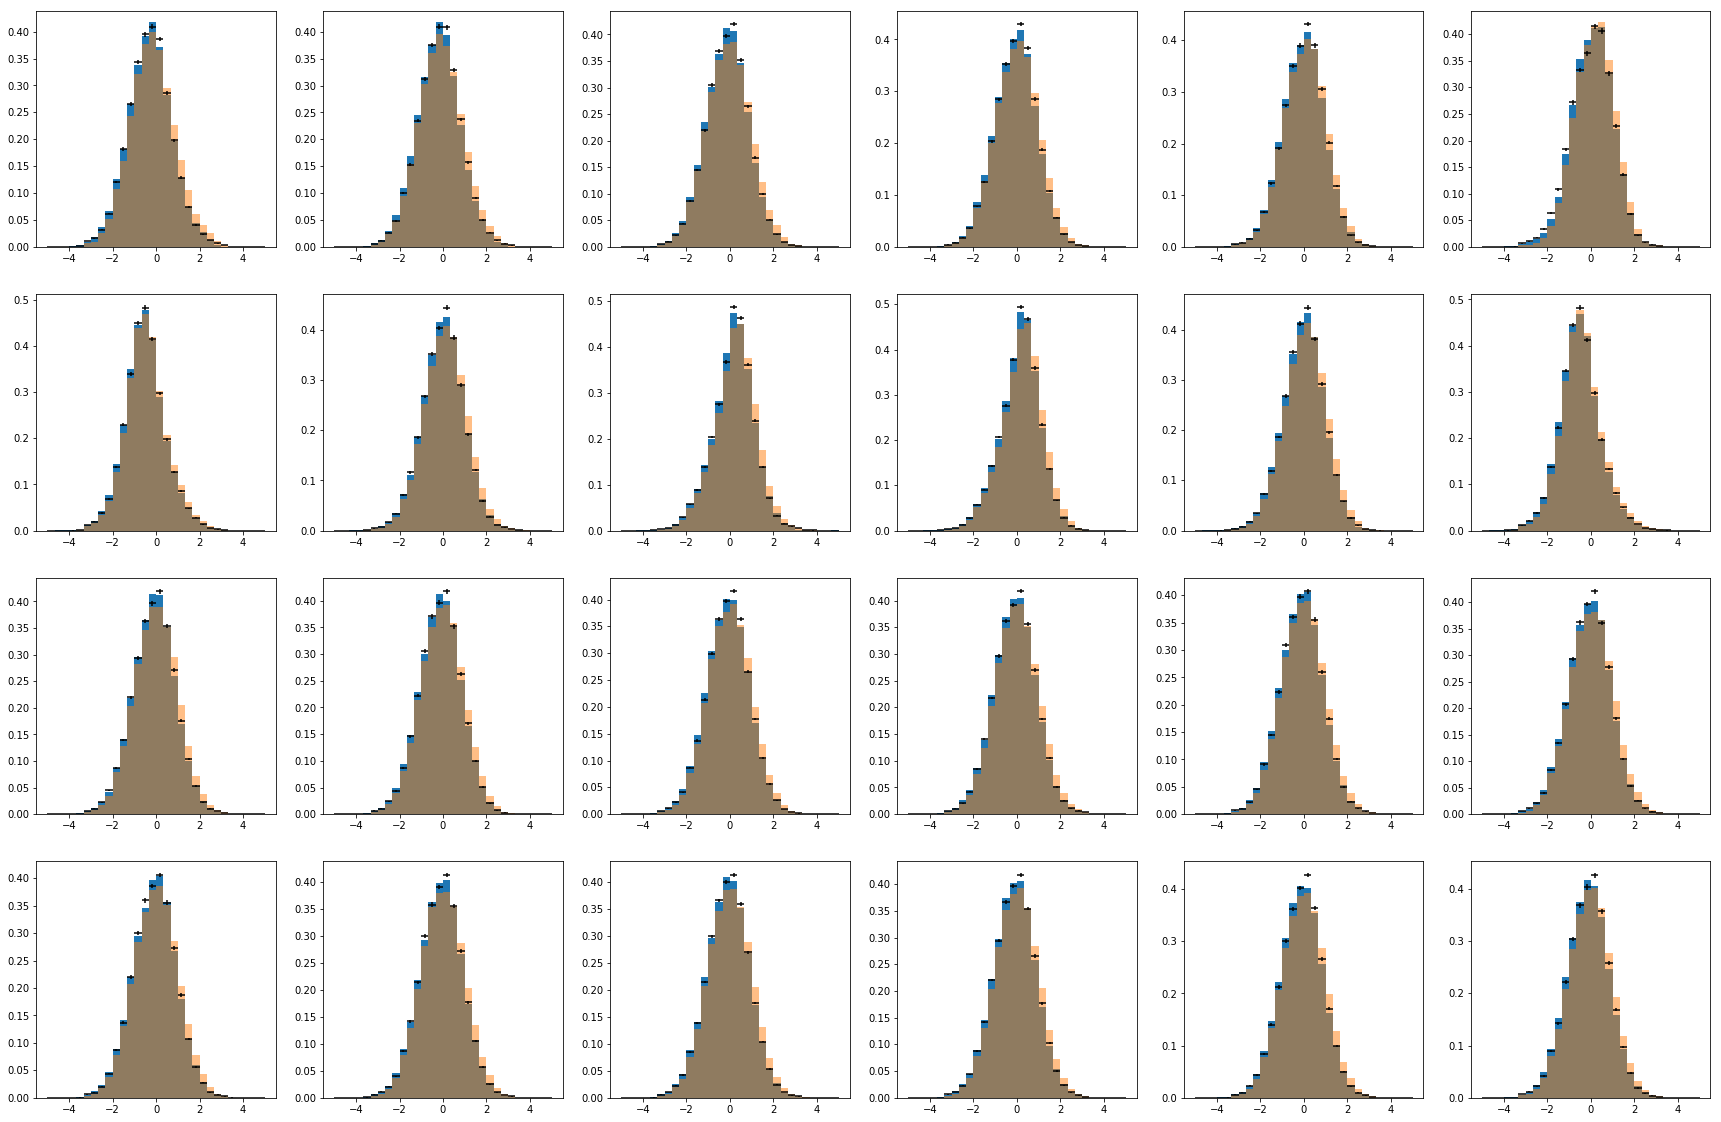

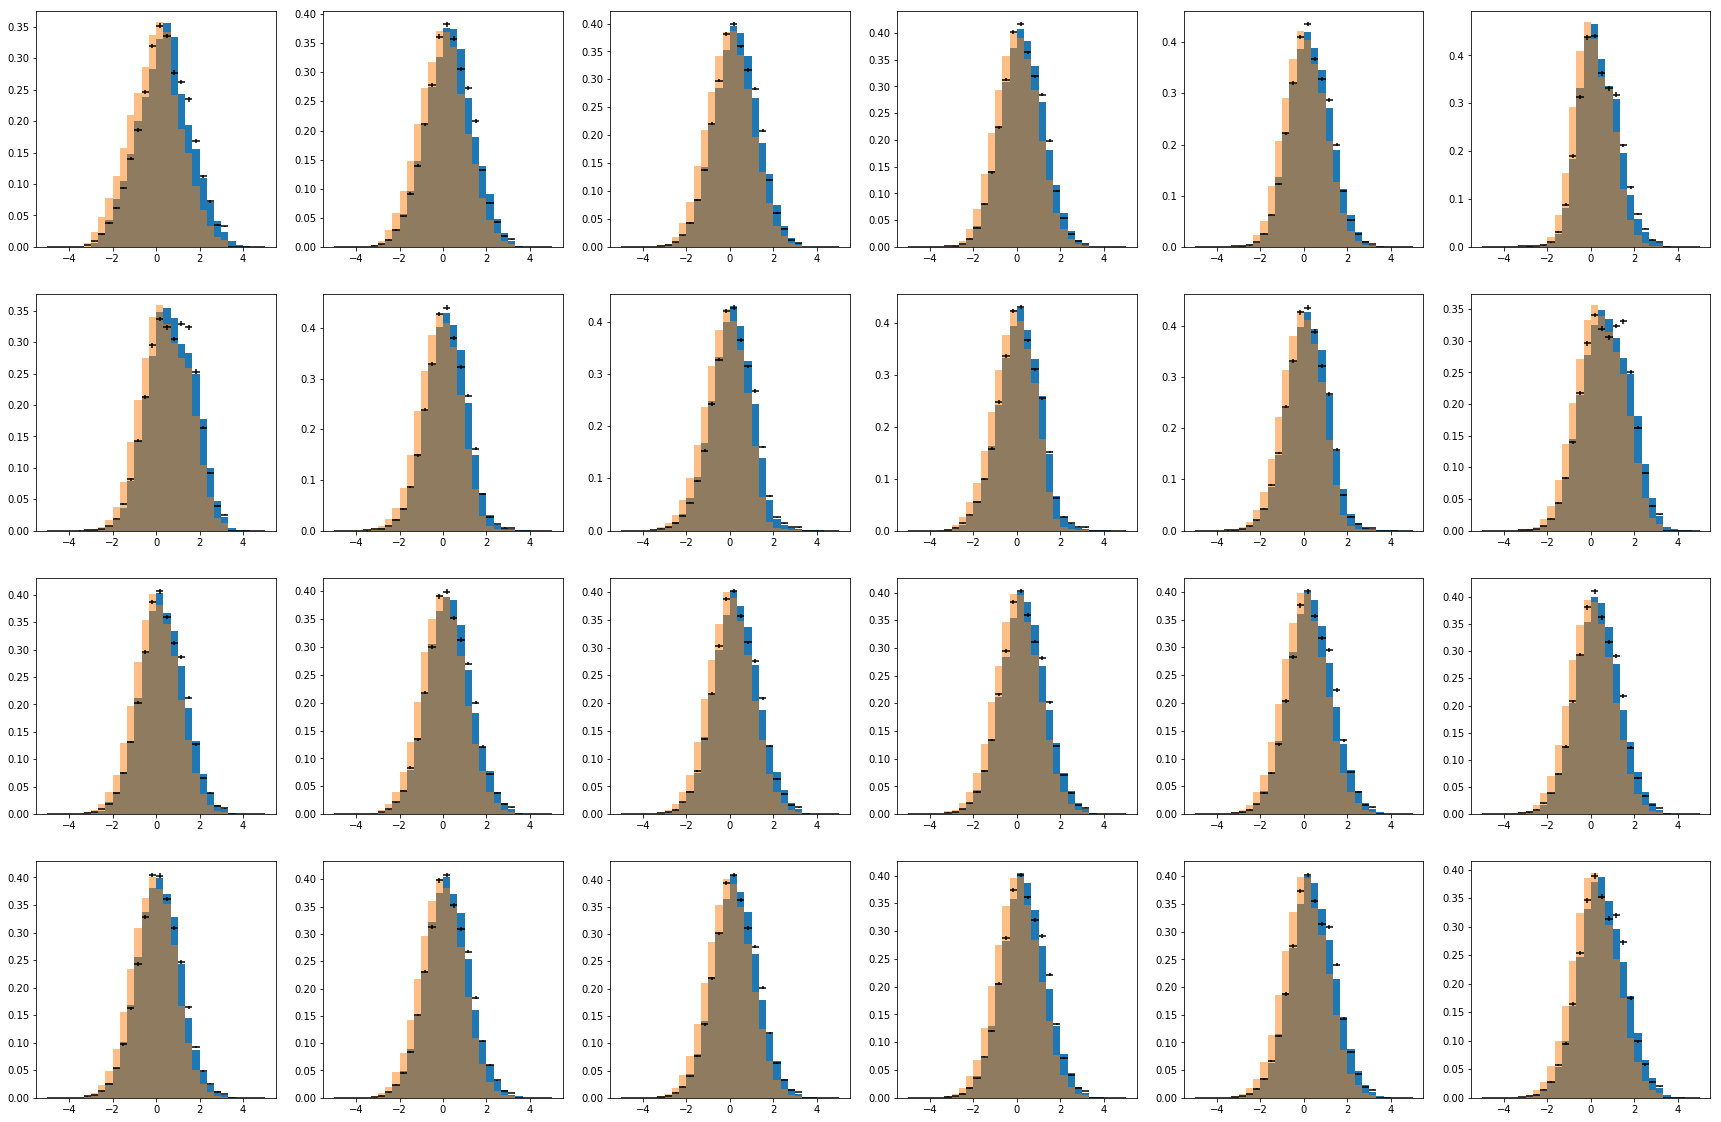

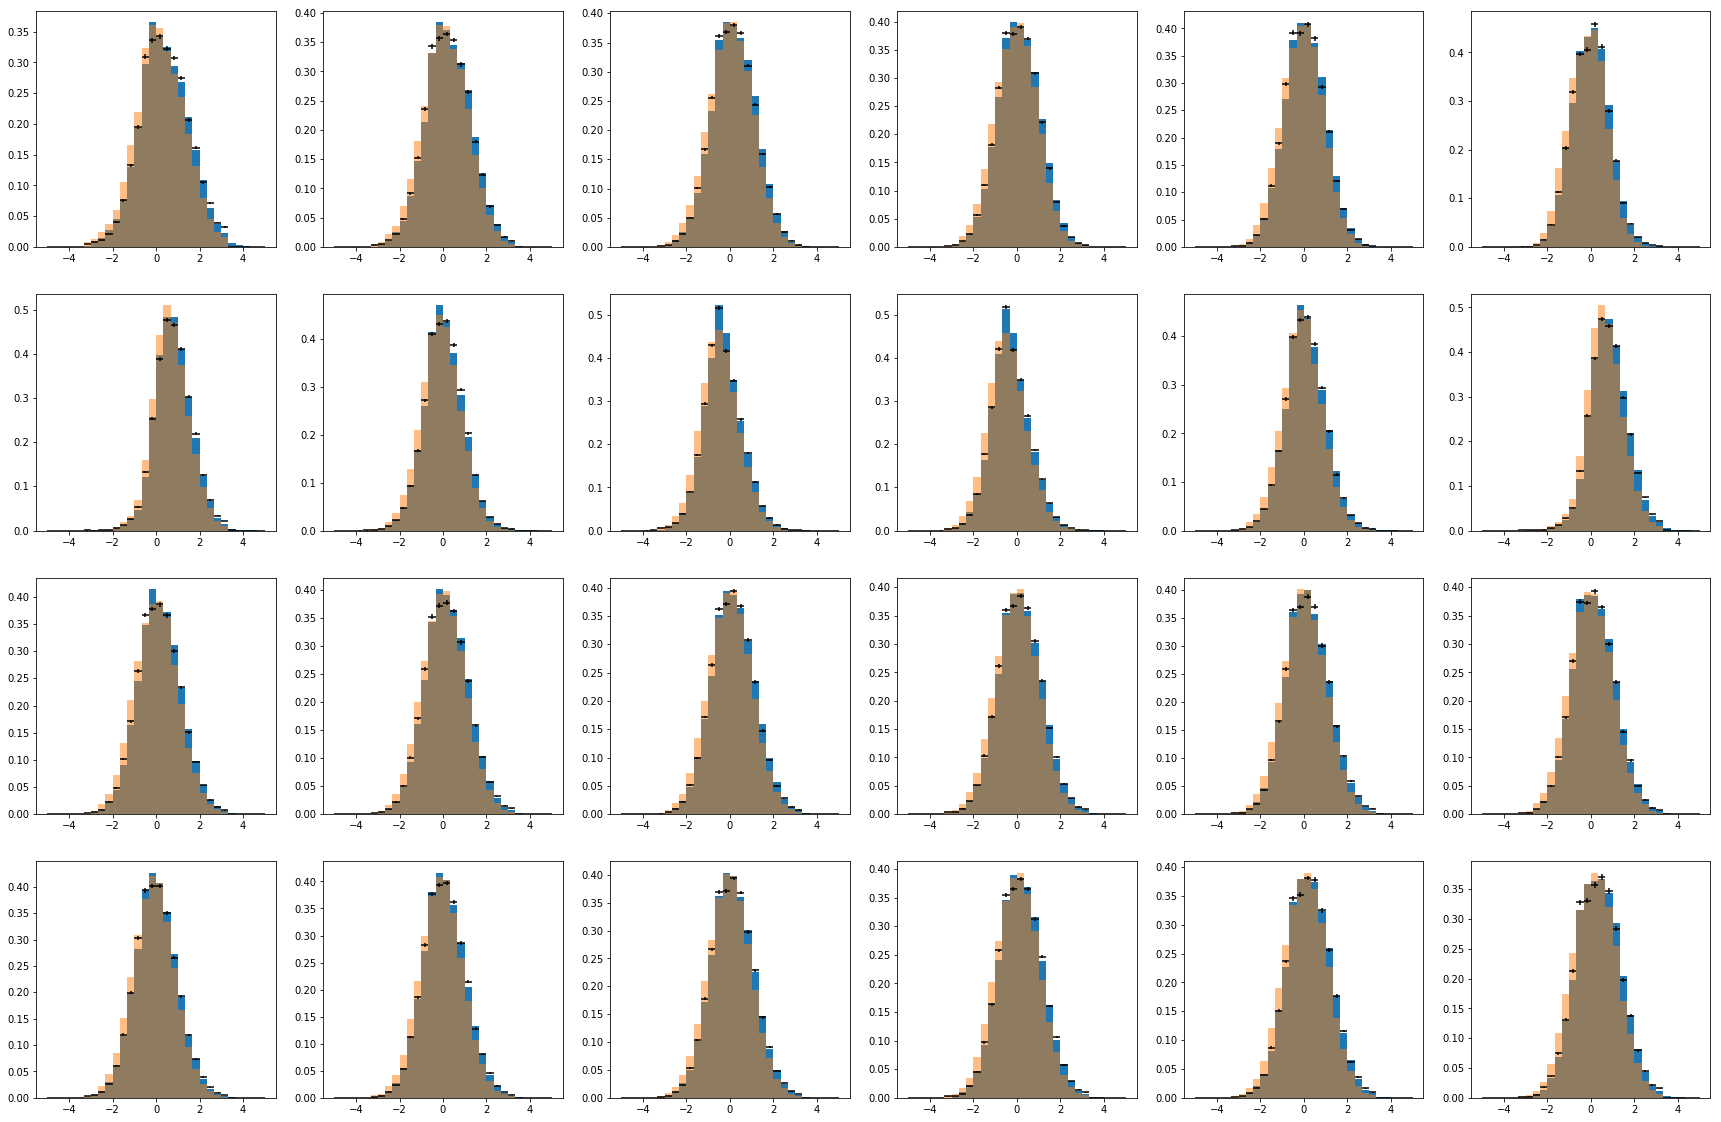

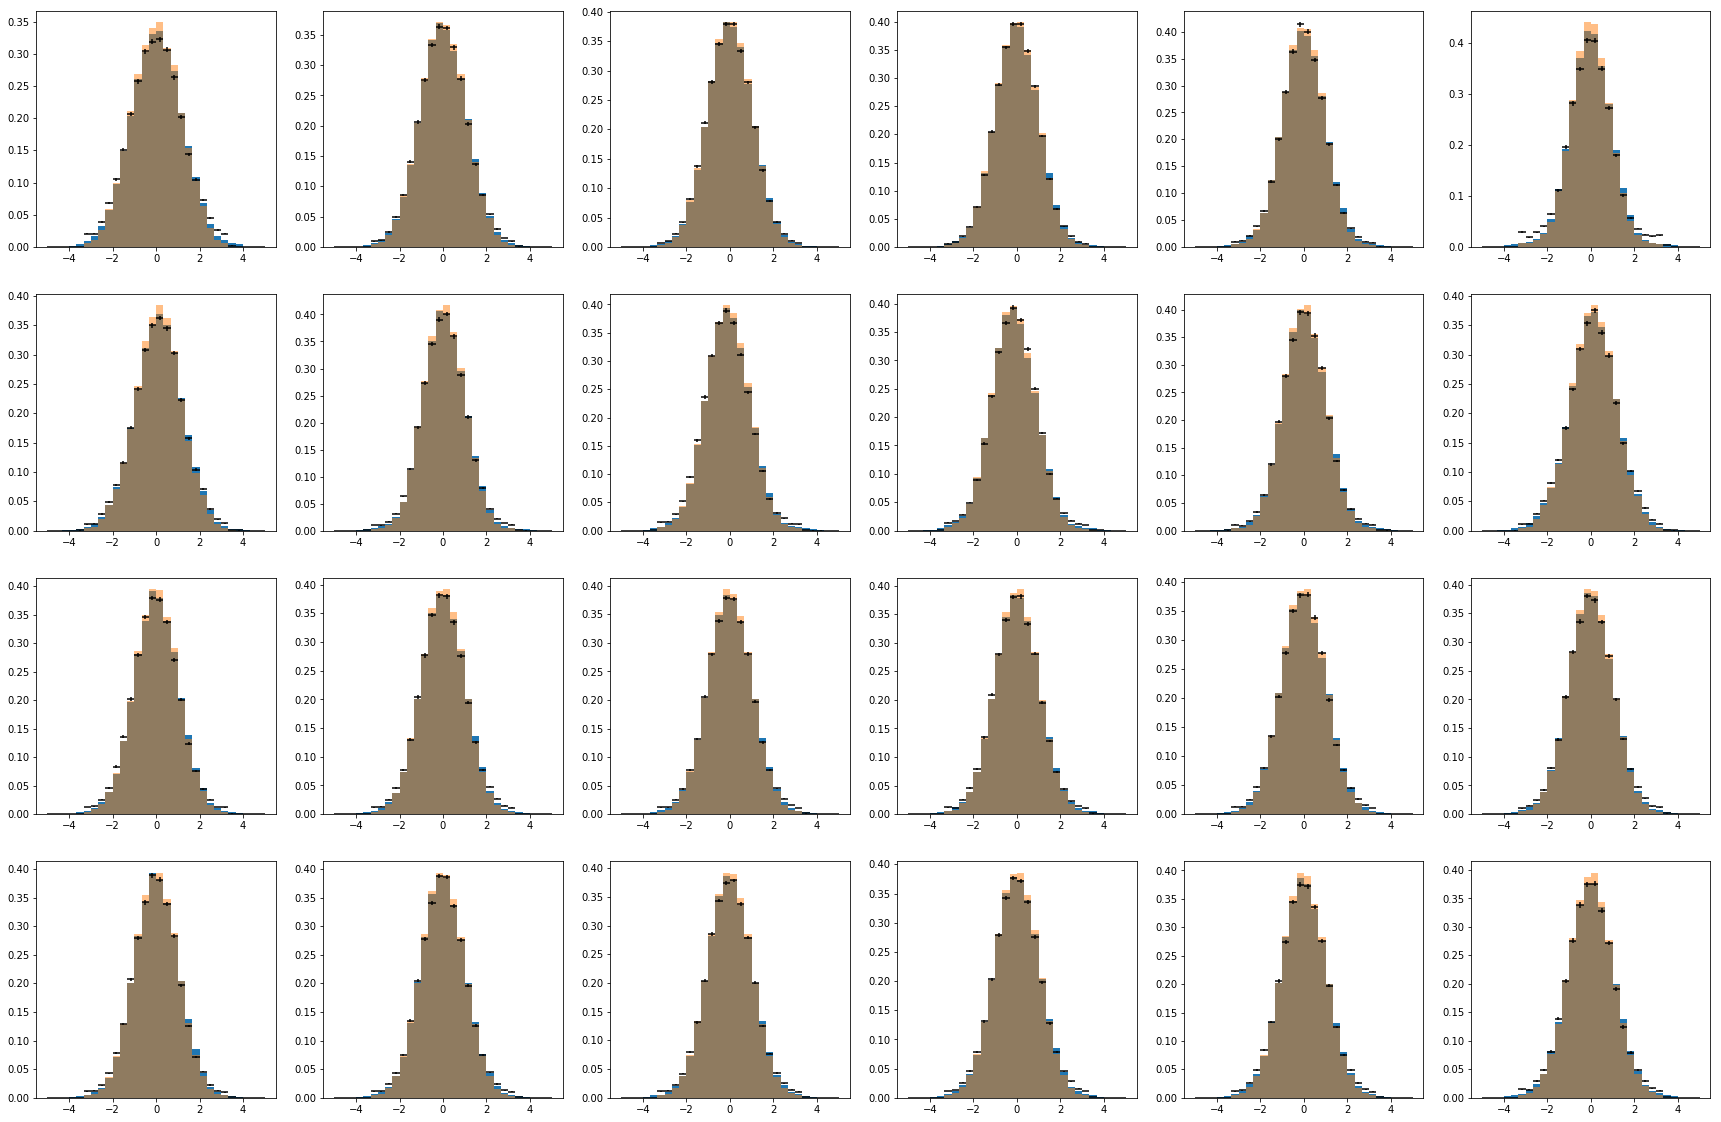

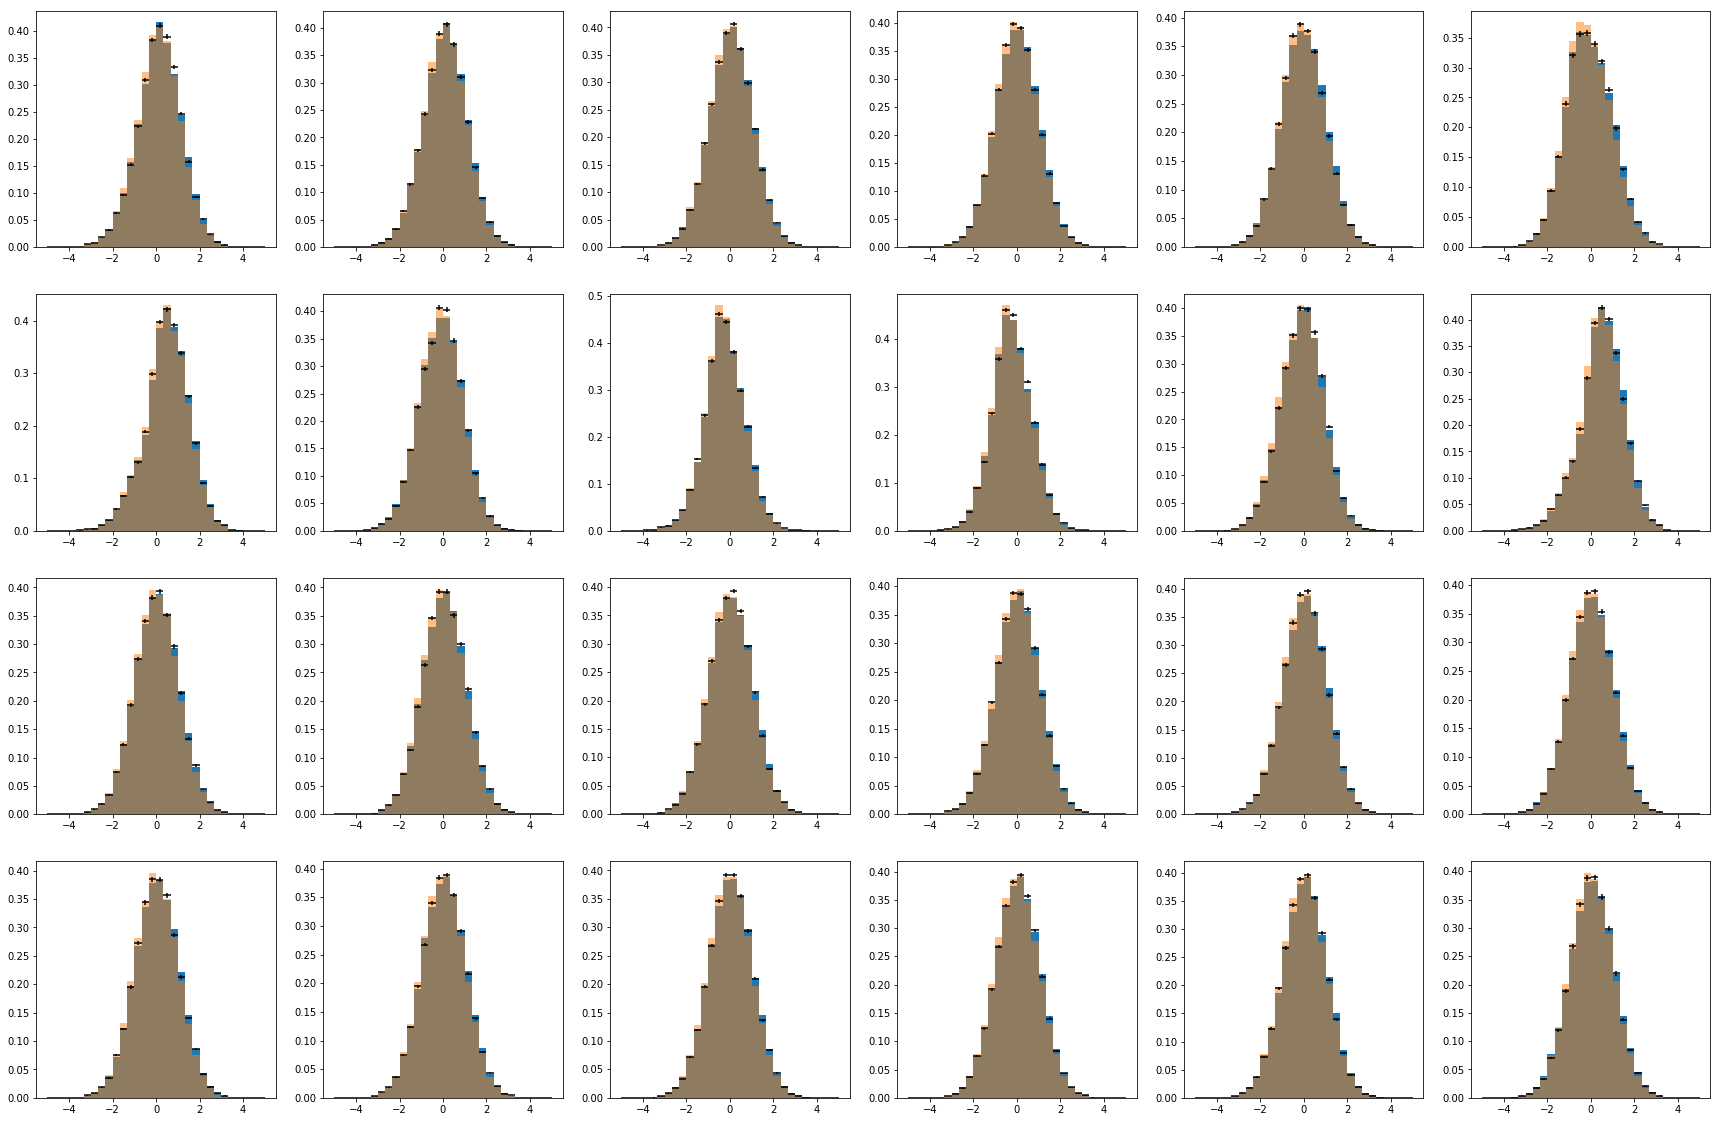

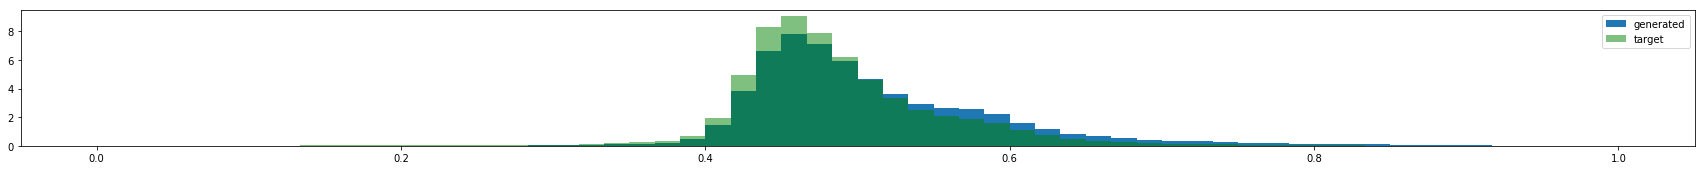

0: D: [0.685395 0.545288] A: [0.728392 0.546387]
0: D: [0.685103 0.545654] A: [0.733401 0.531738]
0: D: [0.685483 0.544067] A: [0.735532 0.526123]
0: D: [0.685426 0.542969] A: [0.733214 0.531982]


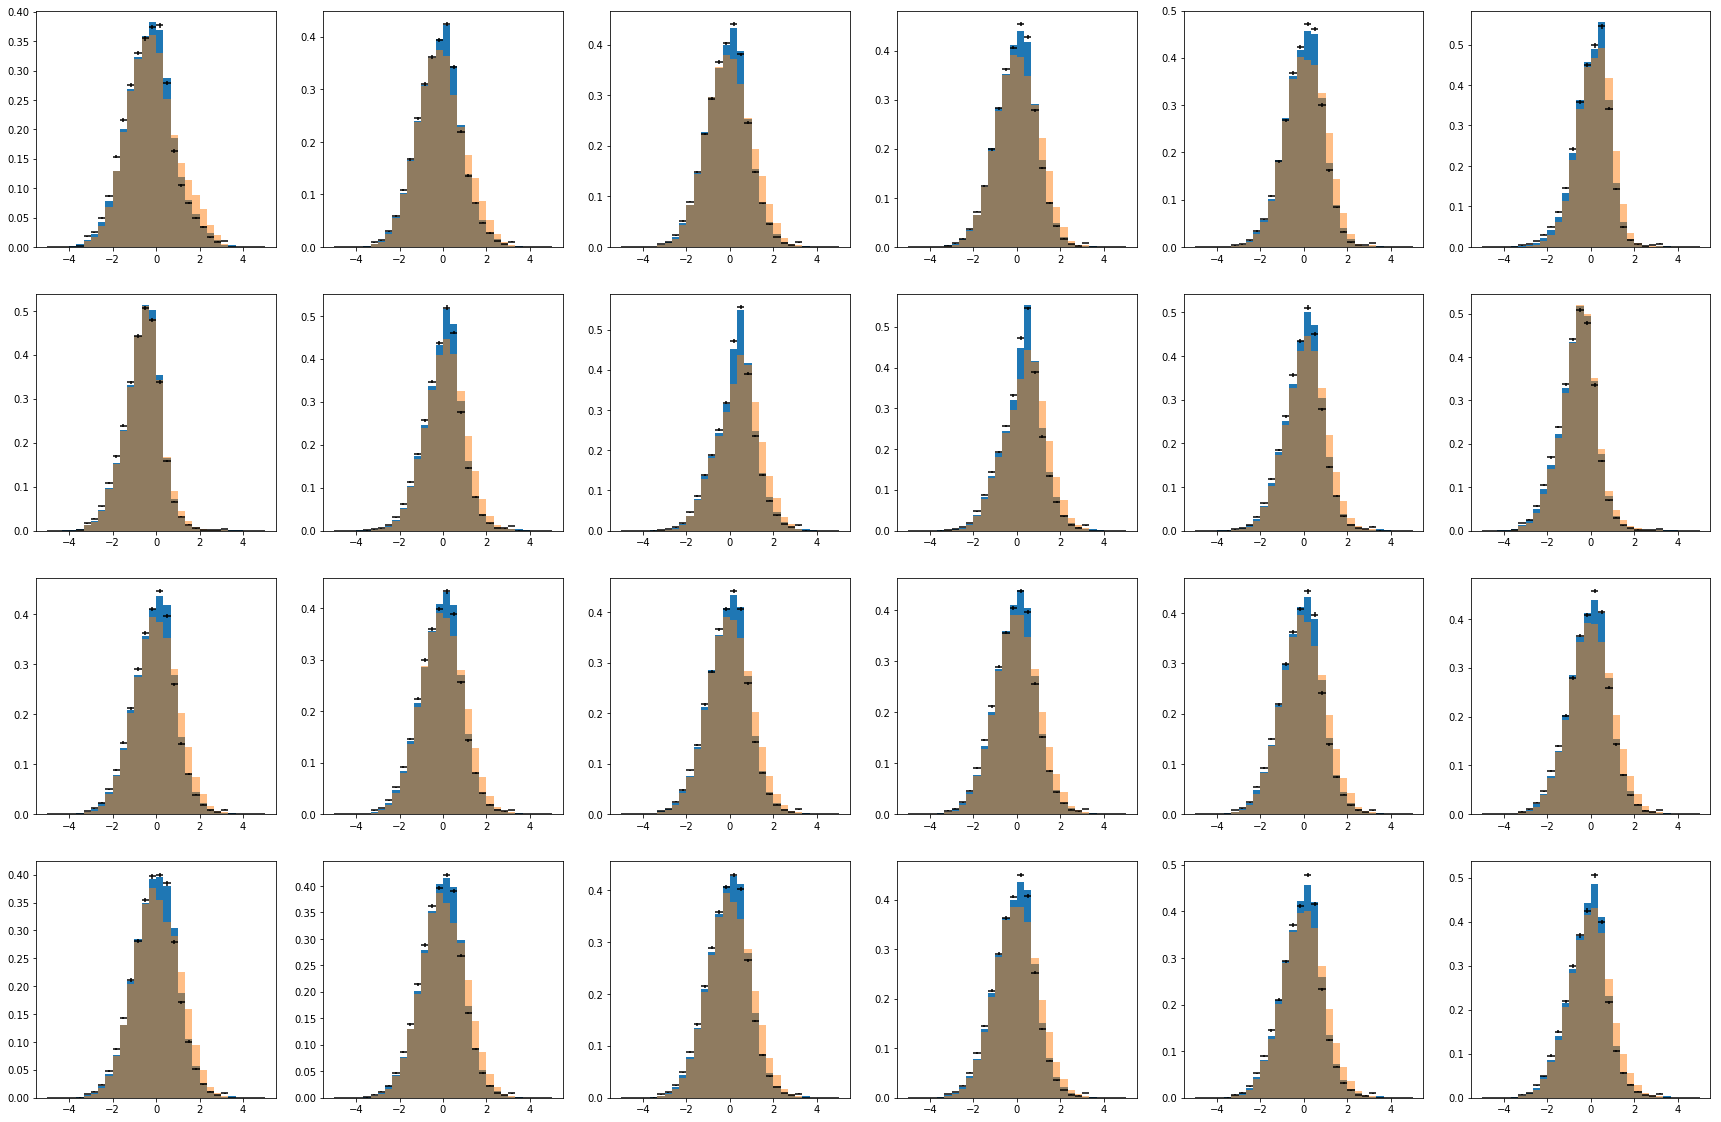

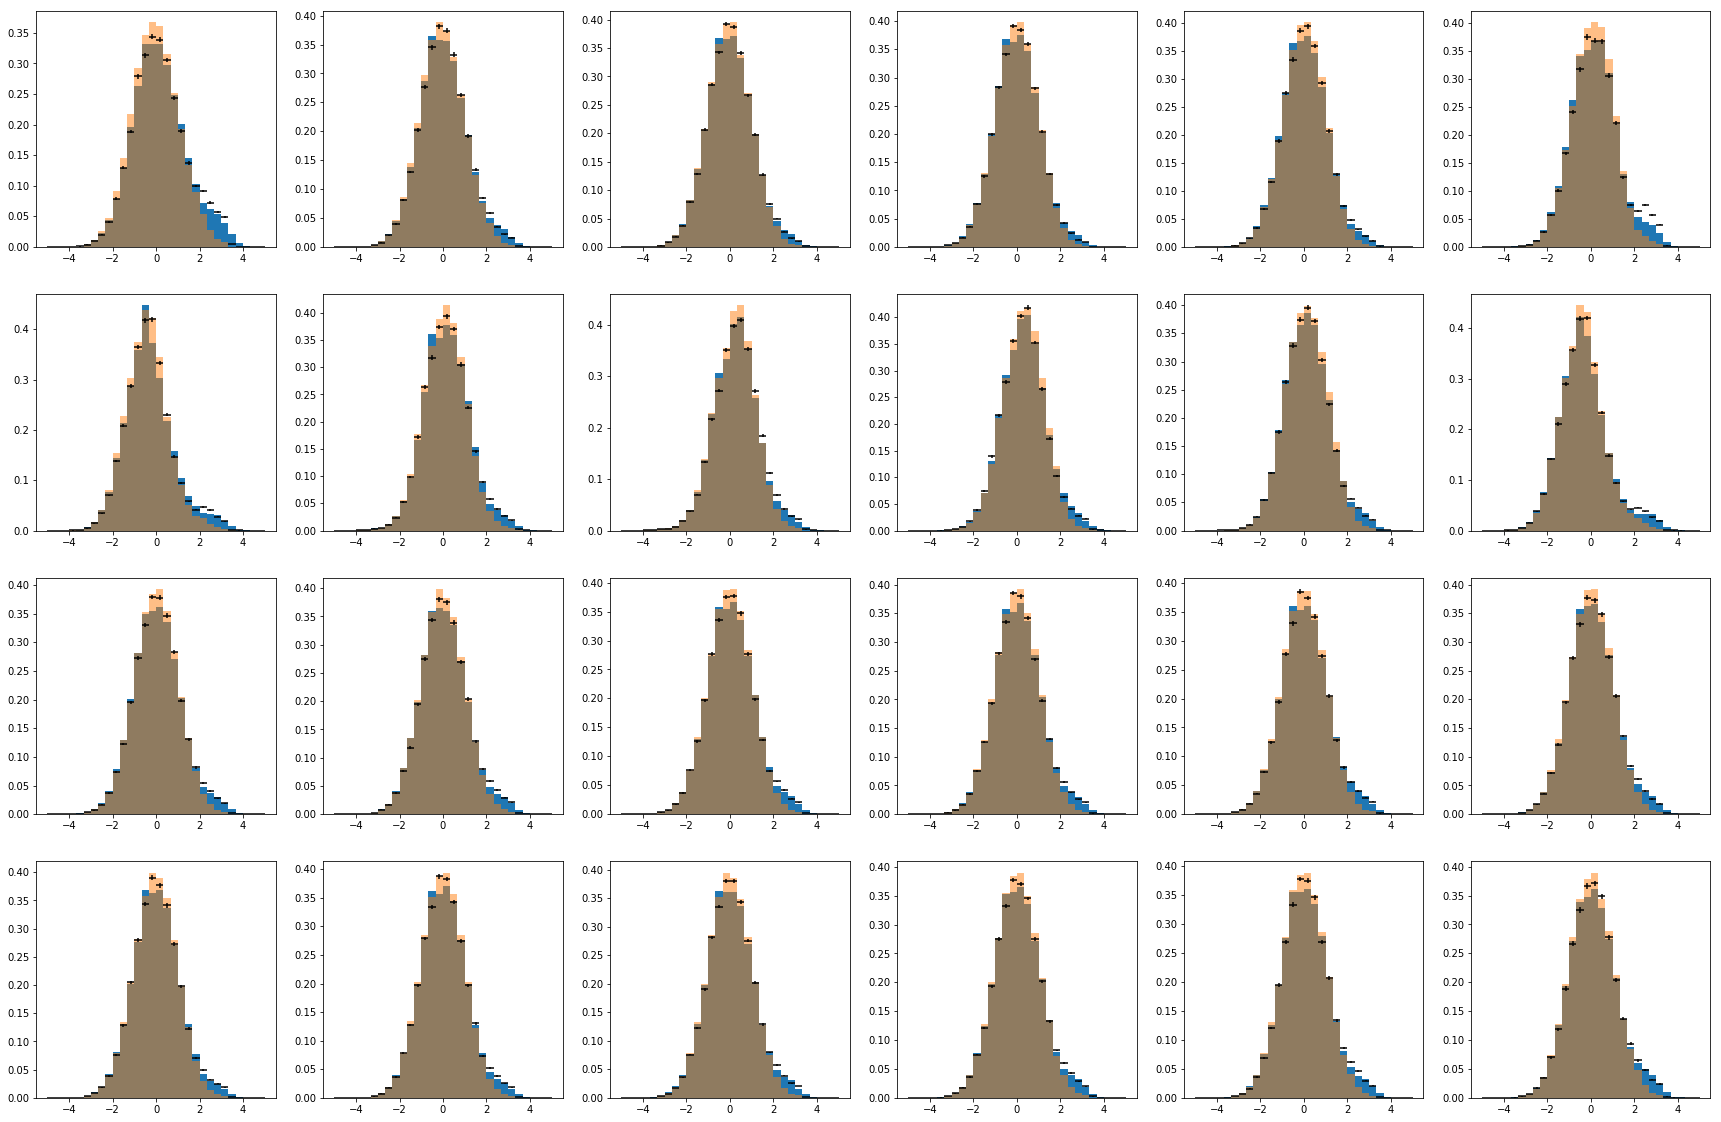

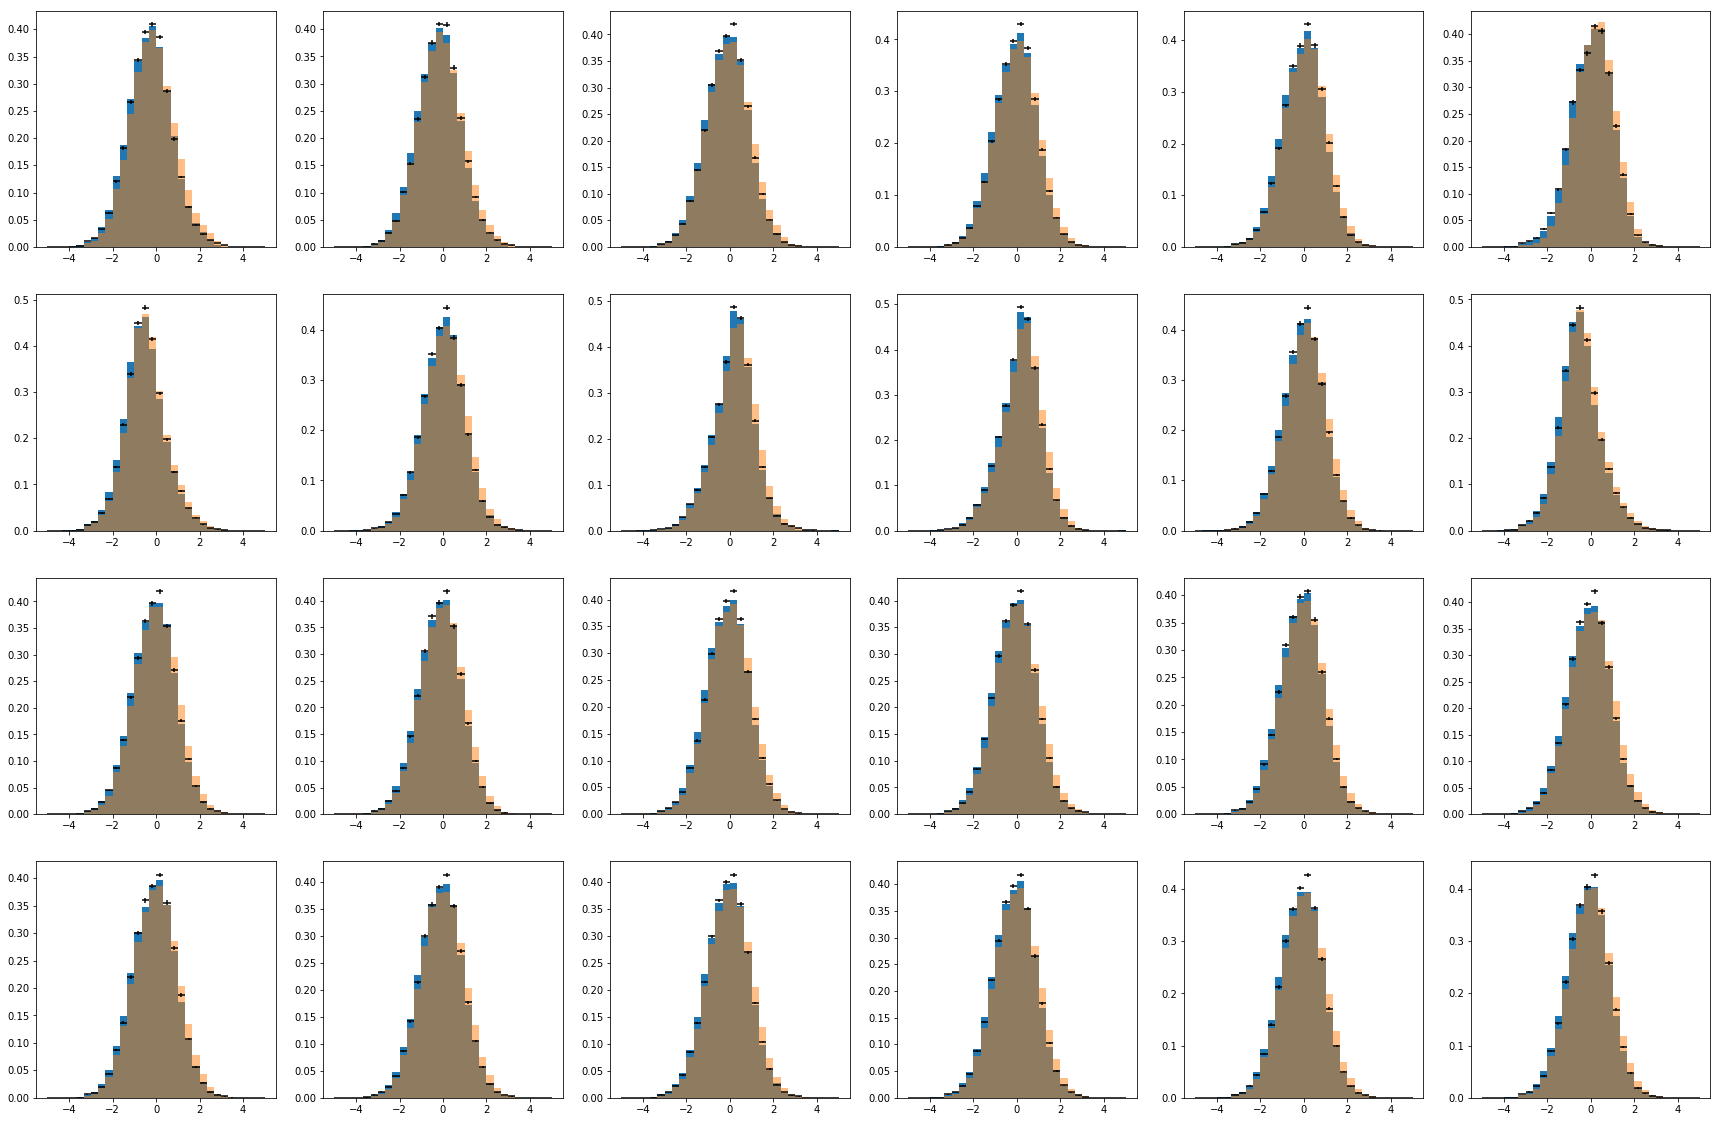

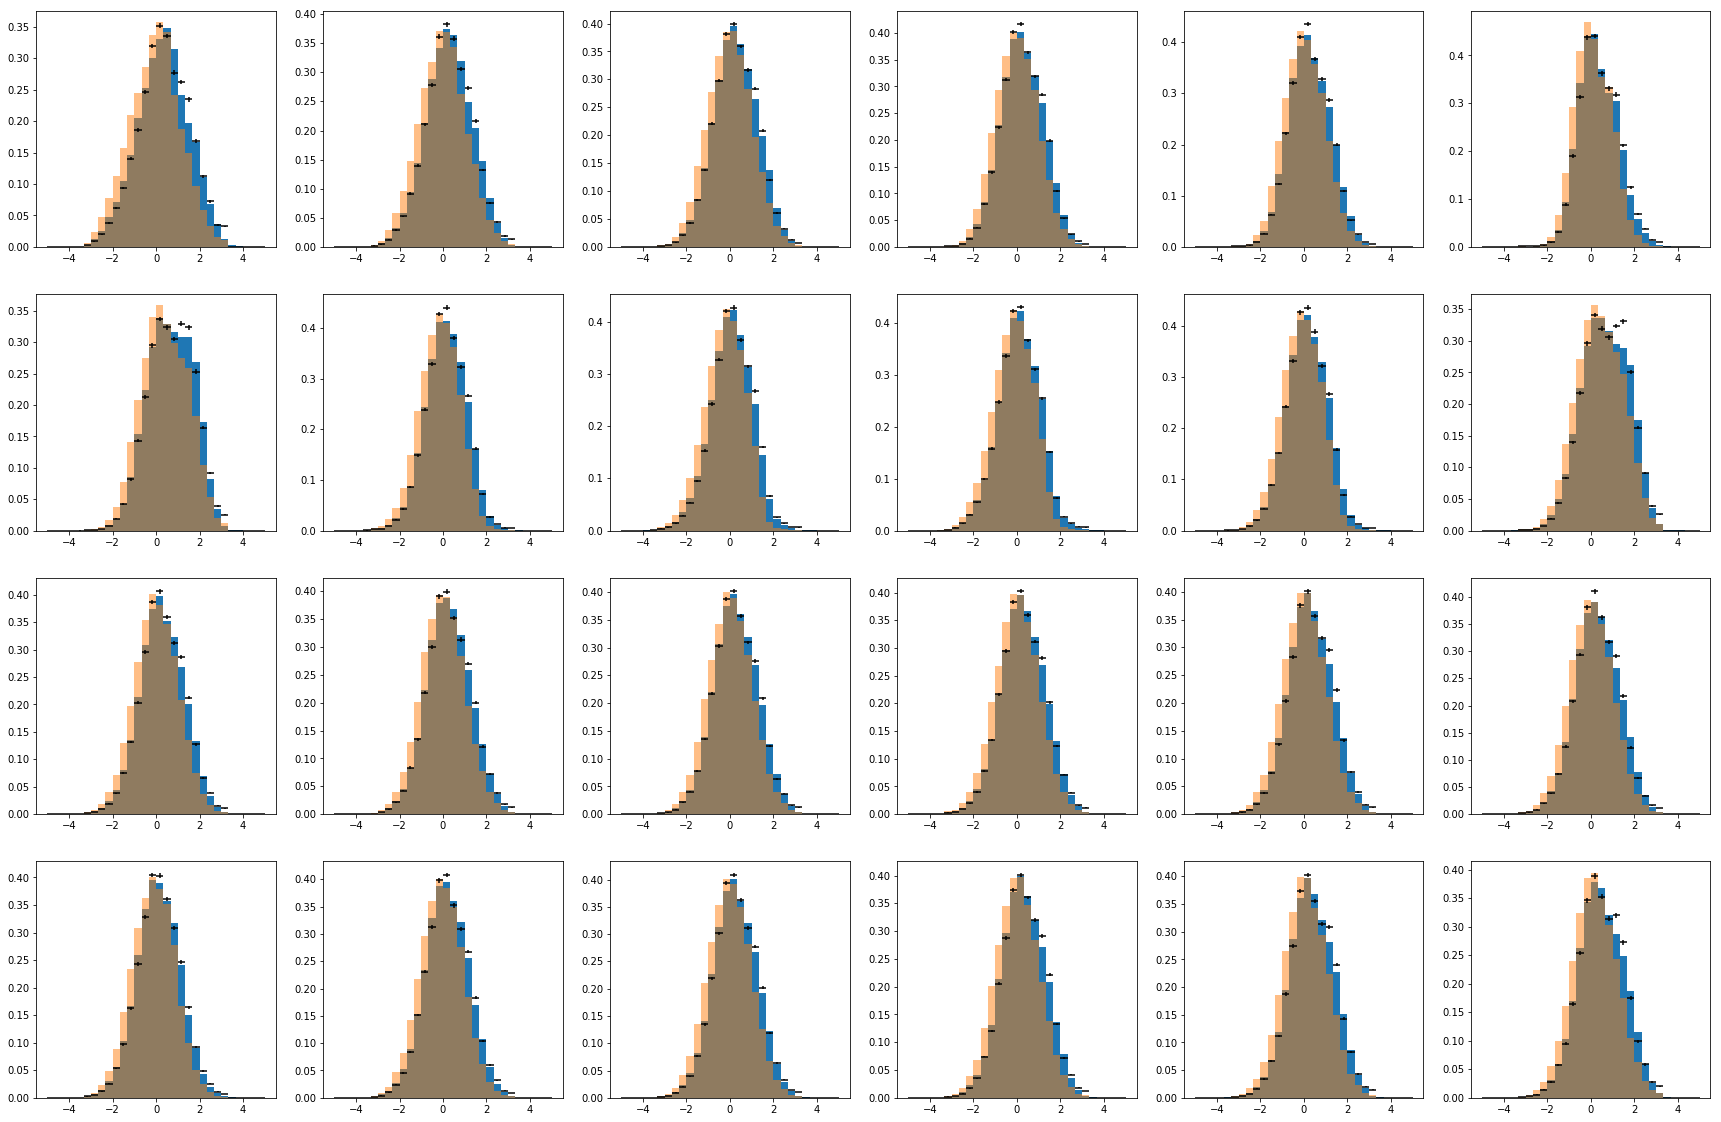

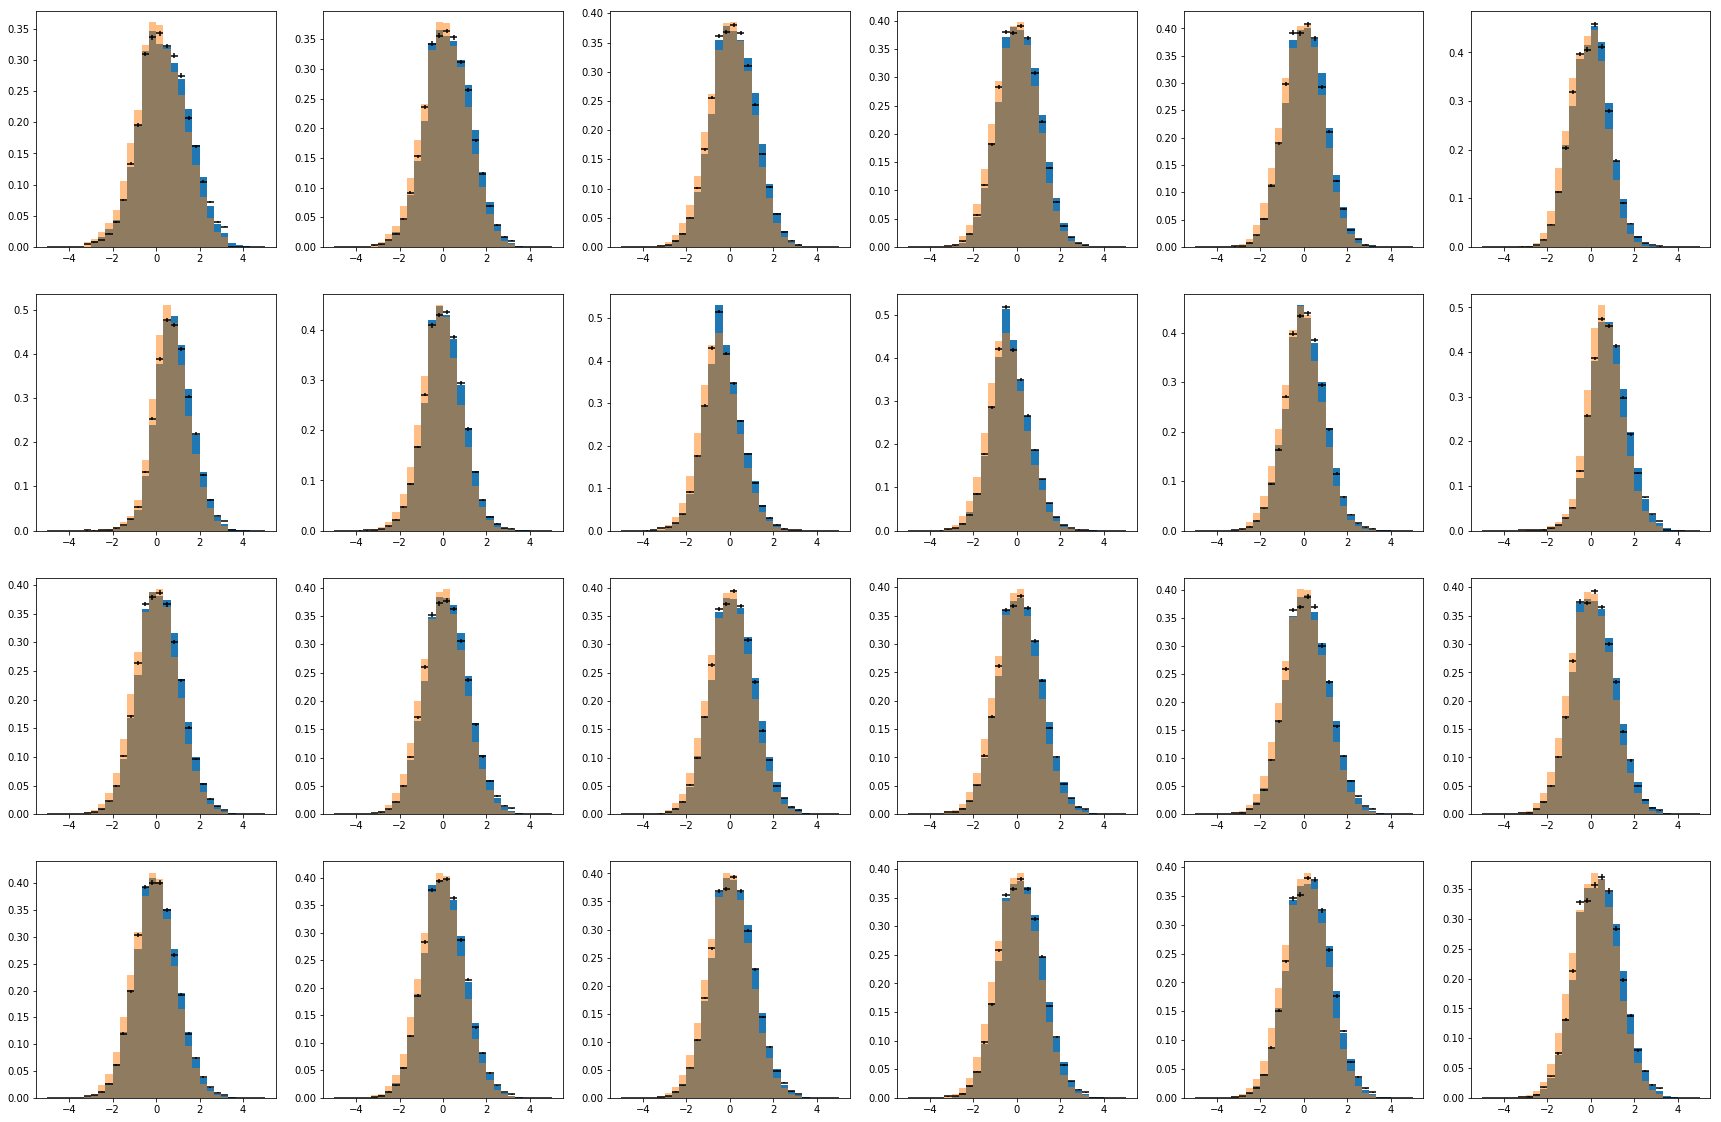

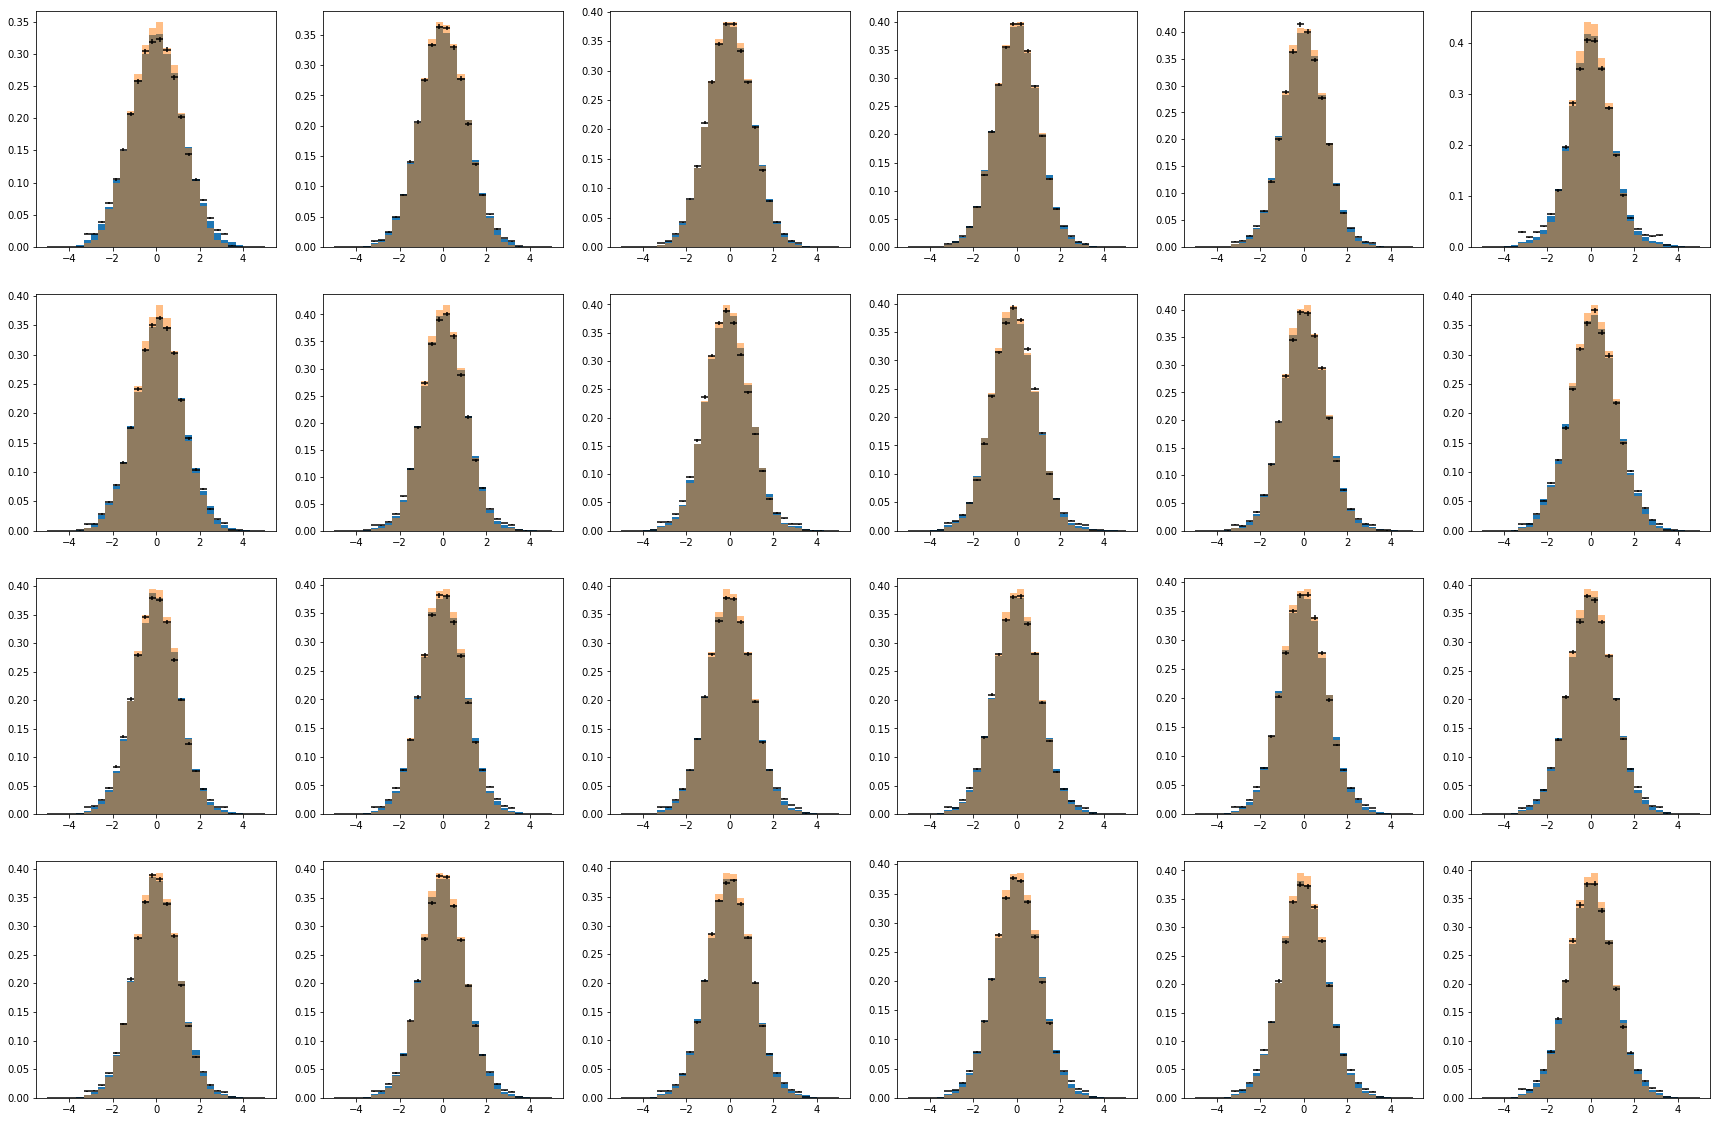

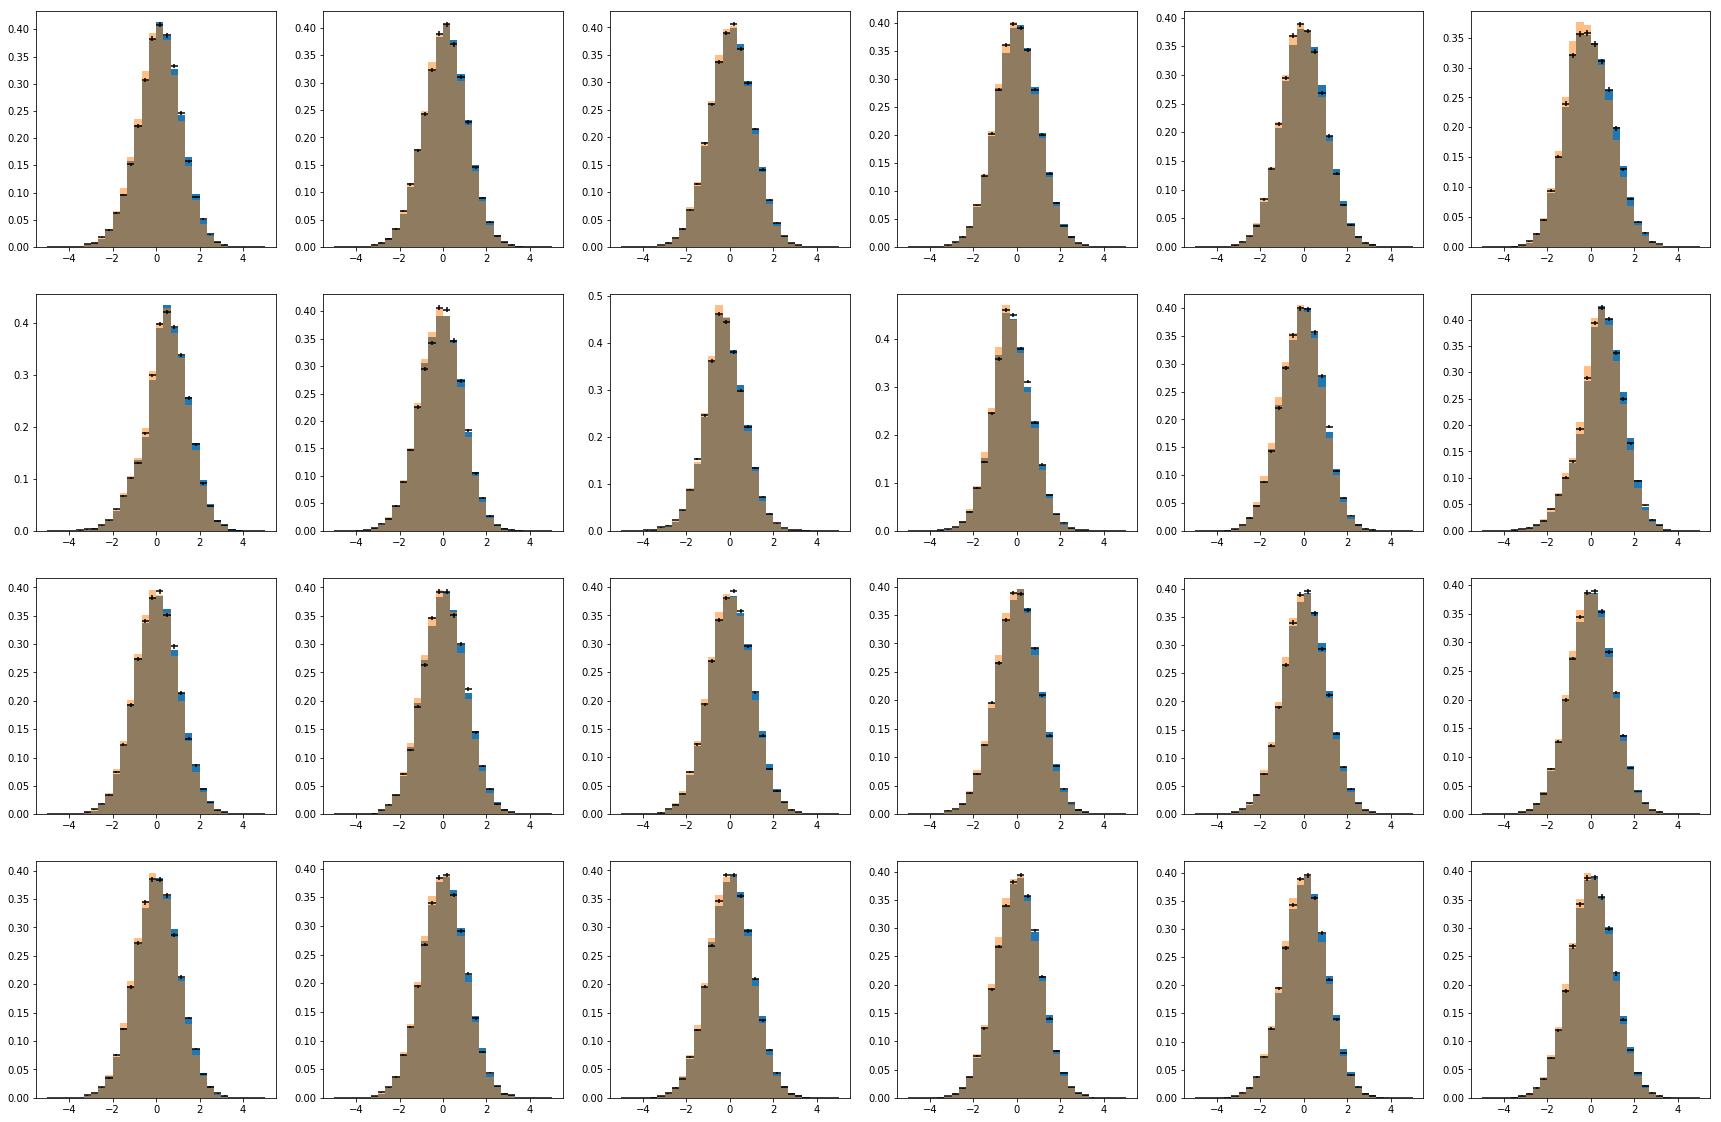

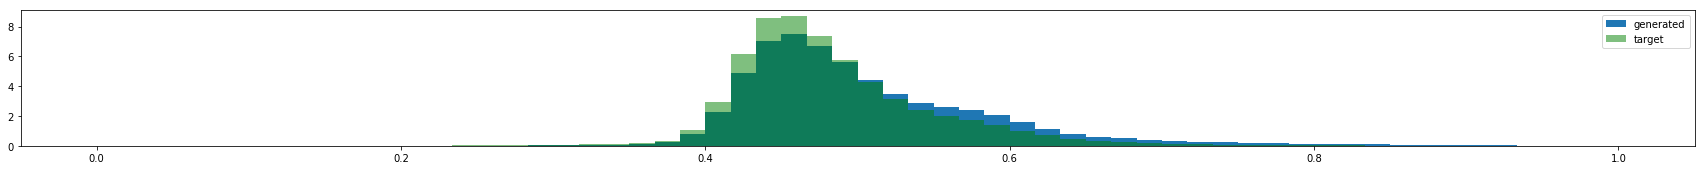

0: D: [0.685290 0.543213] A: [0.742406 0.505615]


In [27]:
do = dict(
    x_train=data_x_train,
    z_train=mc_x_train,
    c_x_train=data_c_train,
    c_z_train=mc_c_train,
          
    x_test=data_x_test,
    z_test=mc_x_test,
    c_x_test=data_c_test,
    c_z_test=mc_c_test,
    
    n_disc_steps=1,n_gen_steps=1,
    n_epochs=10,solution=None,plot_every=5,batch_size=4096)

gan.fit(**do)

# do.update(dict(n_disc_steps=2))
# gan.fit(**do)

# do.update(dict(n_disc_steps=3))
# gan.fit(**do)

# do.update(dict(n_disc_steps=5))
# gan.fit(**do)

In [28]:
mc_x_morphed = gan.get_generator().predict([mc_c_test,mc_x_test])[1]

data_p = gan.get_discriminator().predict([data_c_test,data_x_test])
mc_p   = gan.get_discriminator().predict([mc_c_test,mc_x_morphed])

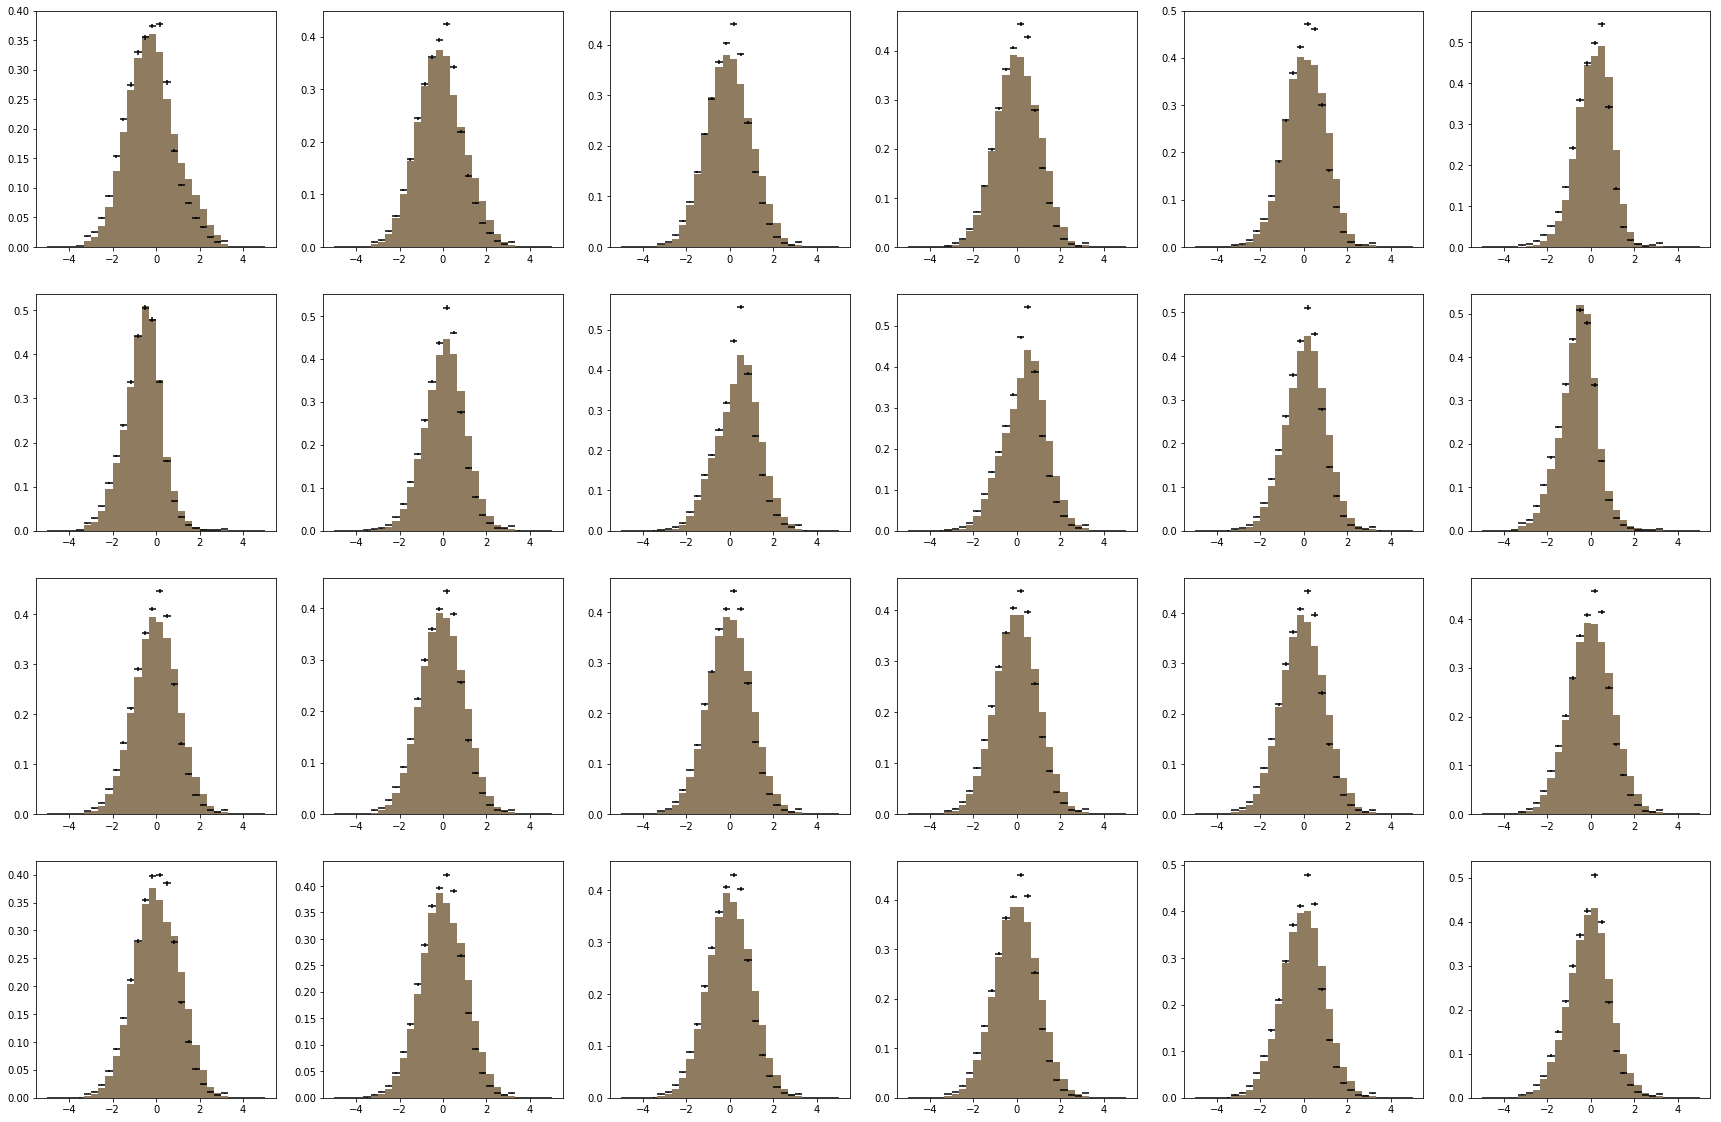

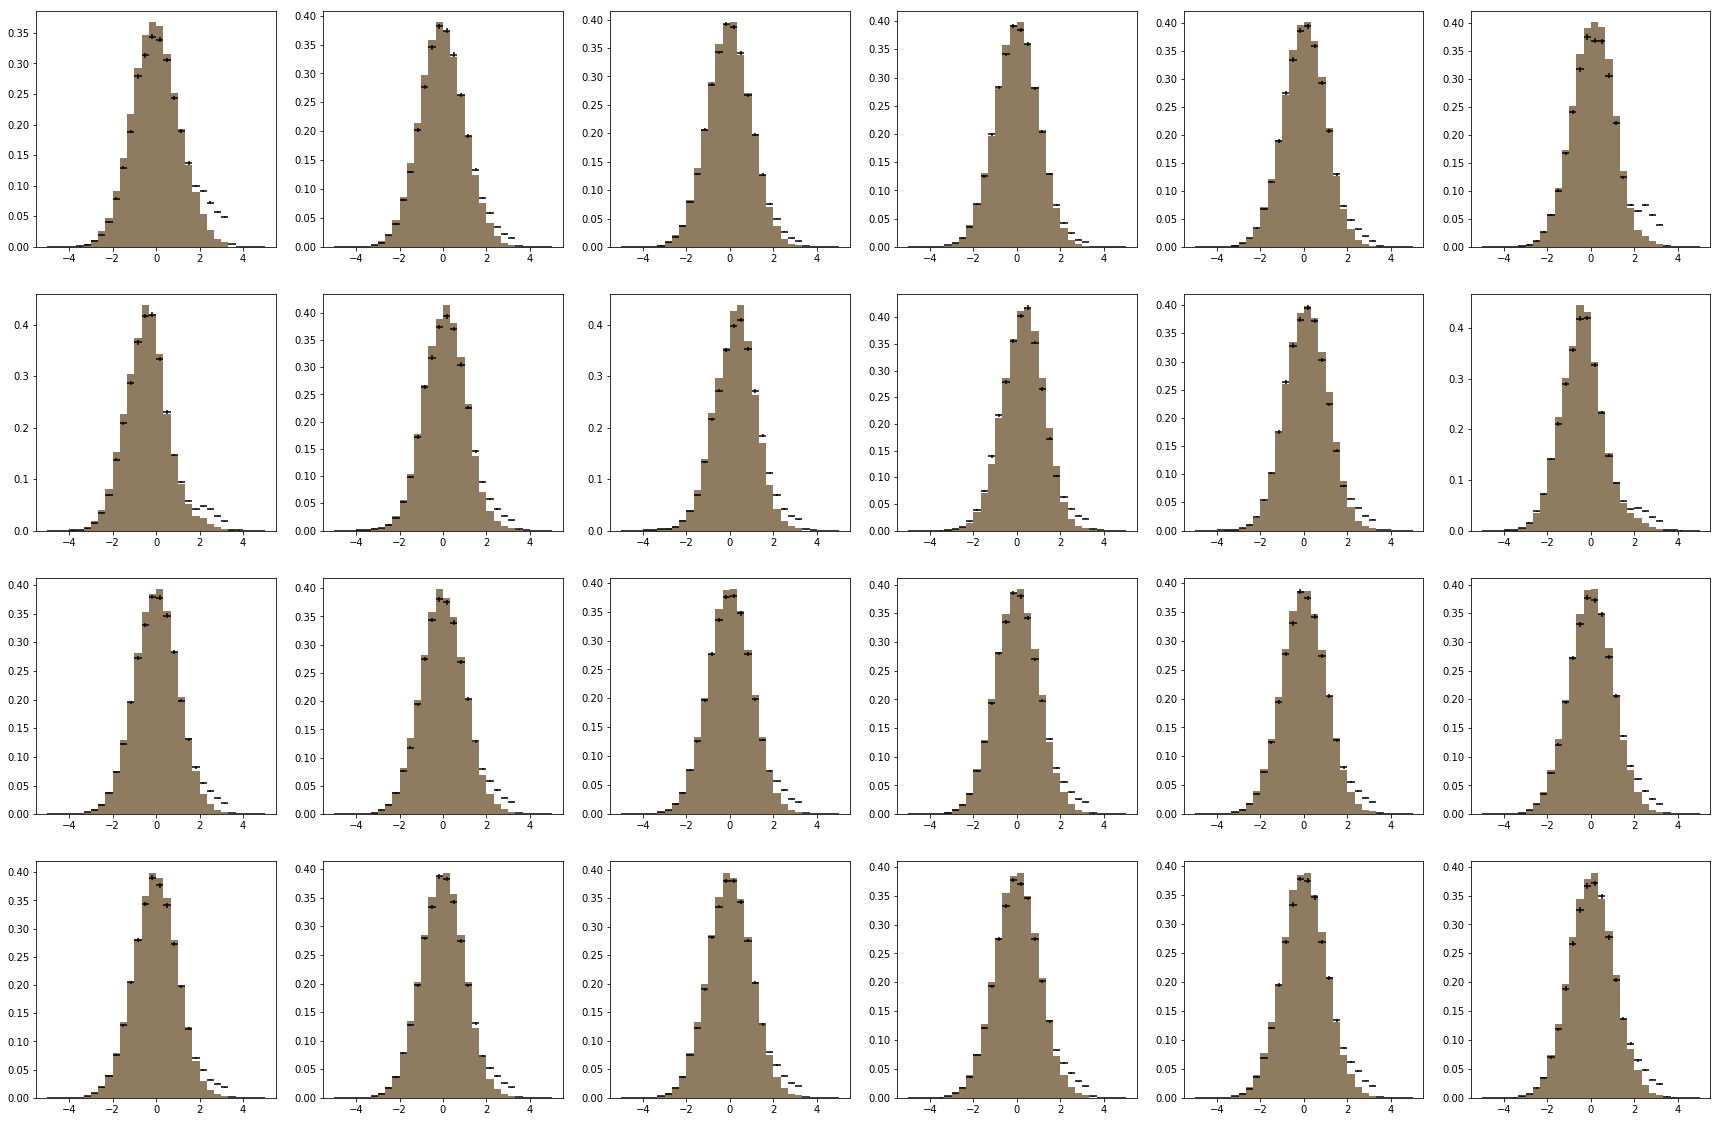

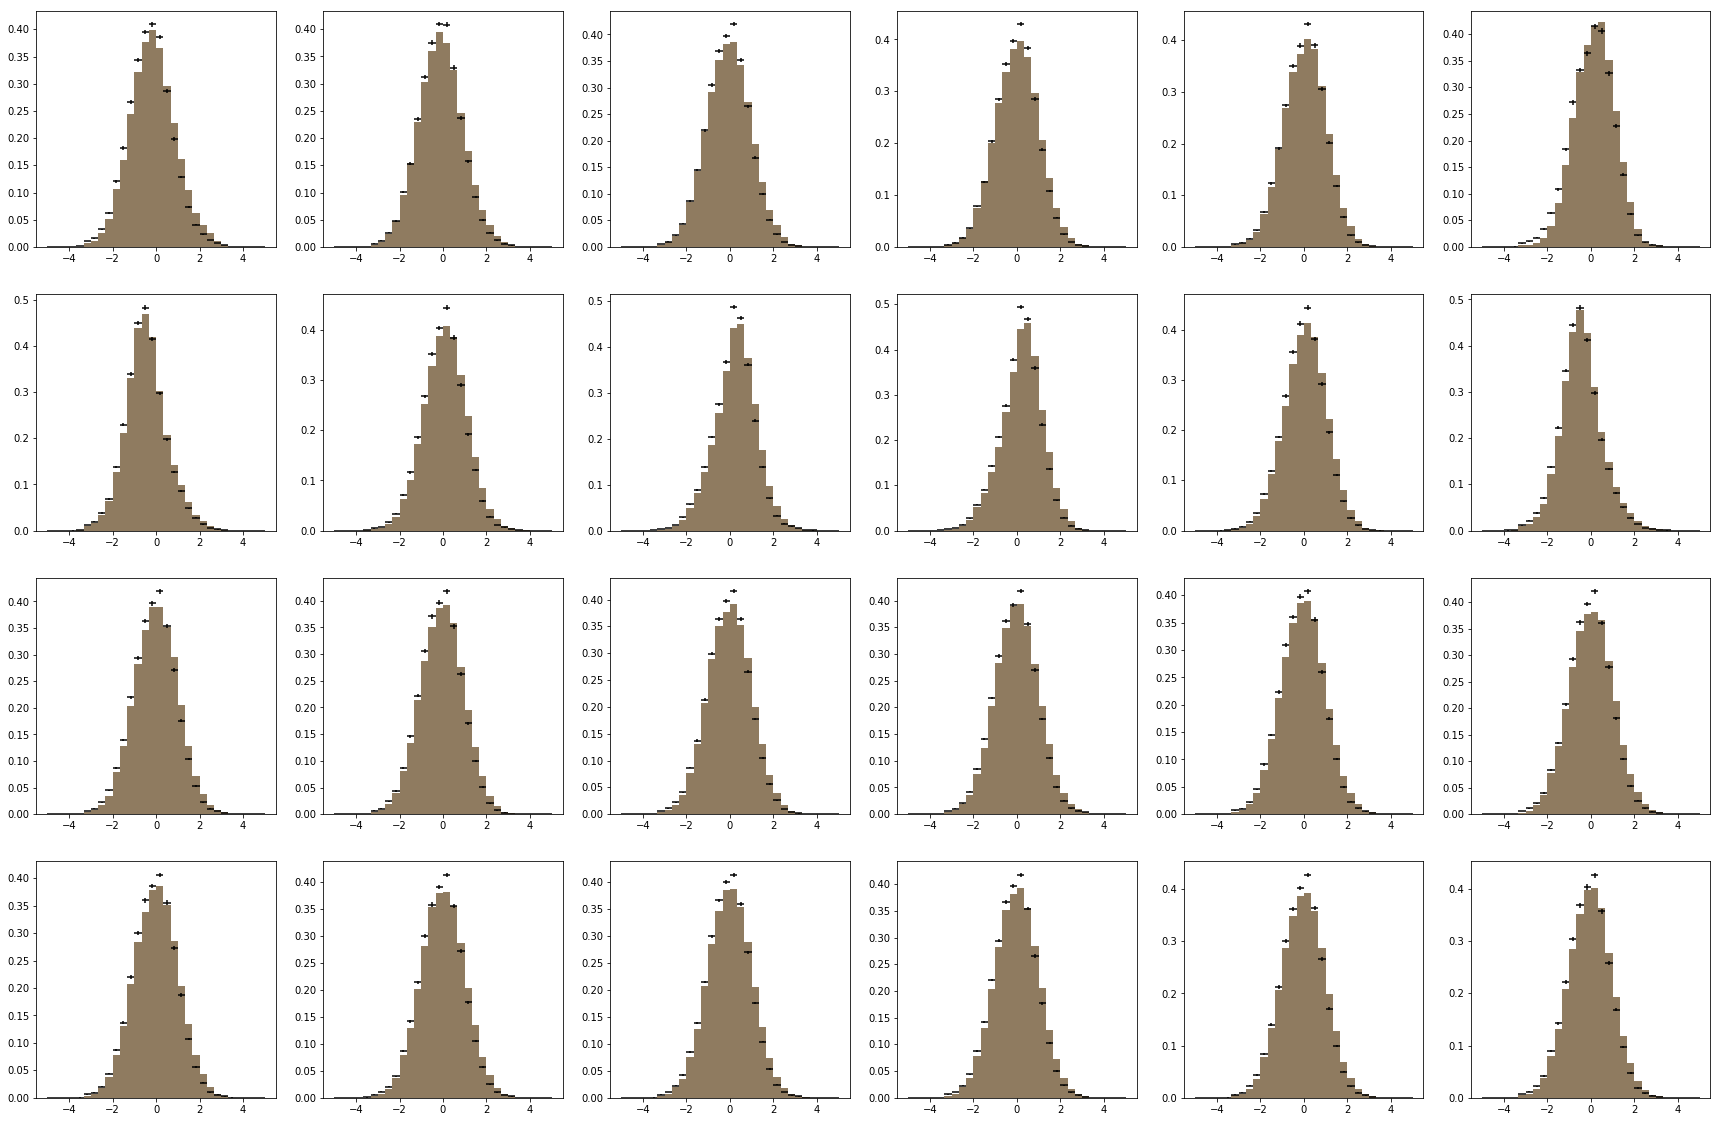

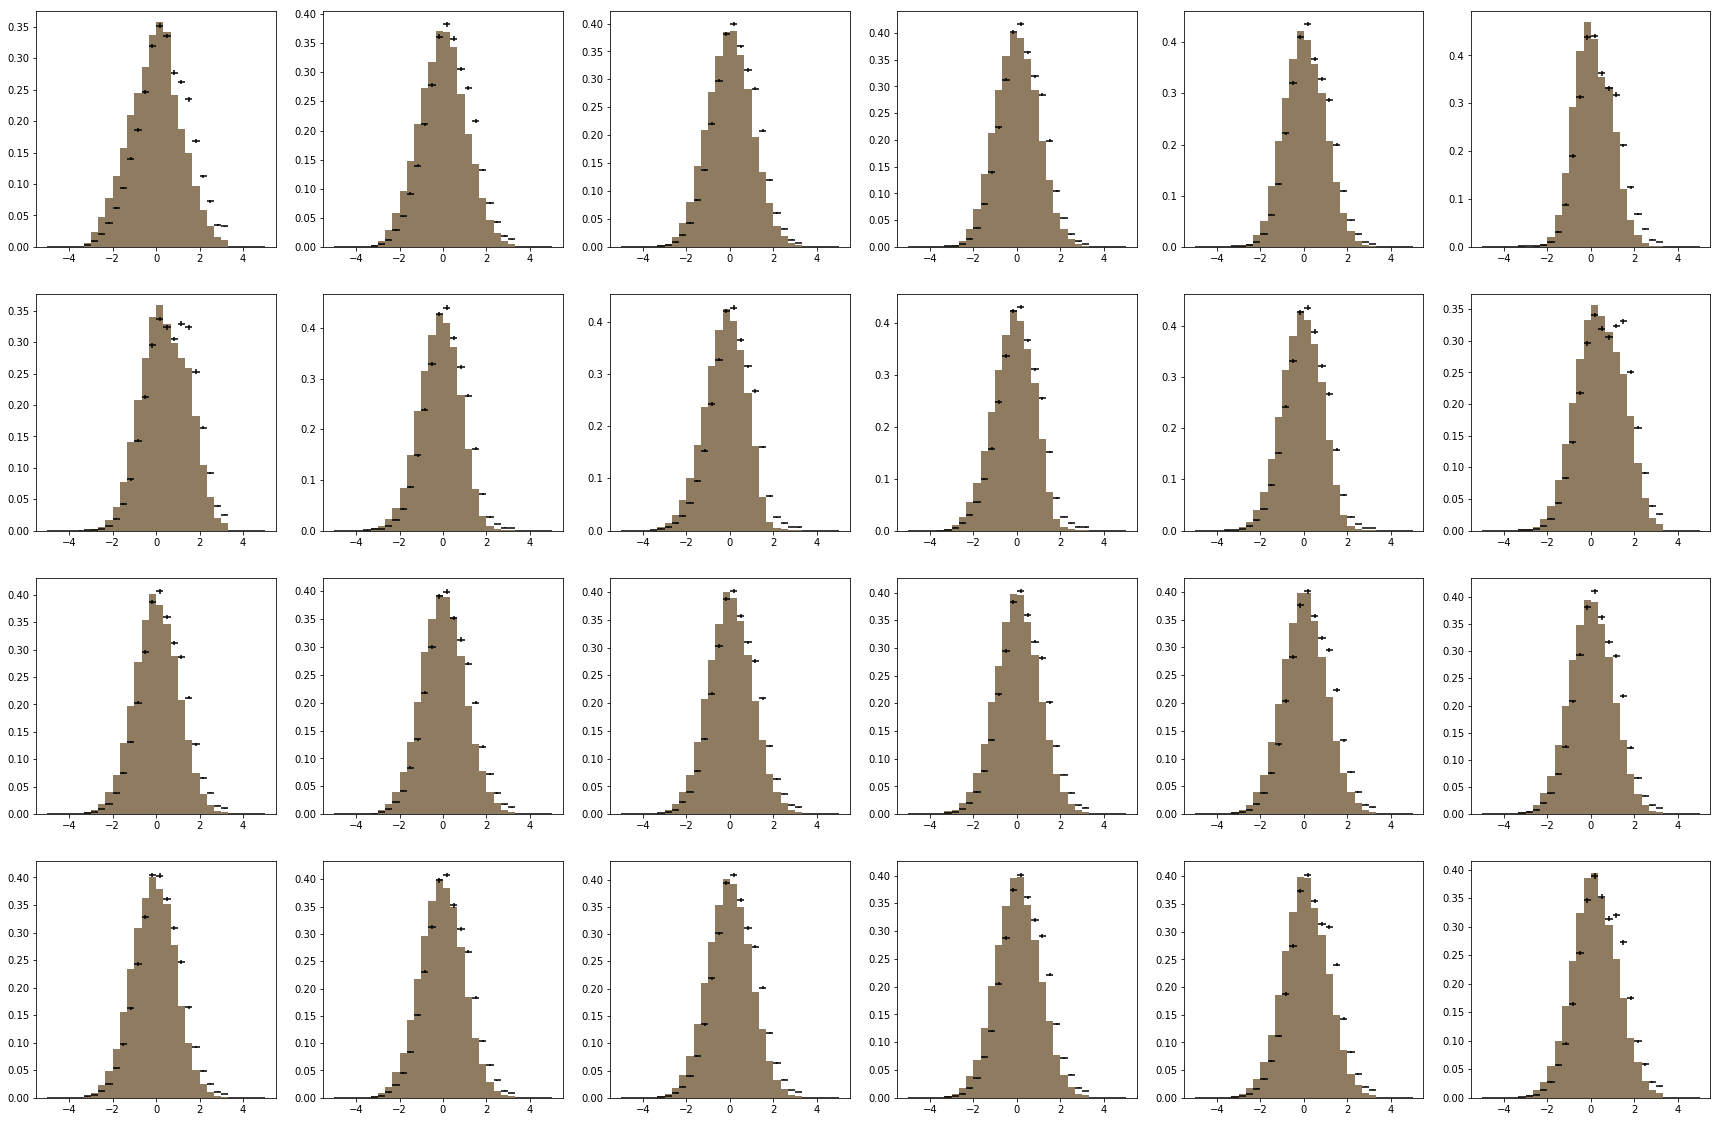

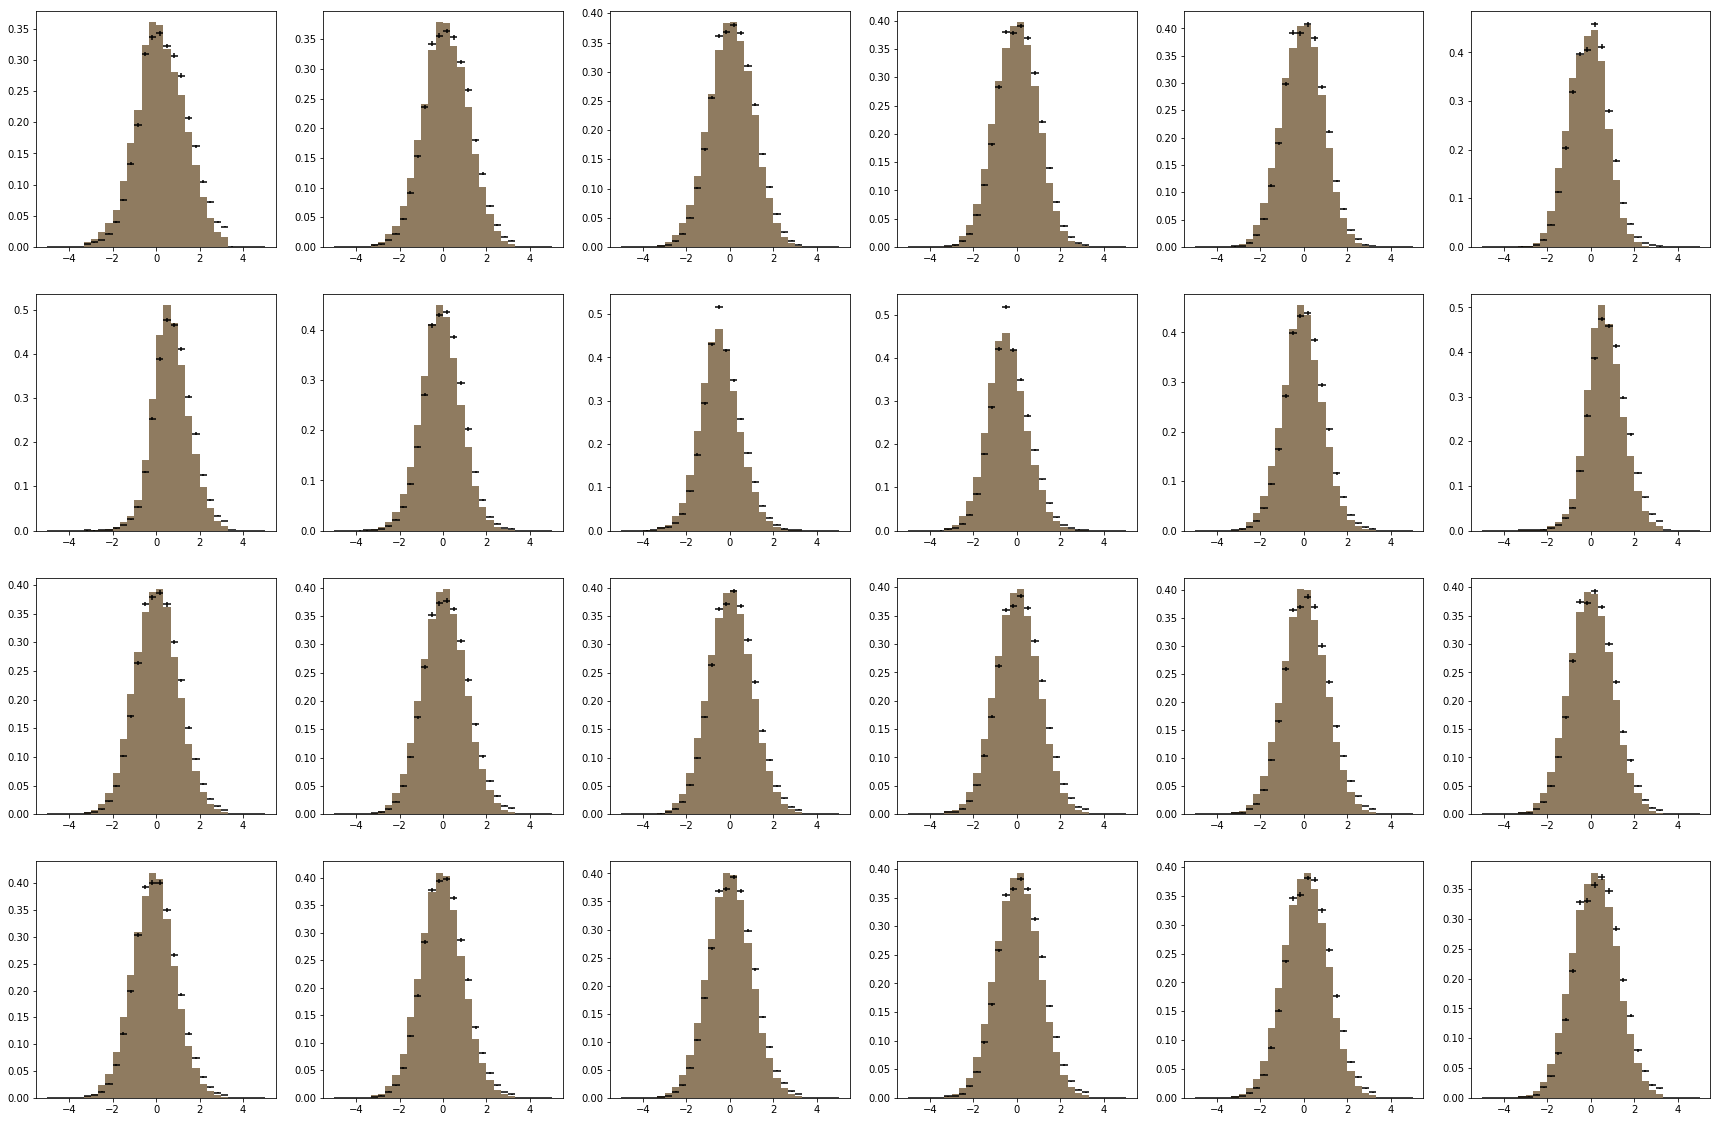

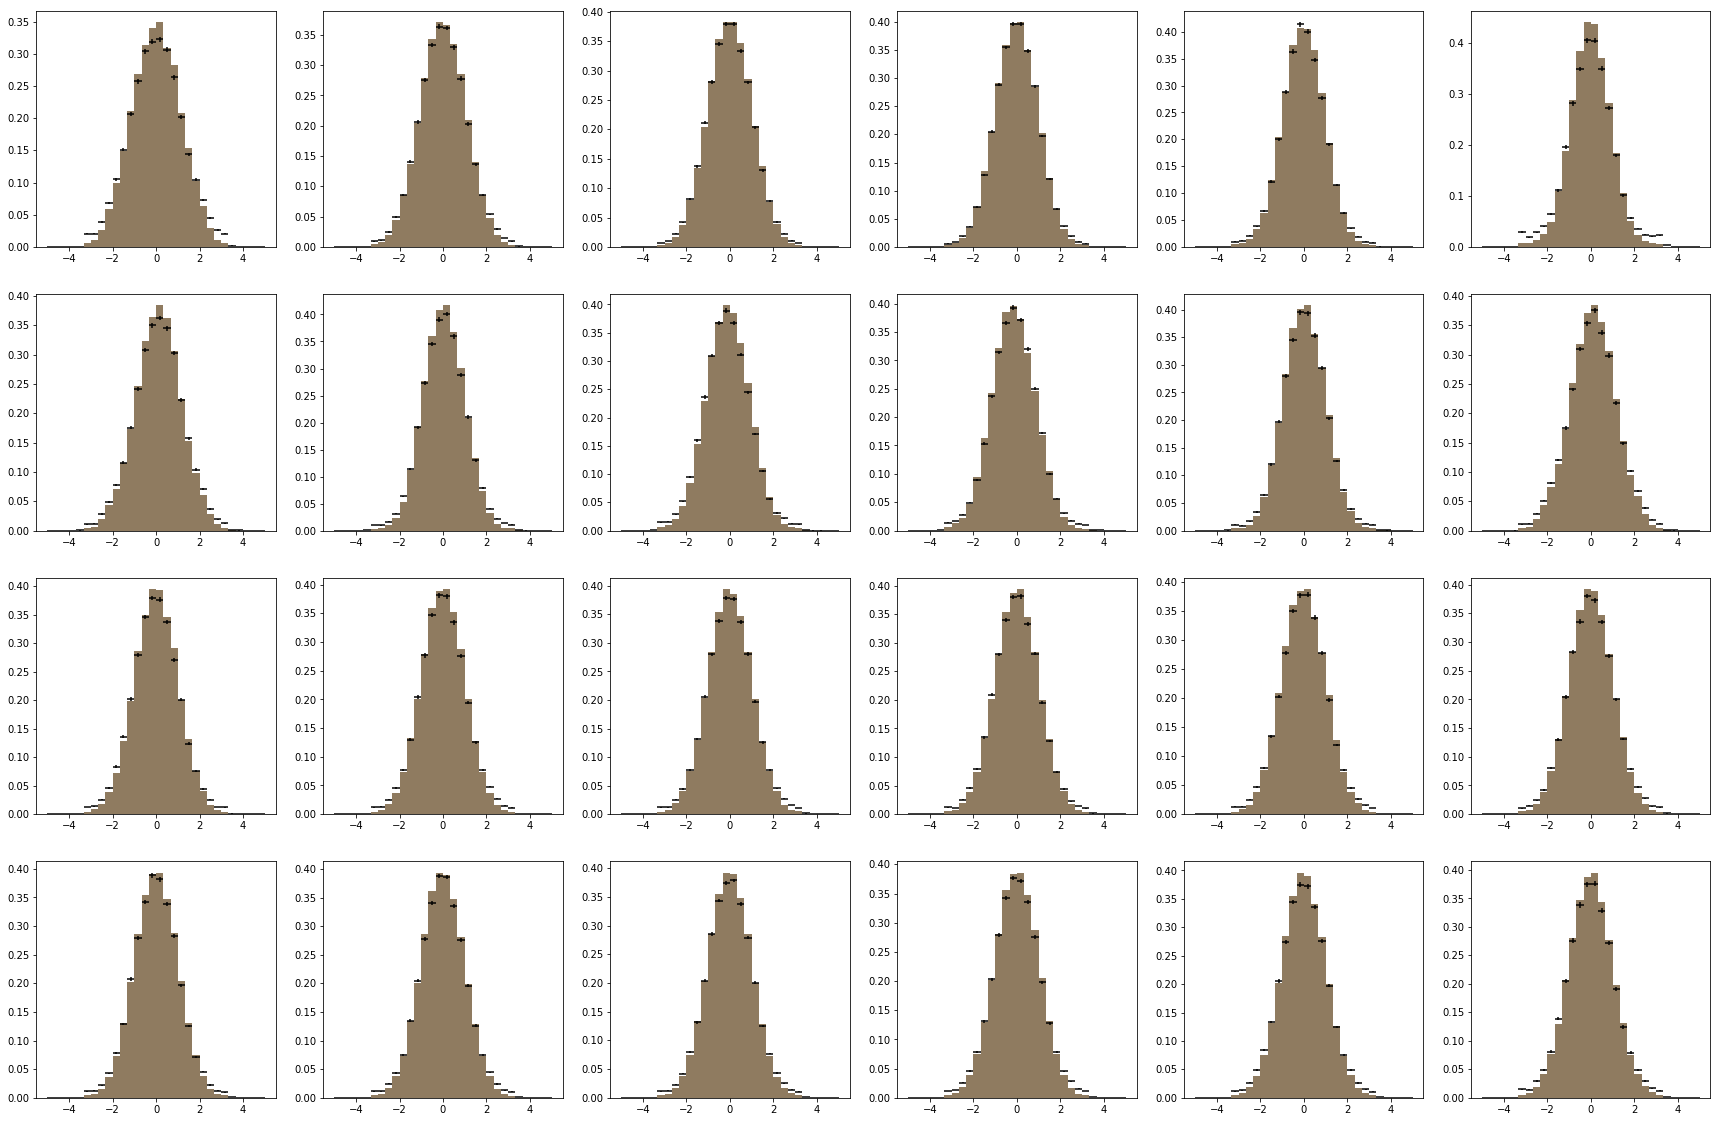

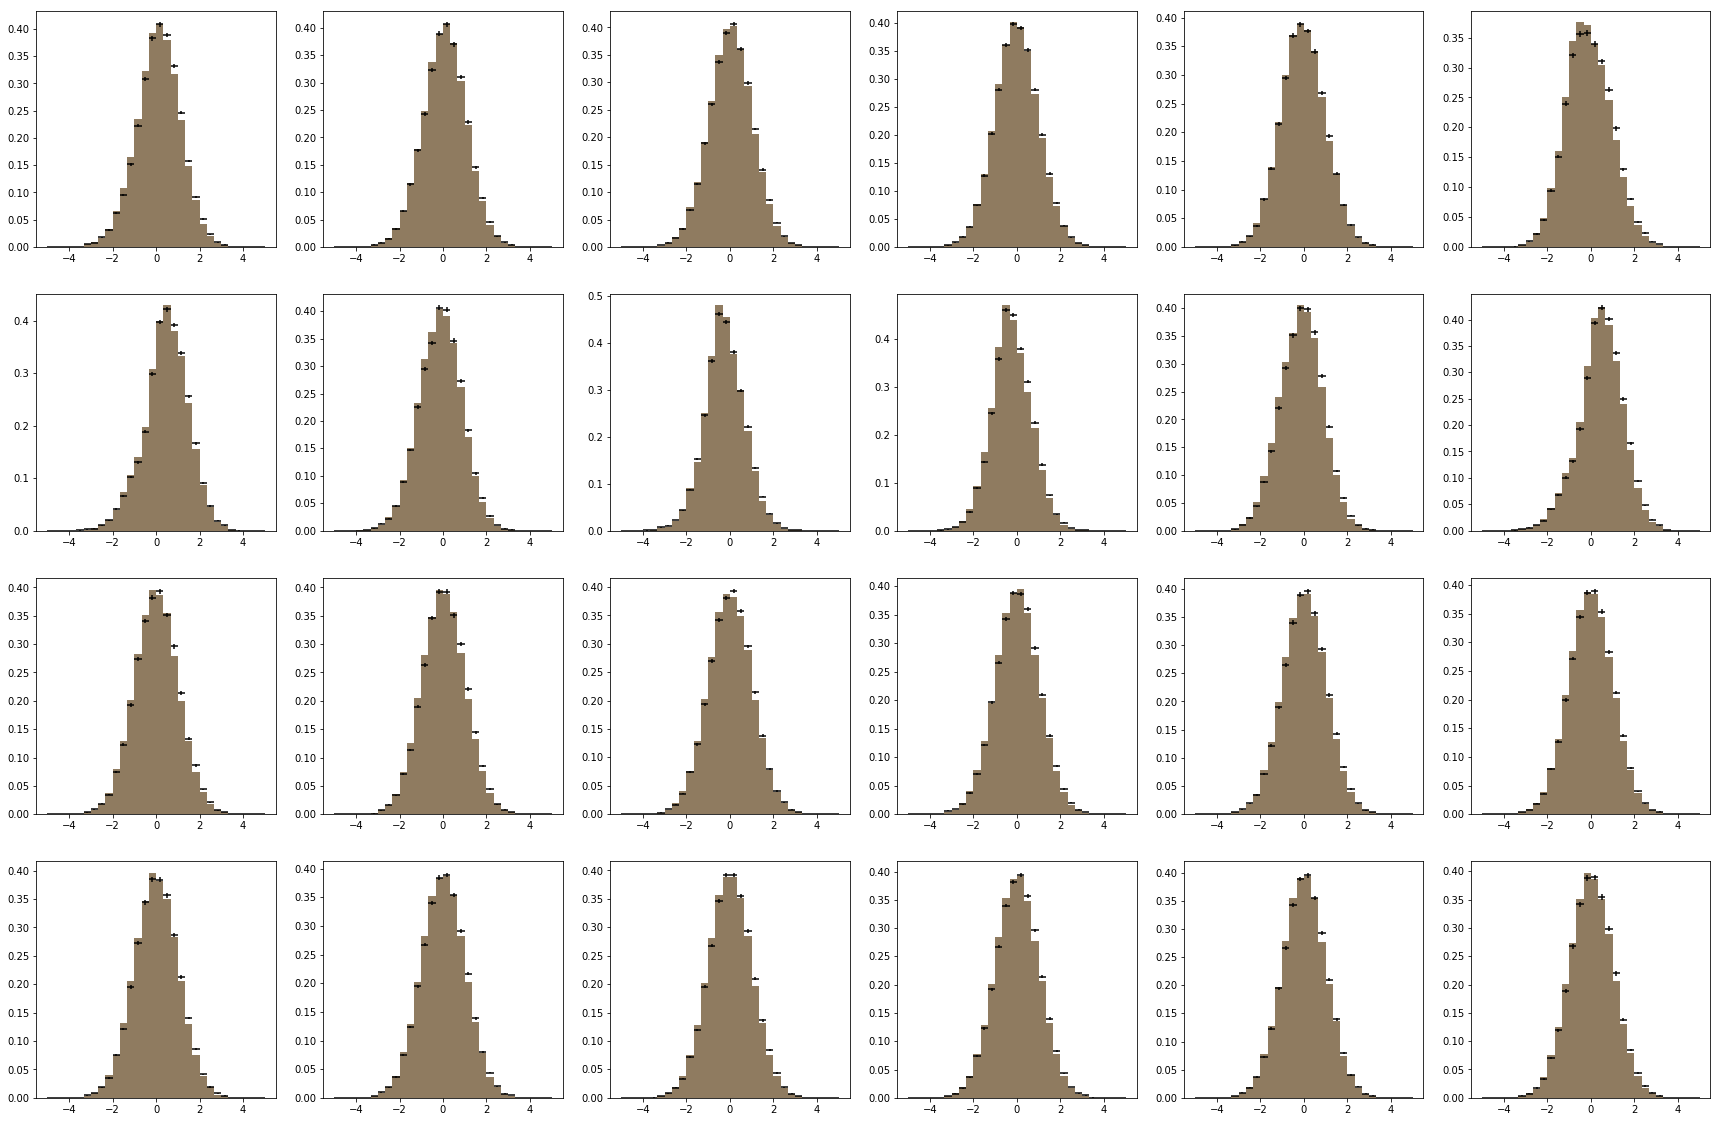

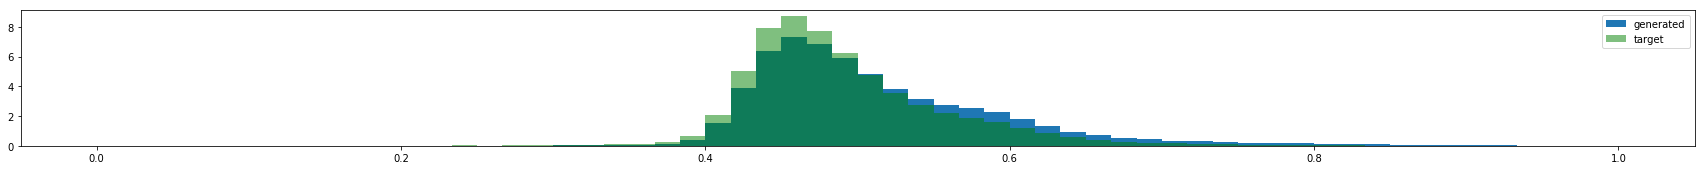

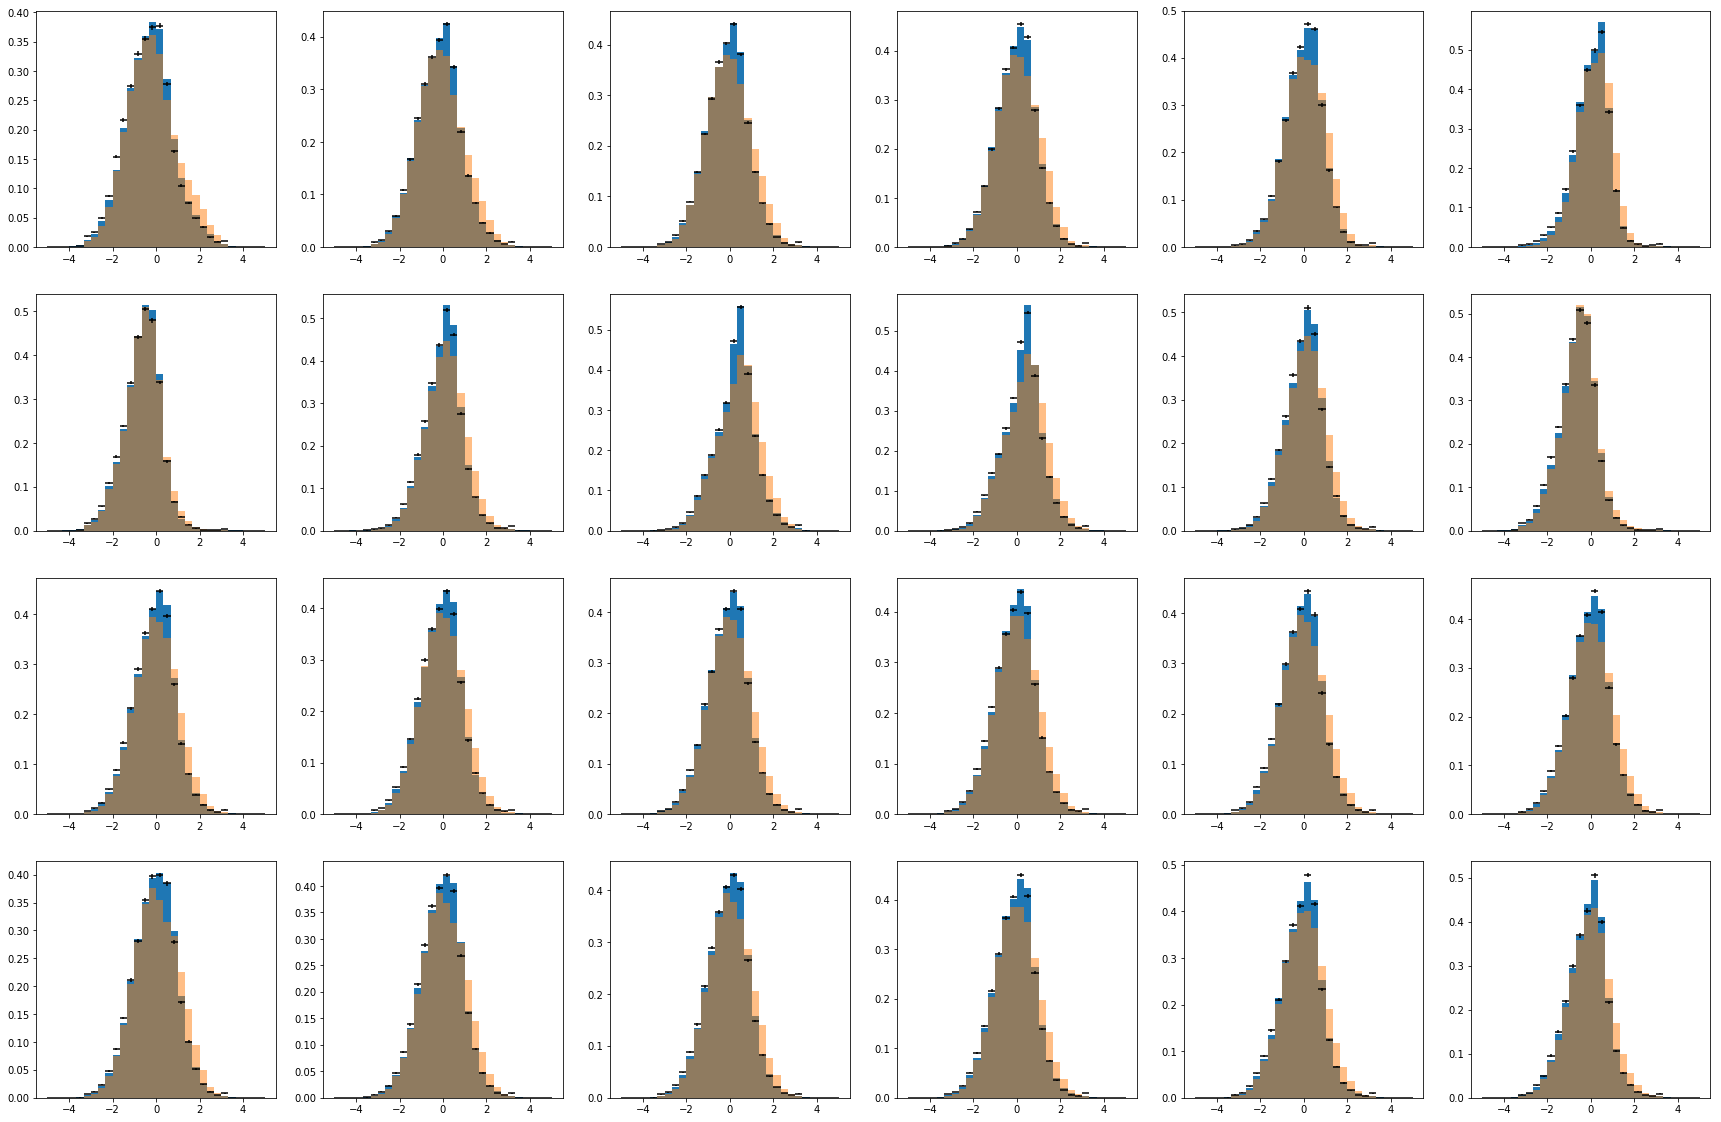

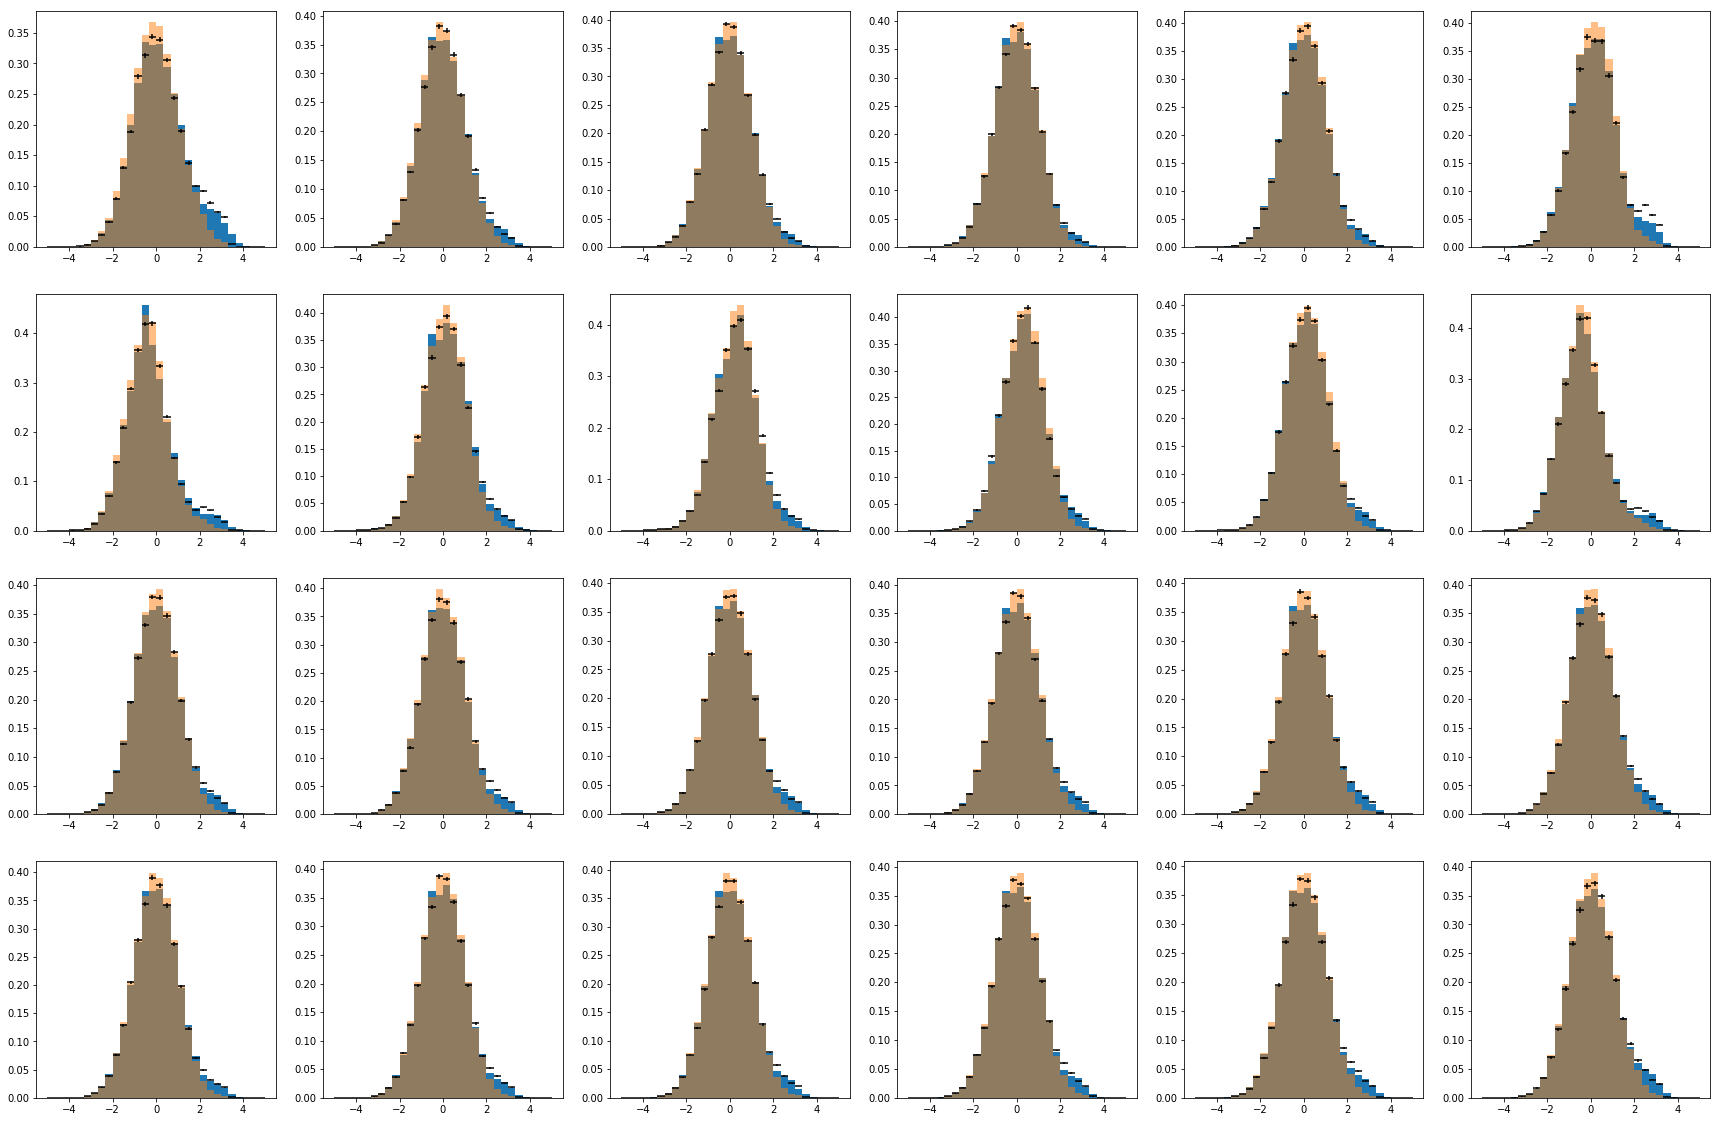

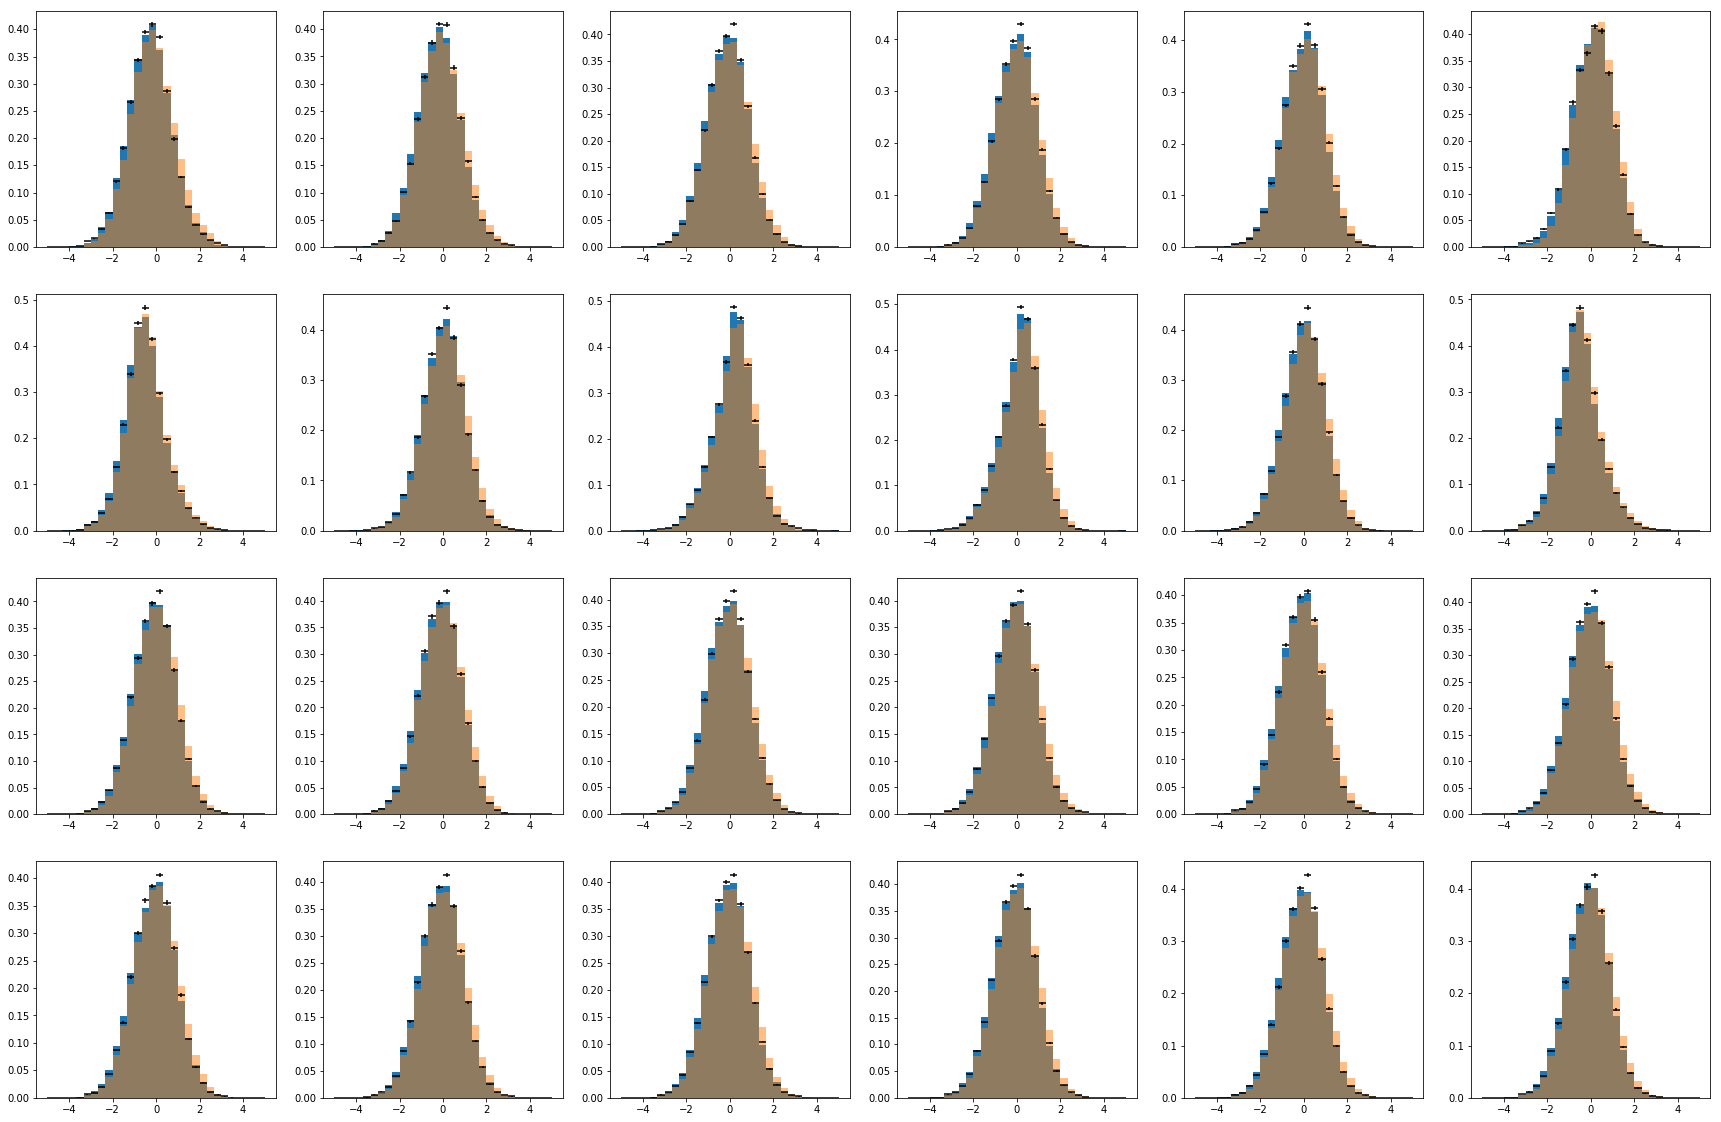

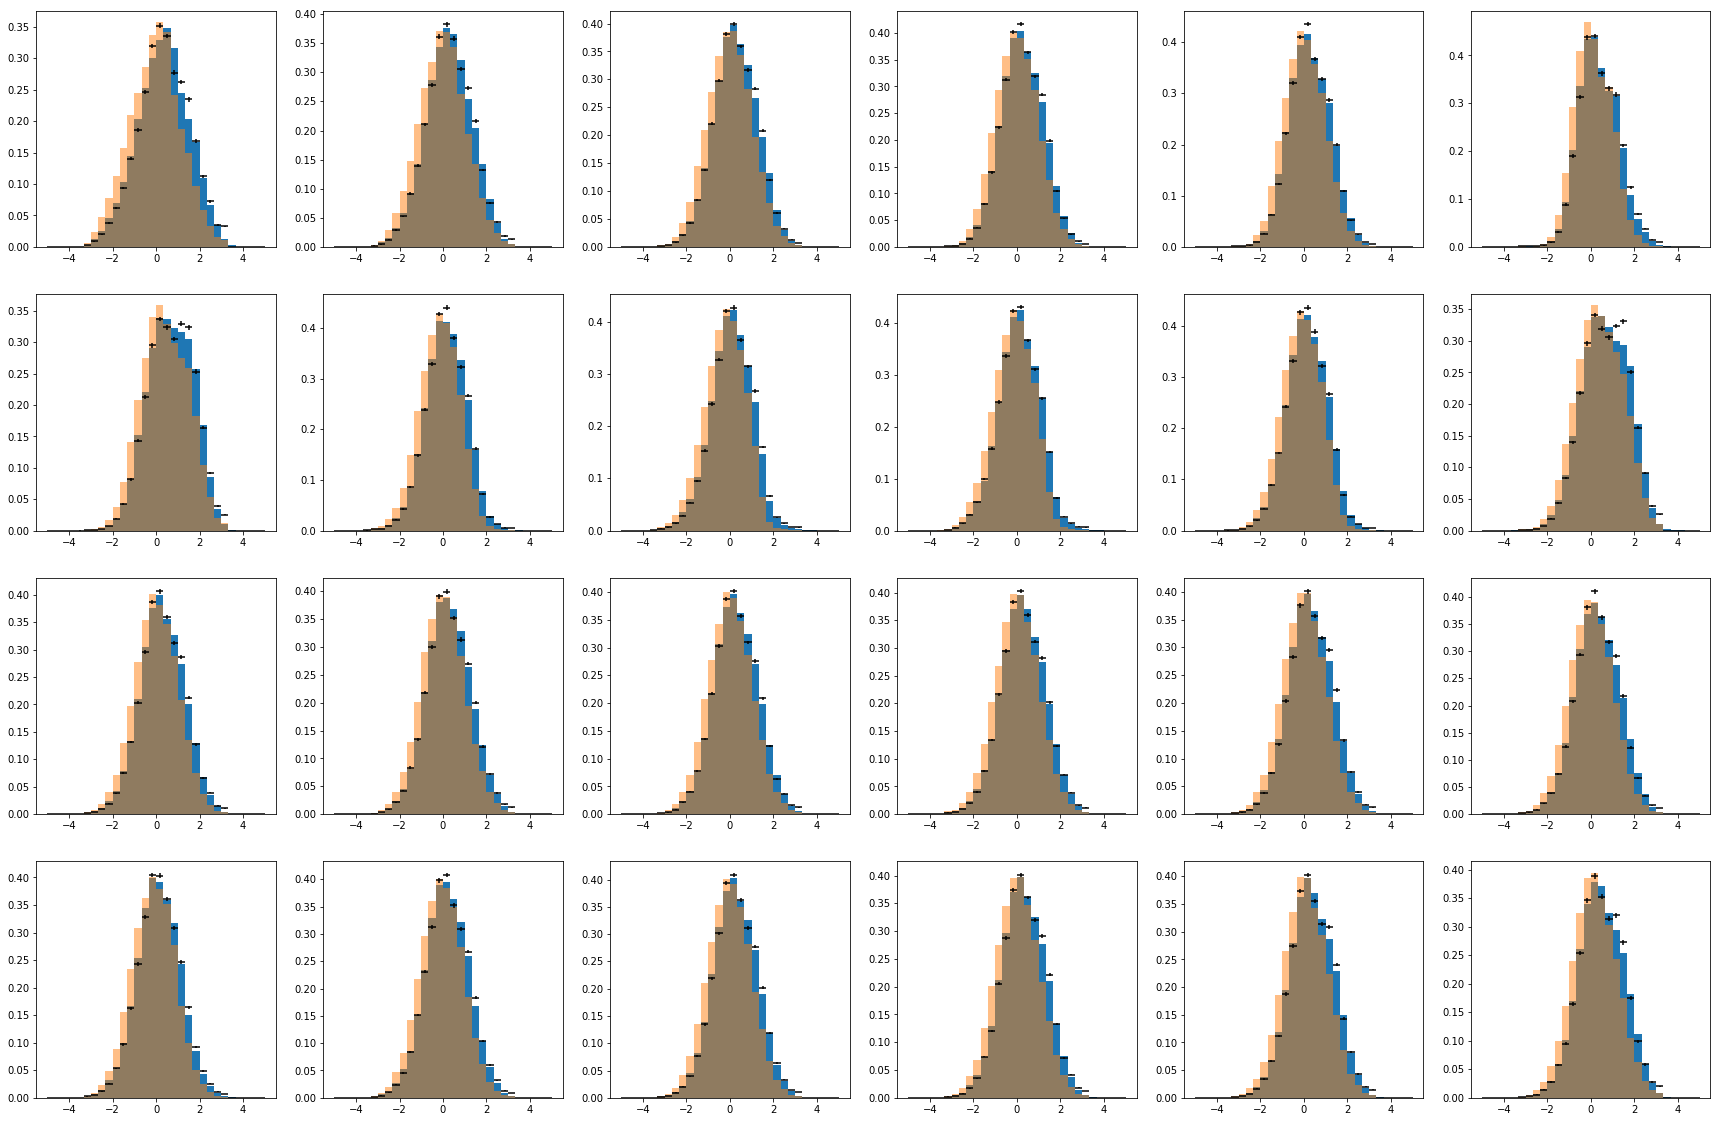

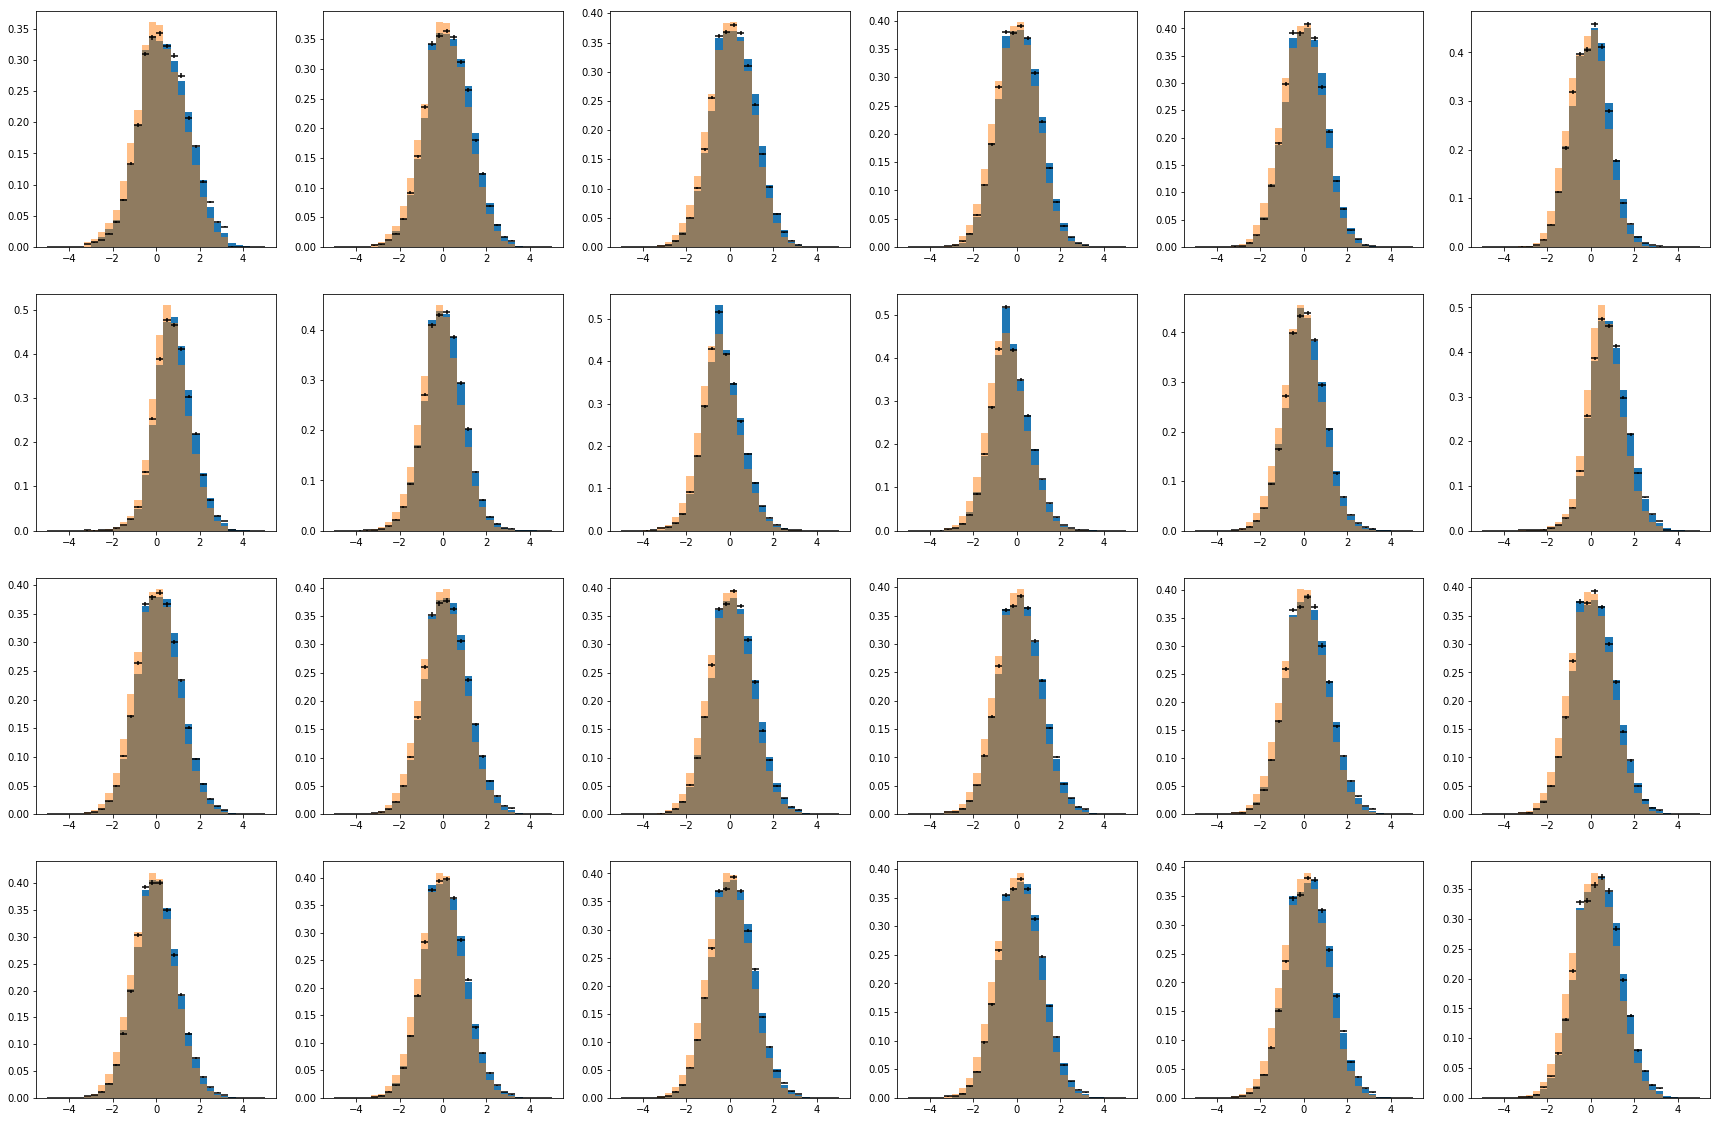

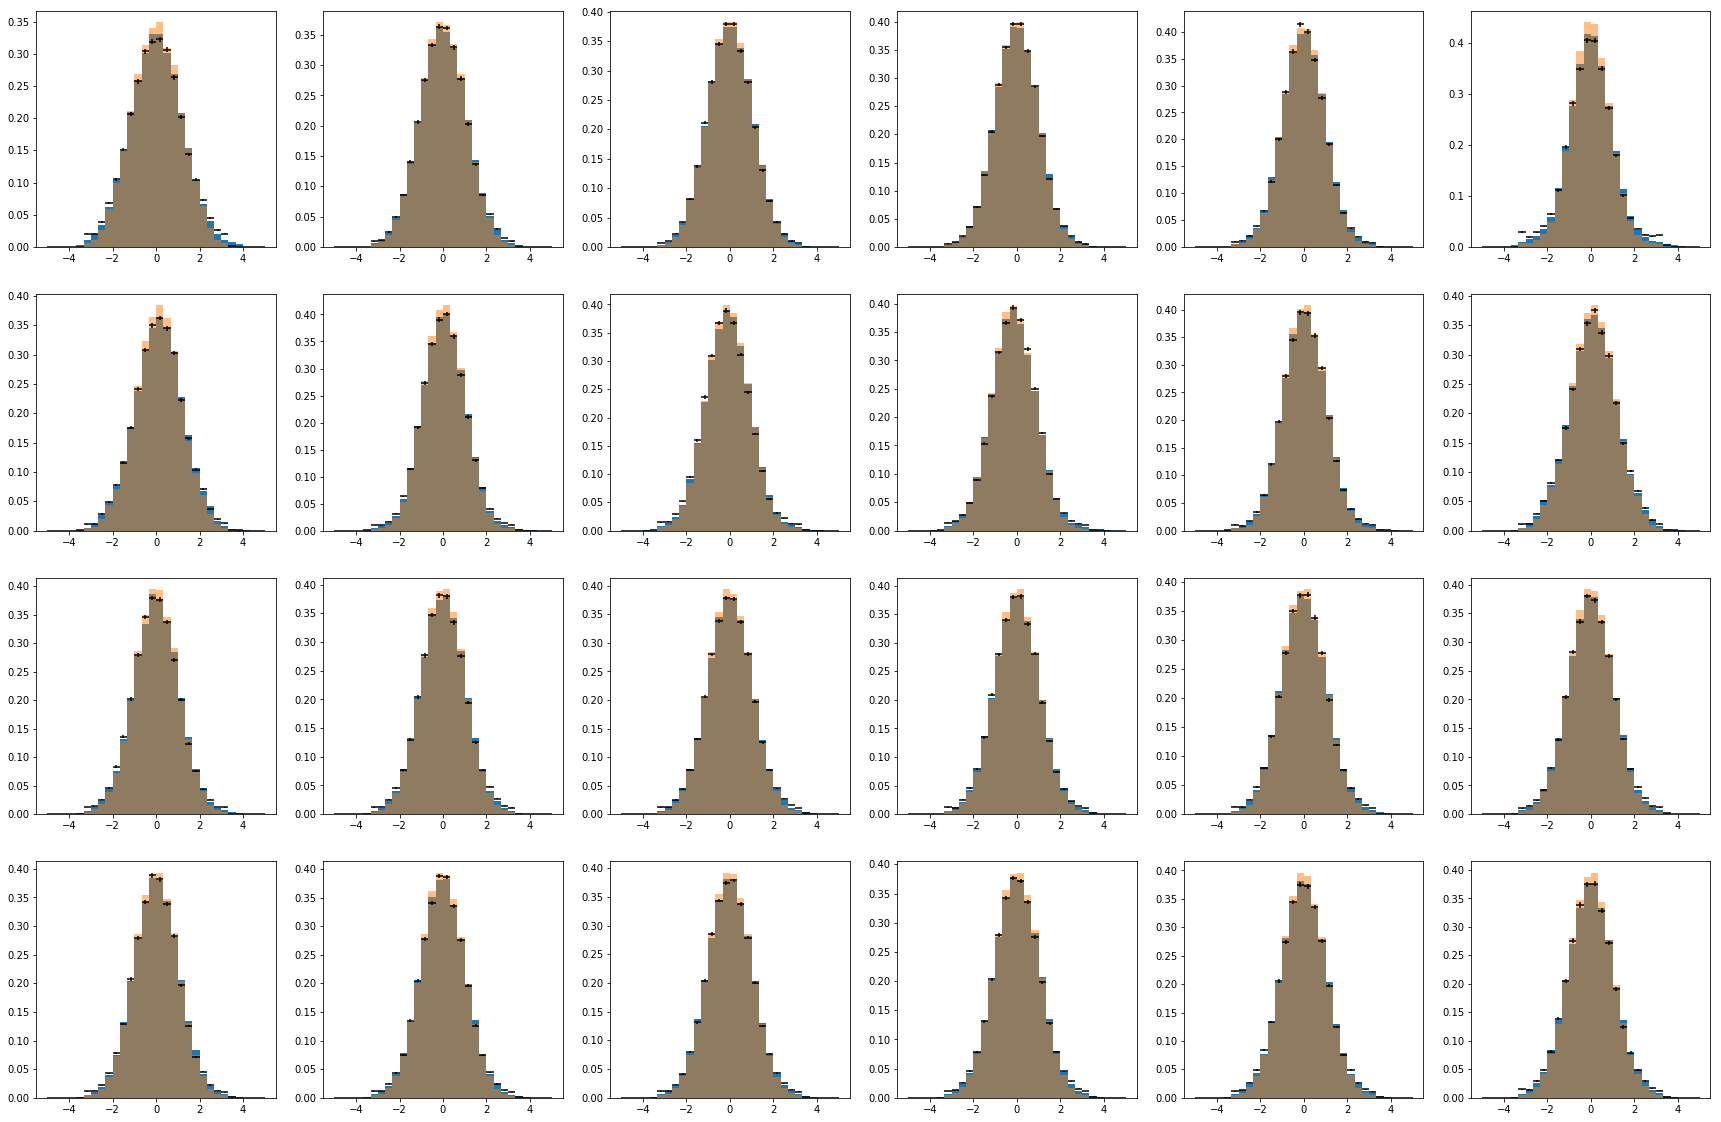

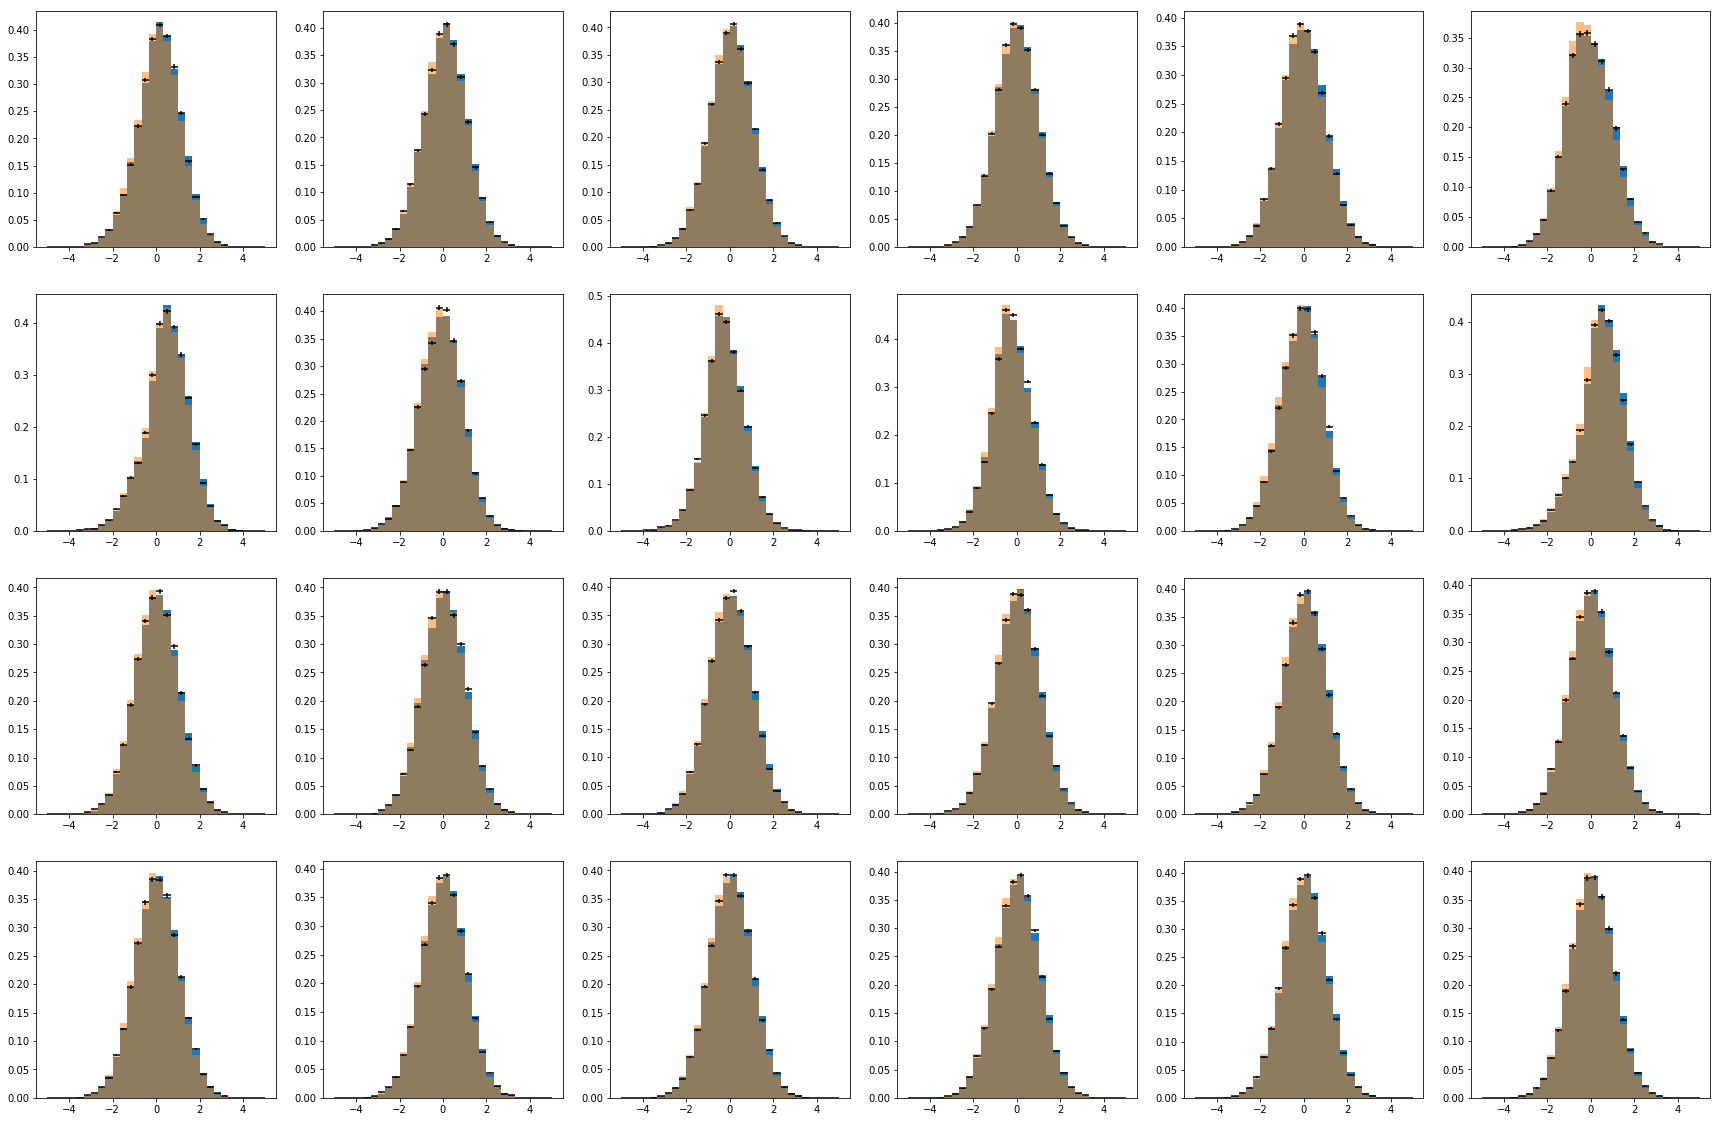

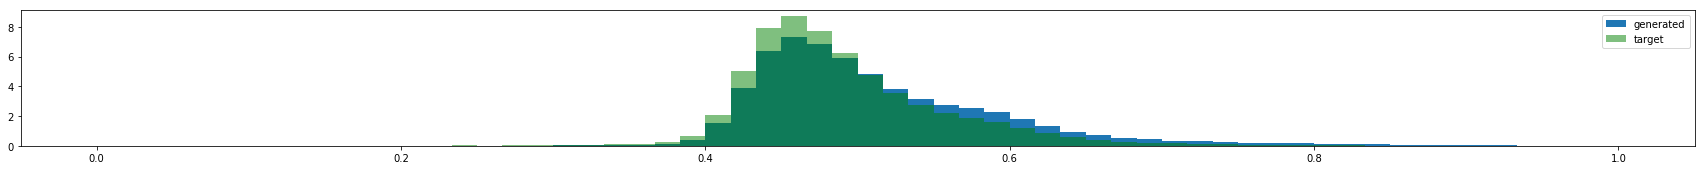

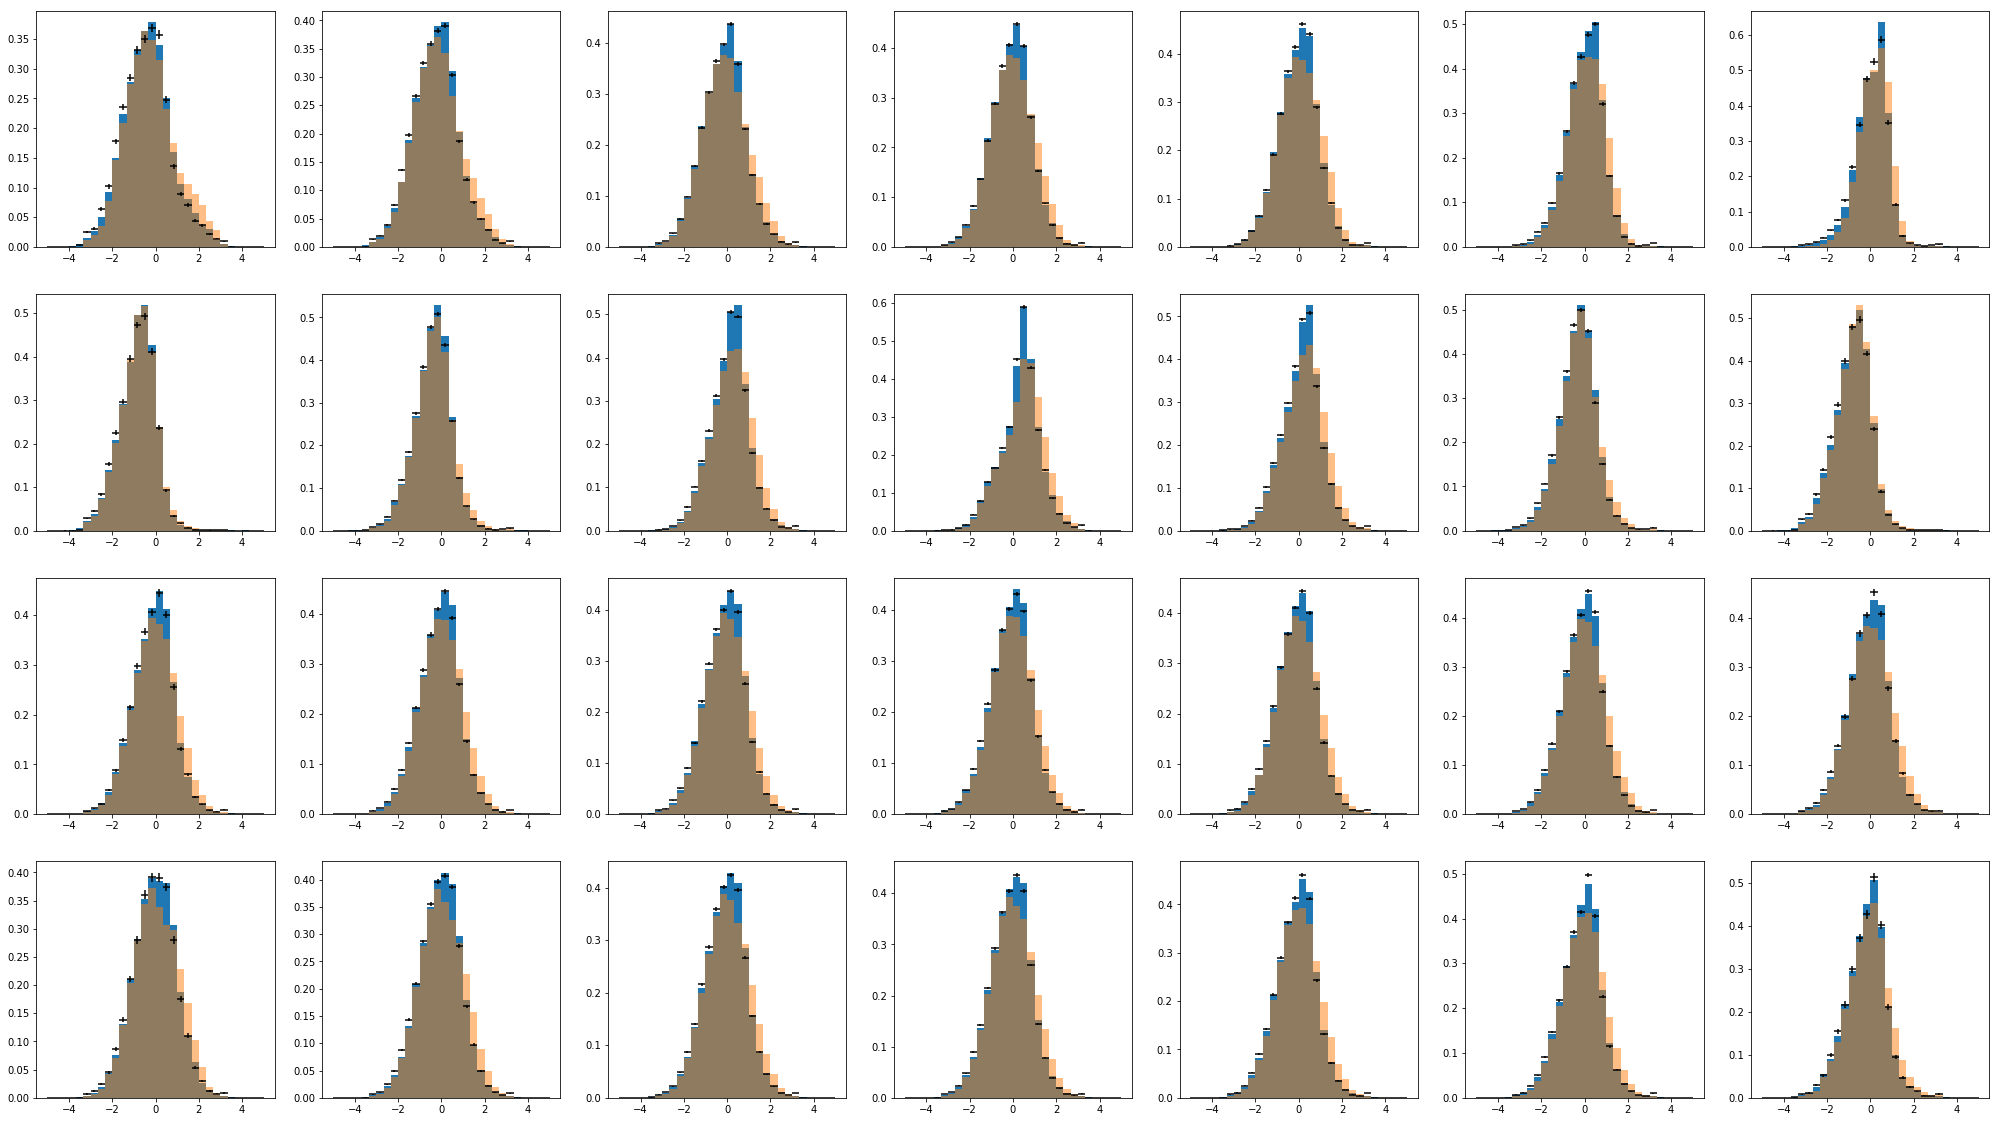

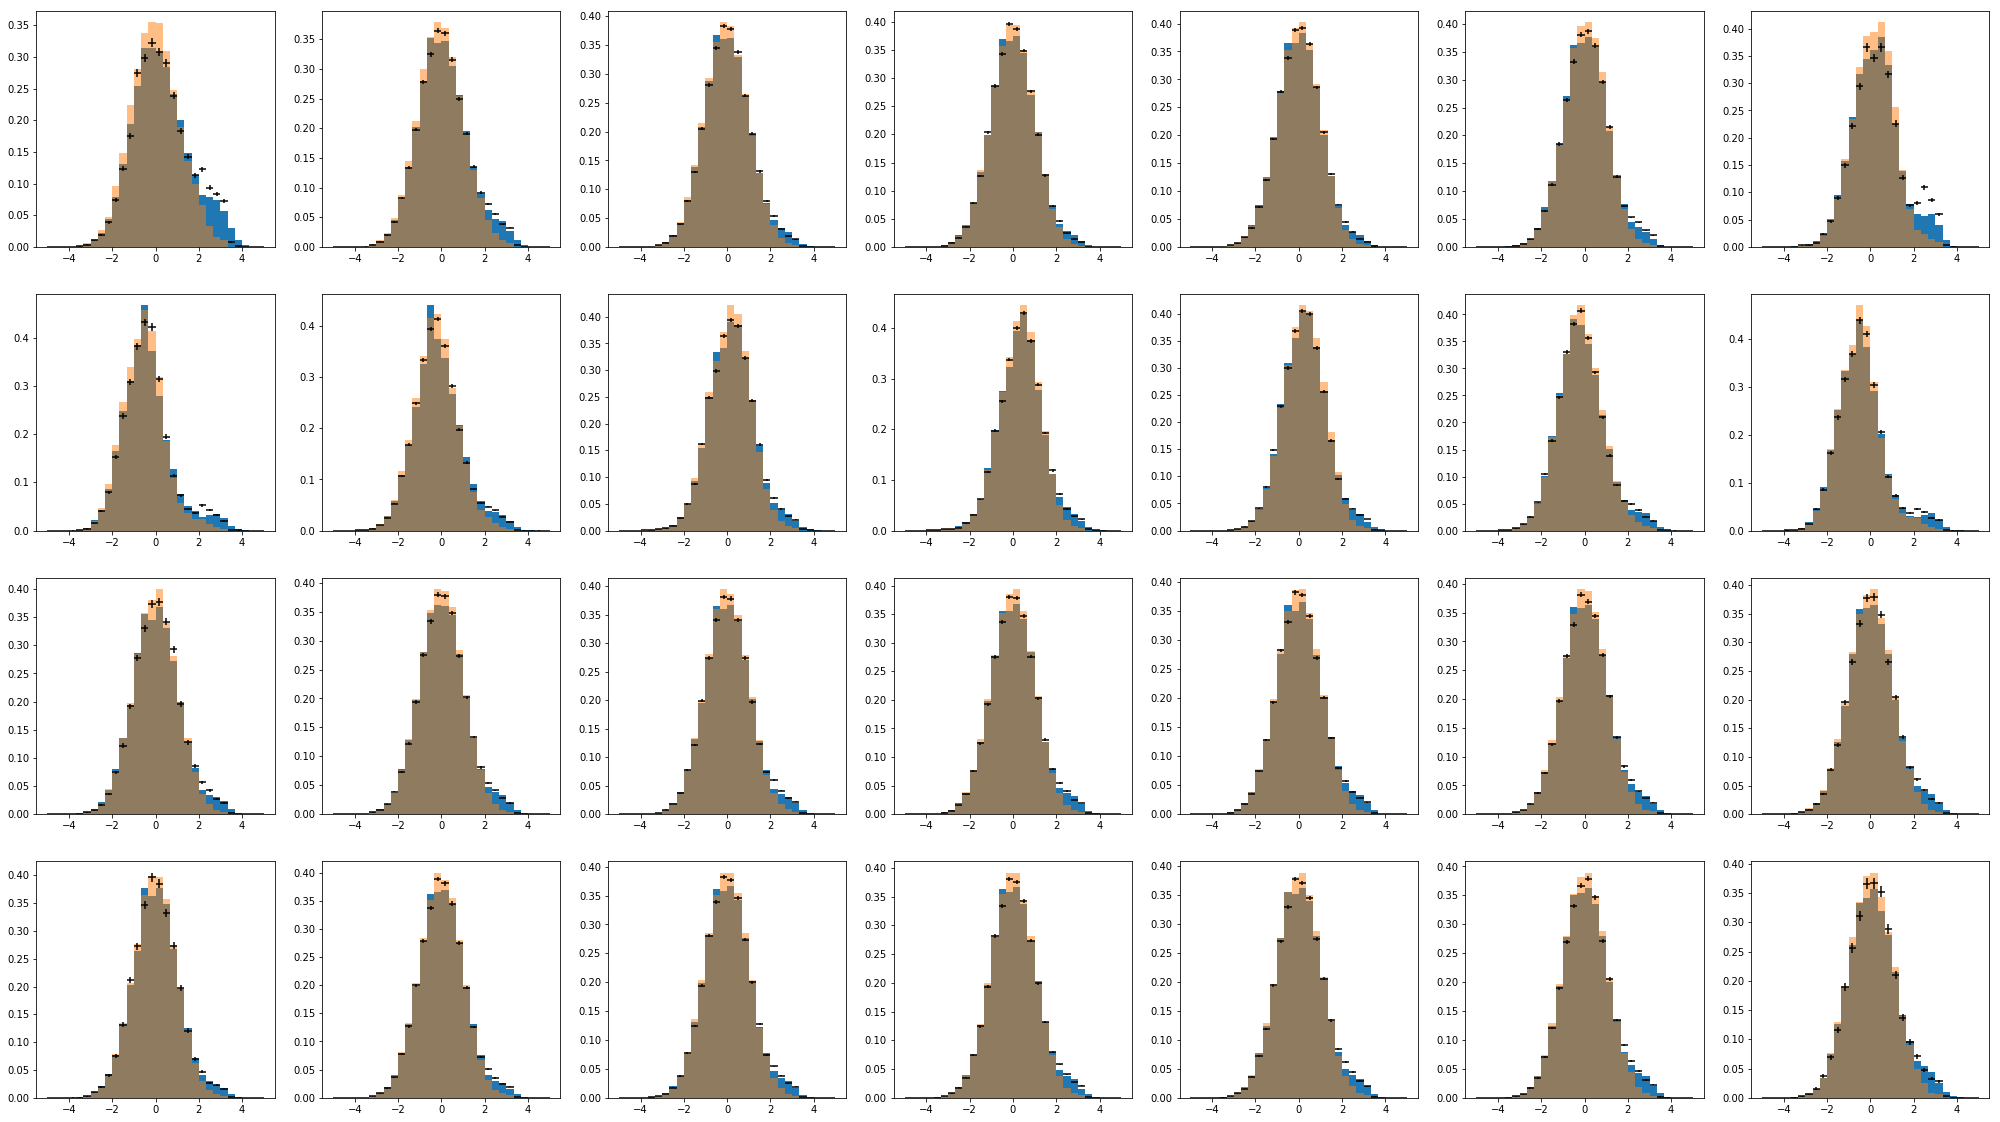

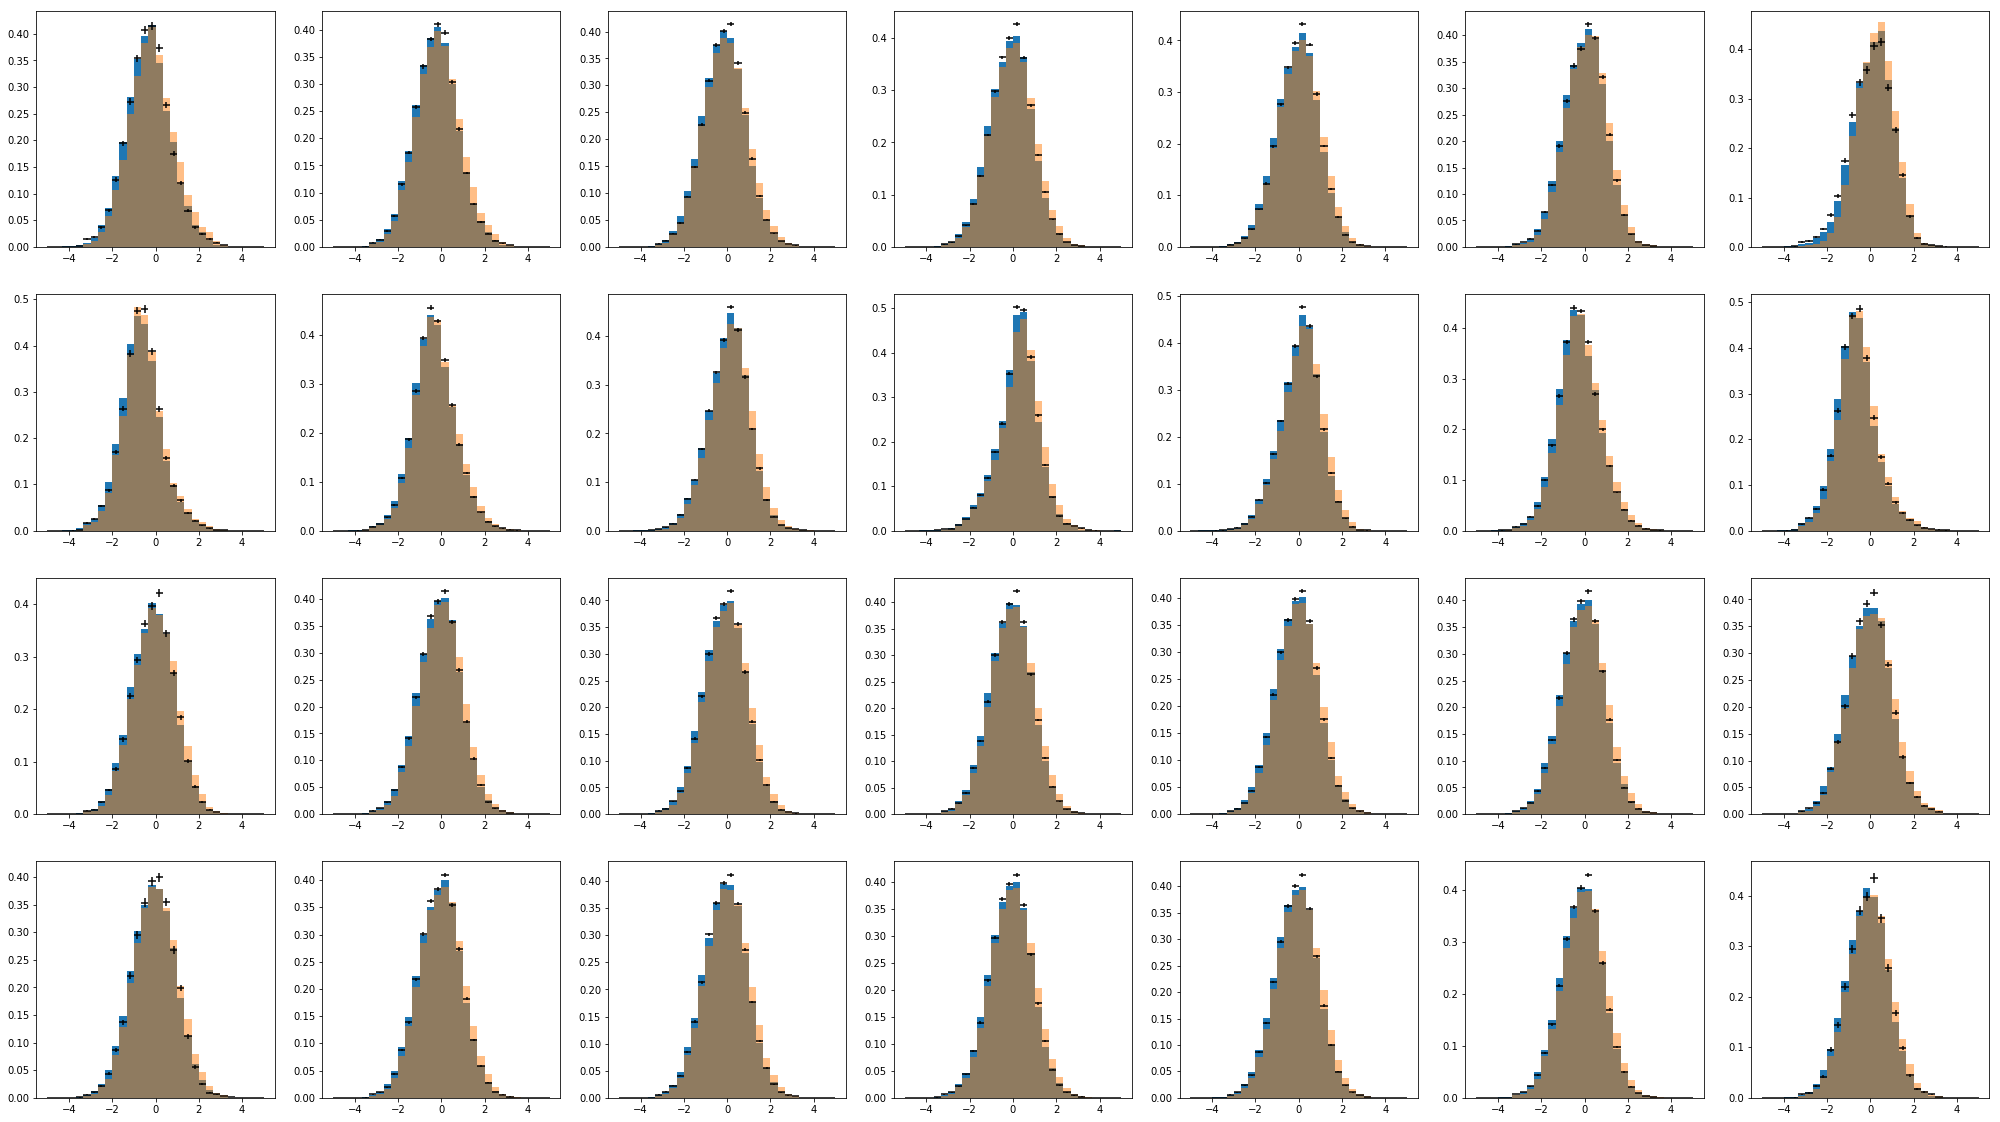

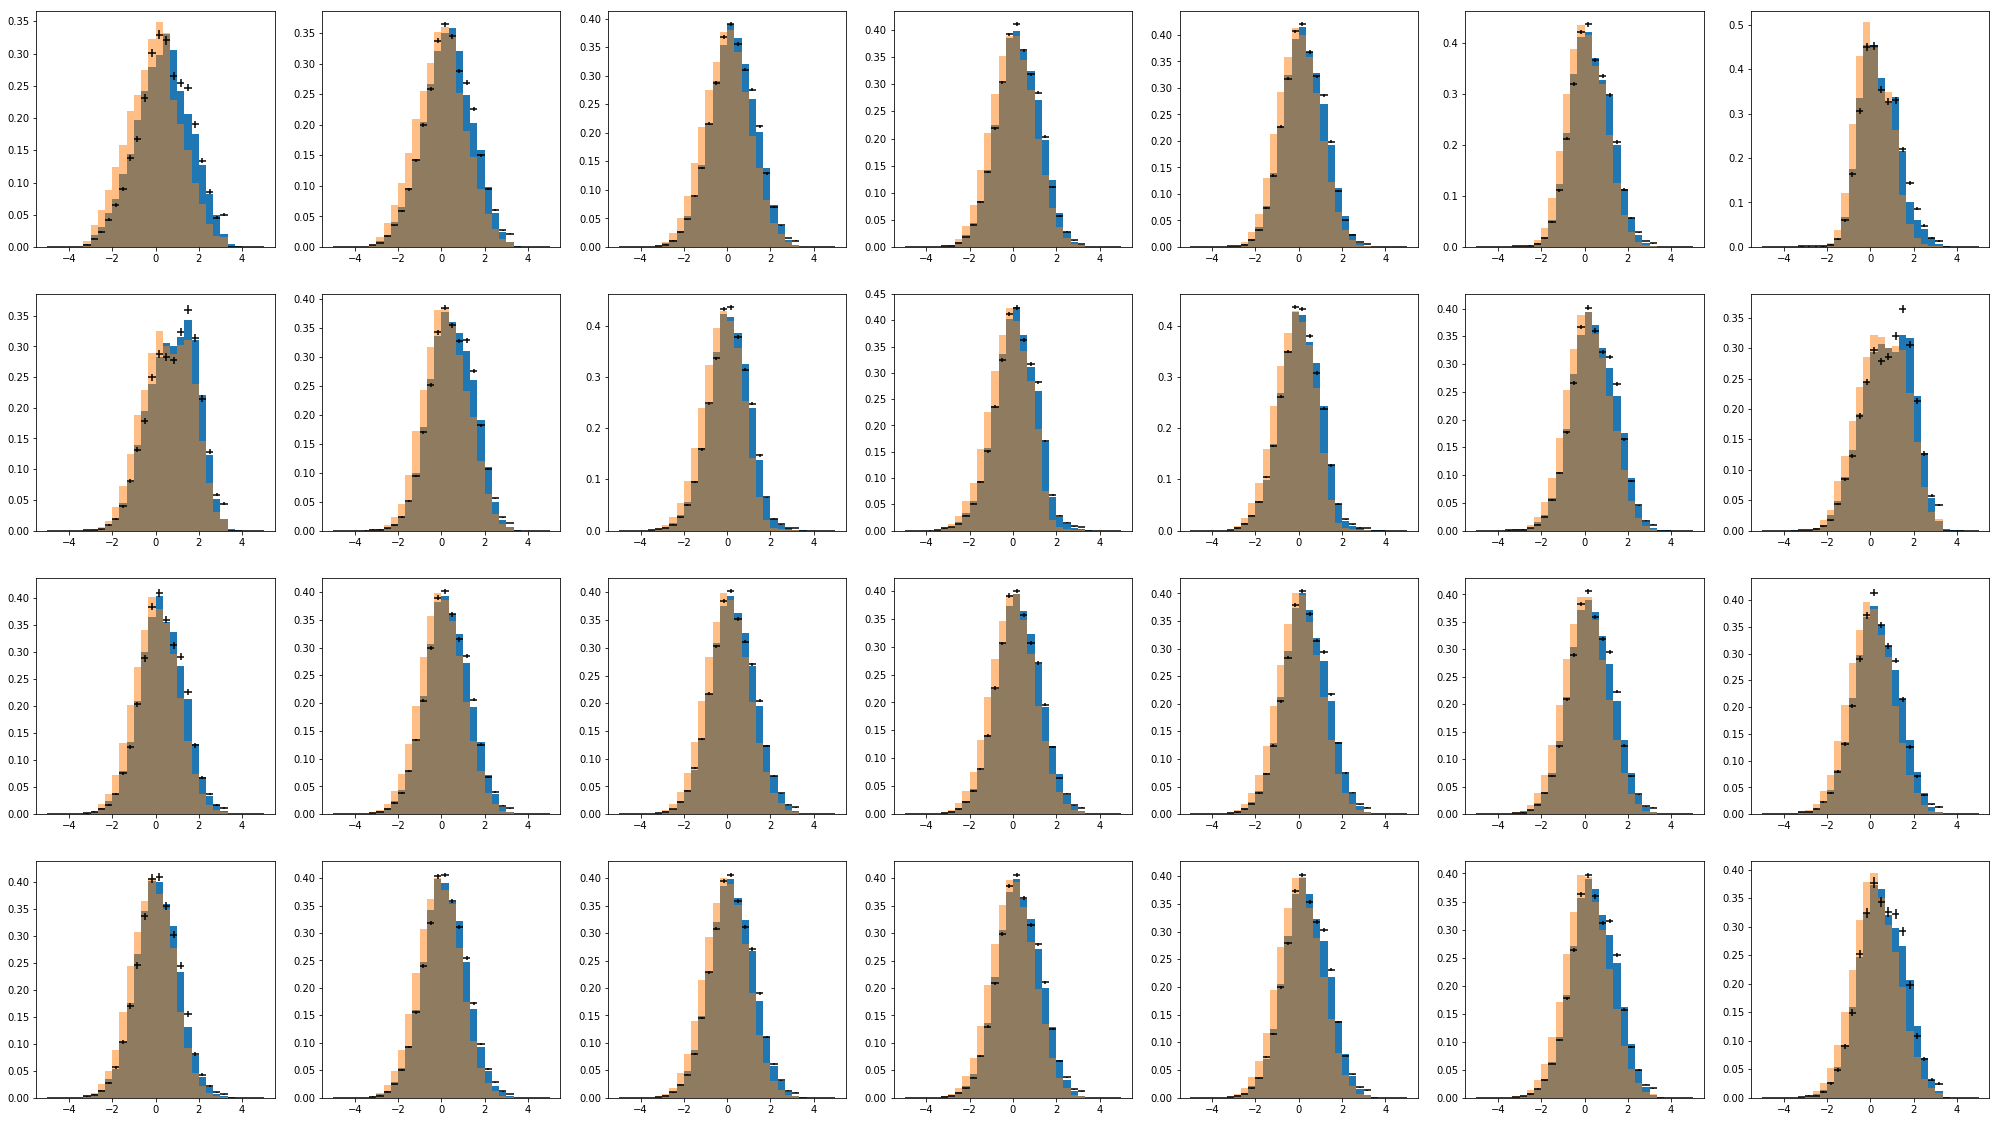

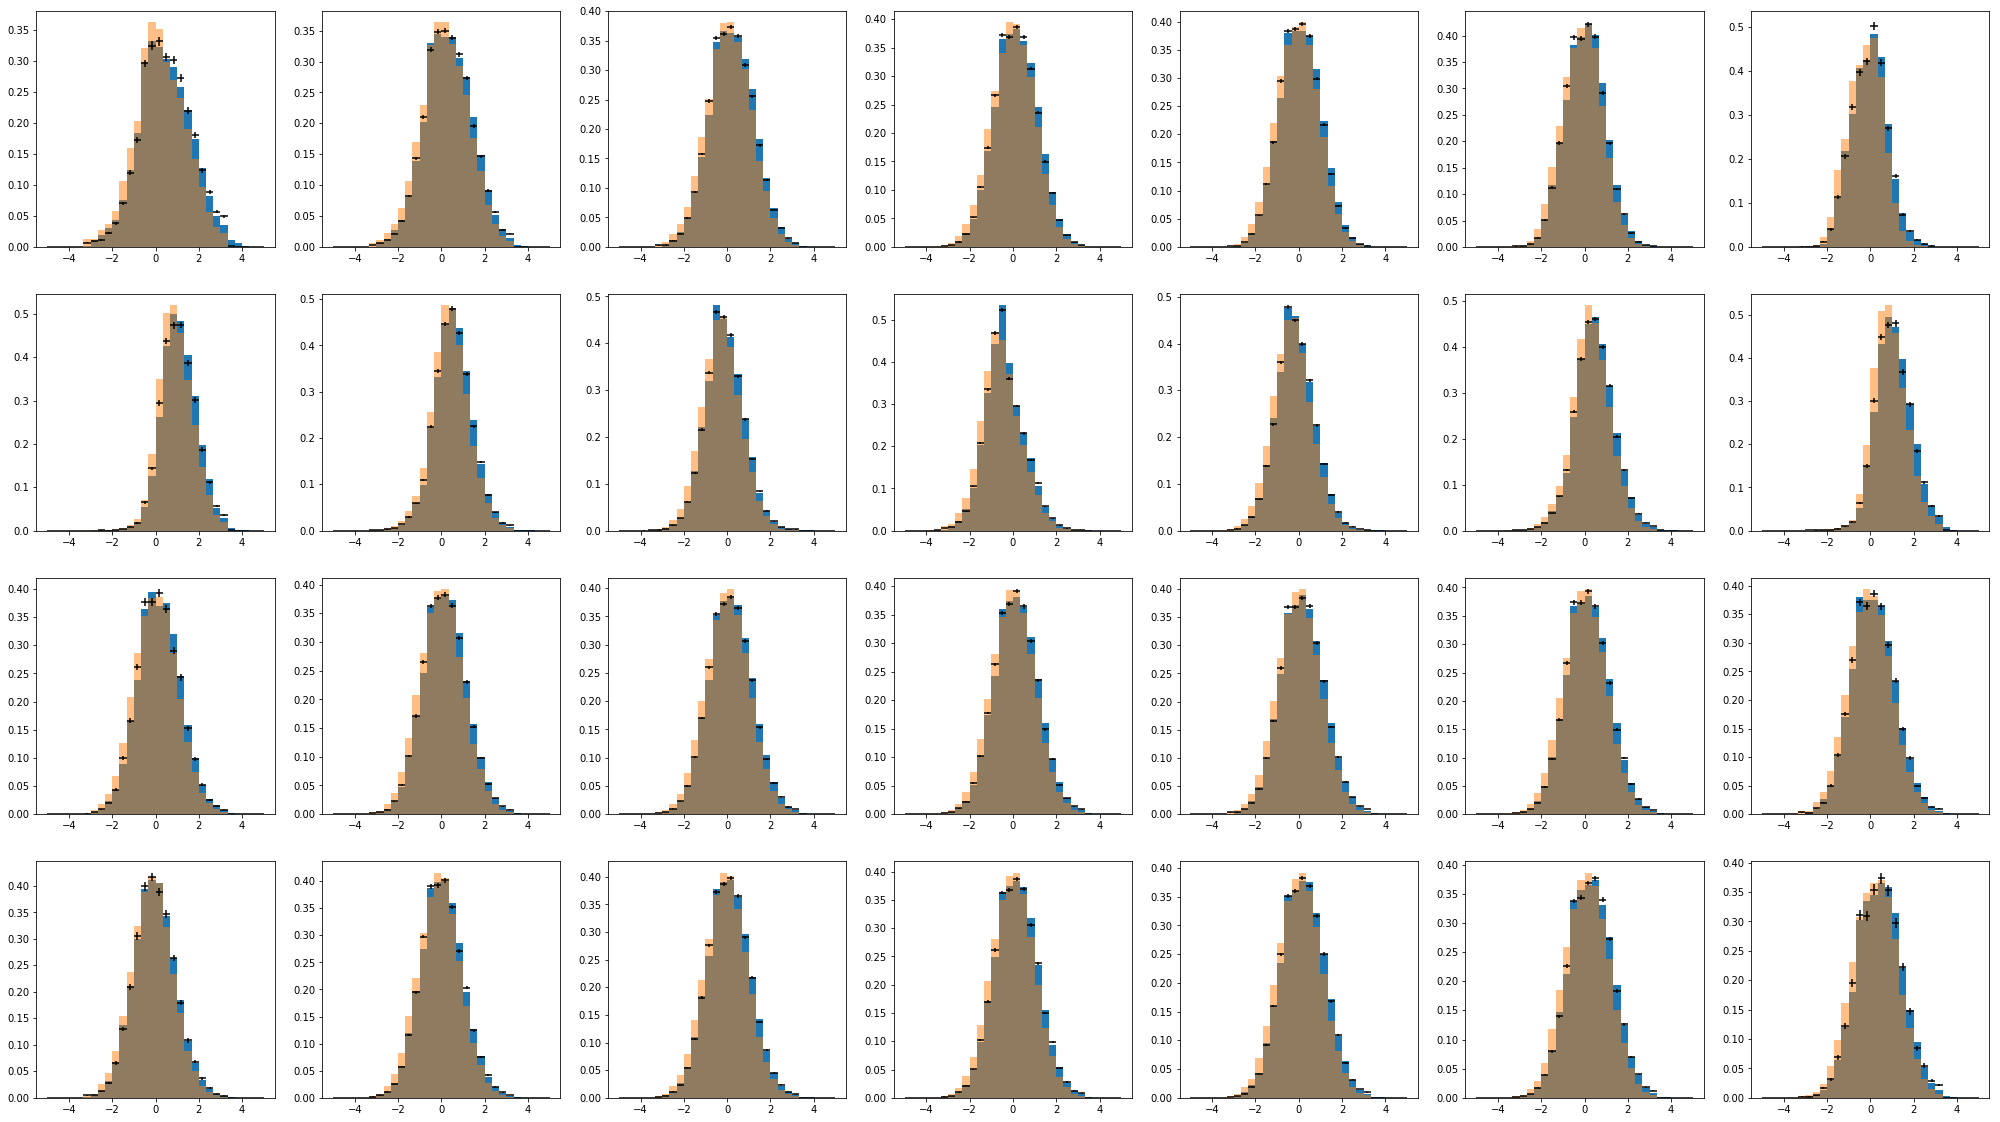

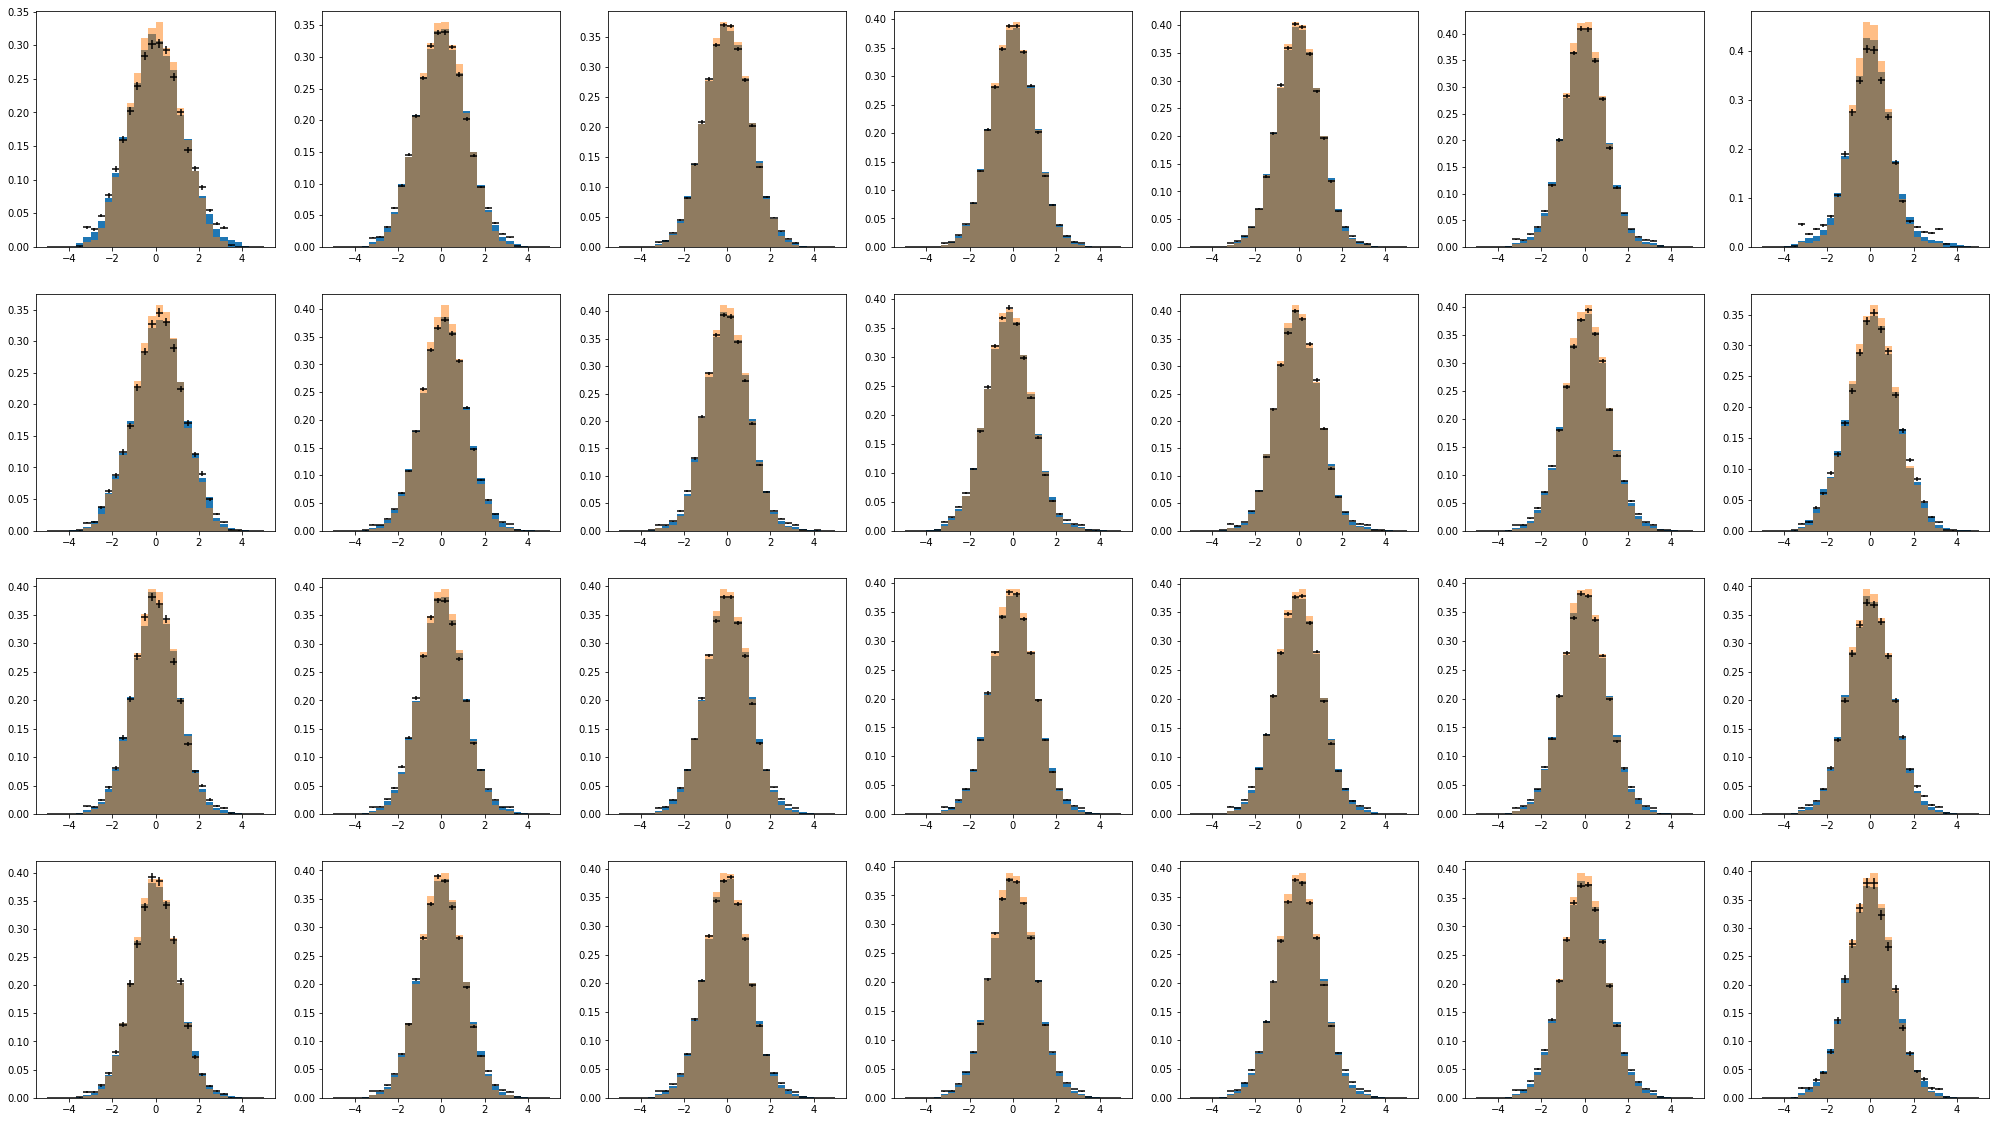

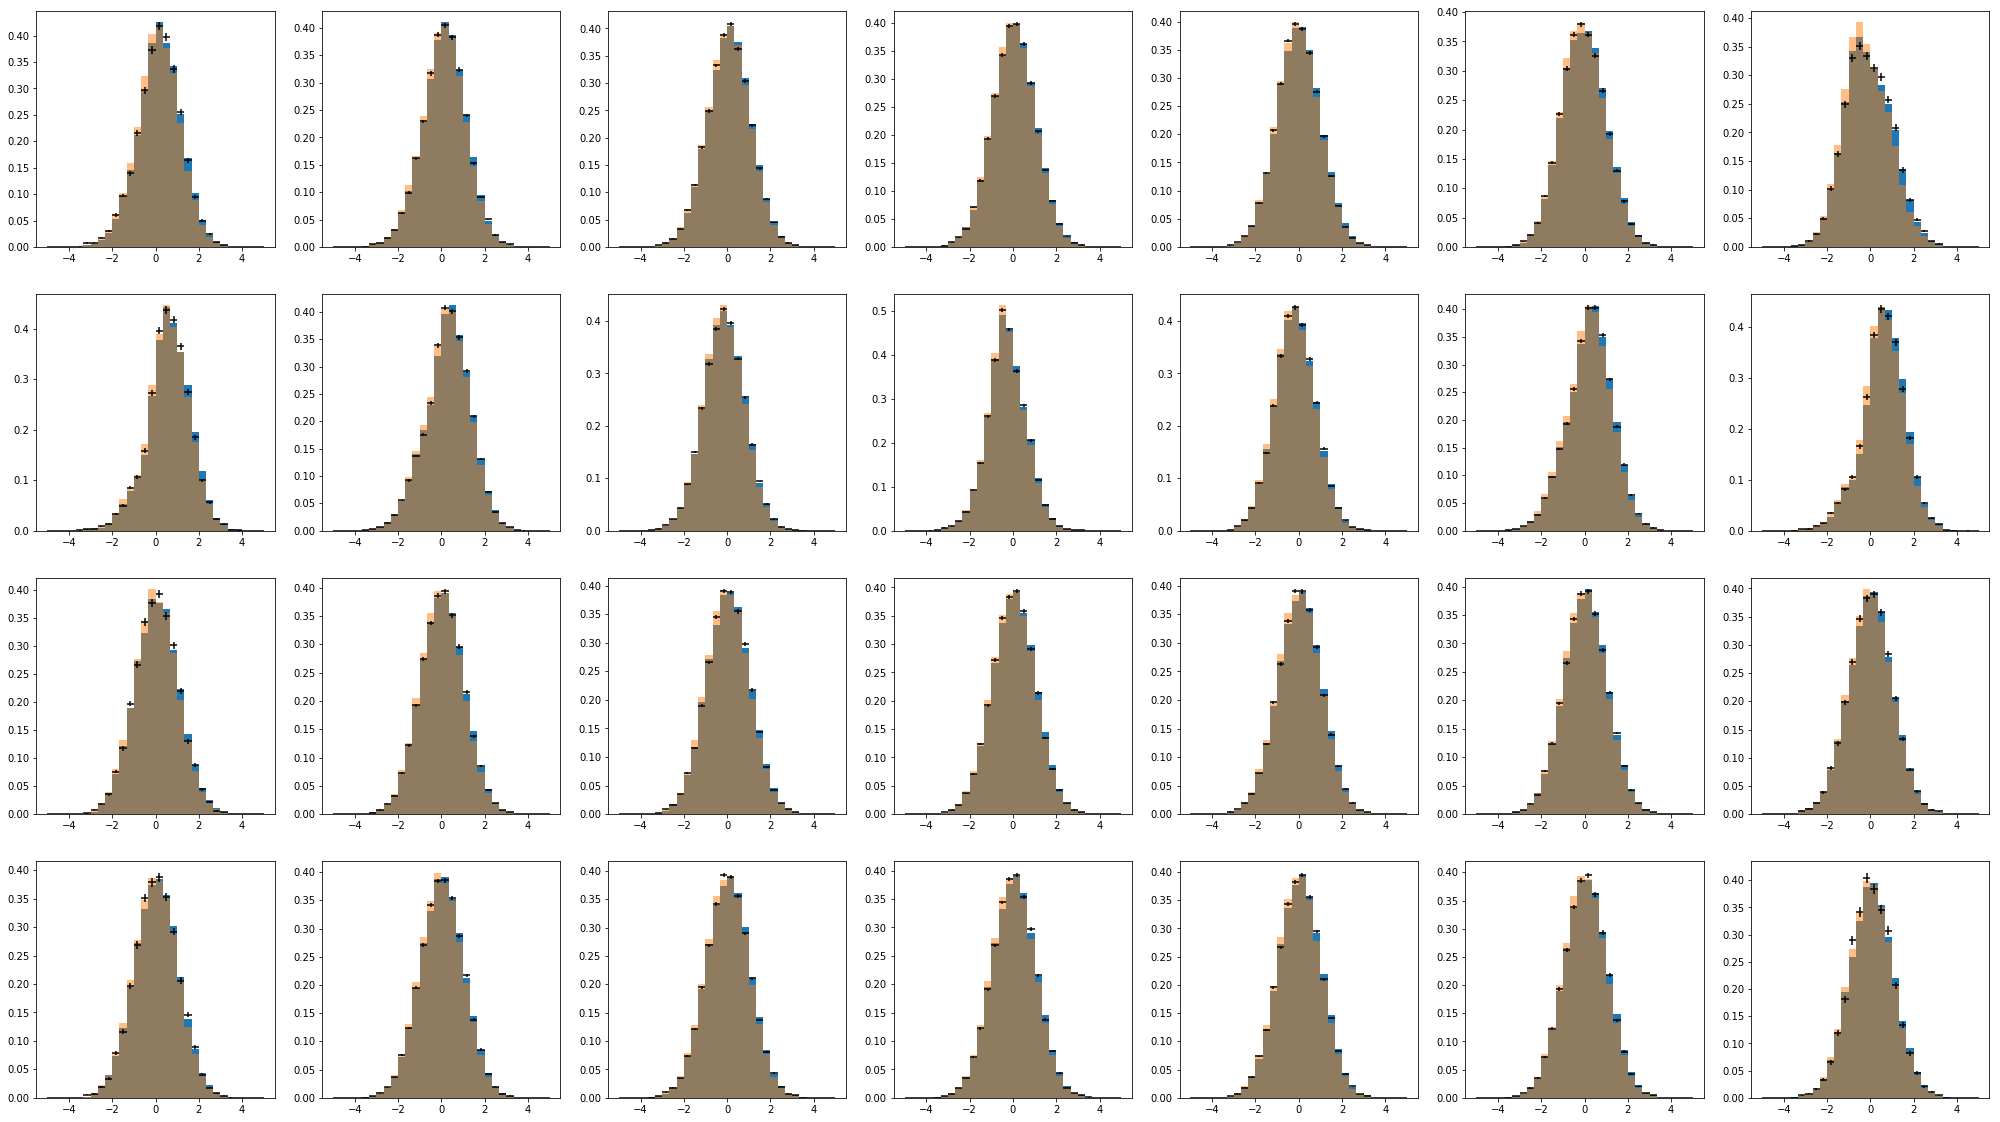

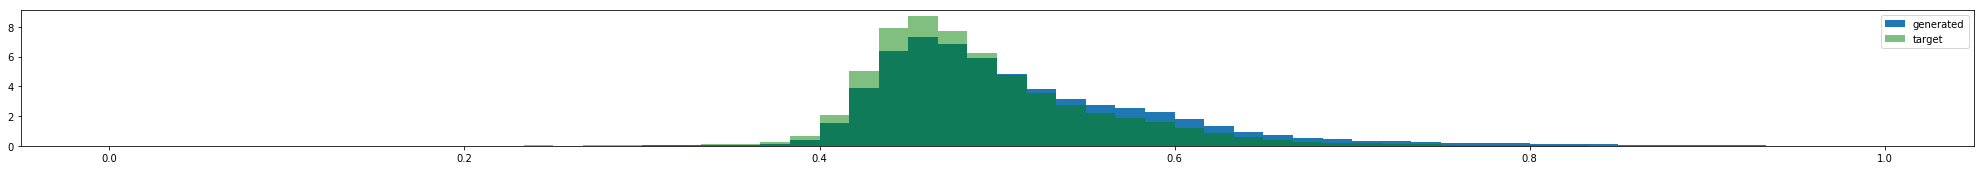

In [29]:
reload(plotting)

data_quantiles = np.percentile(data_c_test,[0,5,20,40,60,80,95,100])

plotting.plot_summary_cond(data_x_test,data_c_test,mc_x_test,mc_c_test,mc_x_test,data_p,mc_p)
plotting.plot_summary_cond(data_x_test,data_c_test,mc_x_morphed,mc_c_test,mc_x_test,data_p,mc_p)
plotting.plot_summary_cond(data_x_test,data_c_test,mc_x_morphed,mc_c_test,mc_x_test,data_p,mc_p,
                           do_slices=True,c_bounds=data_quantiles)


In [30]:
print(data_c_test.shape,data_x_test.shape)

(438006, 1, 4) (438006, 1, 7)
